##### Dataset Description : 
    
* status : status of the debtor's checking account with the bank (categorical)

* duration : credit duration in months (quantitative)

* credit_history : history of compliance with previous or concurrent credit contracts (categorical)

* purpose : purpose for which the credit is needed (categorical)

* amount : credit amount in DM (quantitative; result of monotonic transformation; actual data and type of transformation unknown)

* savings : debtor's savings (categorical)

* employment_duration : duration of debtor's employment with current employer (ordinal; discretized quantitative)

* installment_rate : credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)

* personal_status_sex : combined information on sex and marital status; categorical; sex cannot be recovered from the variable, because male singles and female non-singles are coded with the same code (2); female widows cannotbe easily classified, because the code table does not list them in any of the female categories.
    
* other_debtors : Is there another debtor or a guarantor for the credit? (categorical)

* present_residence : length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)

* property : the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3 or 4 are not applicable and there is a car or any other relevant property that does not fall under variable savings. (ordinal)

* age :age in years (quantitative)

* other_installment_plans :installment plans from providers other than the credit-giving bank (categorical)

* housing :type of housing the debtor lives in (categorical)

* number_credits :number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.

* job :quality of debtor's job (ordinal)

* people_liable :number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary, discretized quantitative)

* telephone :Is there a telephone landline registered on the debtor's name? (binary; remember that the data are from the 1970s)

* foreign_worker :Is the debtor a foreign worker? (binary)

* credit_risk :Has the credit contract been complied with (good) or not (bad) ? (binary)

In [1]:
from logs import log 
     

In [2]:
# set a logger file
logger = log(path="Log_File/", file="EDA.logs")


logger.info("Jupter Notebook Successfully Launched..!!")

INFO Jupter Notebook Successfully Launched..!!


In [3]:
# importing libraries for EDA
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [4]:
logger.info("EDA Libraries are imported..!!")

INFO EDA Libraries are imported..!!


In [6]:
# Importing libraries for statistical analysis 
from statistics import mean
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import randint


# Importing libraries for model training and evaluation 

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# for utilies 

from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# train test split and cross-validation
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score

# preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler,RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

# for balancing an imbalance data 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# model validation
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
    
# model fine tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Database Connection and Building class for fetching data 

from cassandra.cluster import Cluster 
from cassandra.auth import PlainTextAuthProvider 
import csv 



import warnings
warnings.filterwarnings("ignore")

In [7]:
logger.info("Model Training Libraries are Imported..!!")

INFO Model Training Libraries are Imported..!!


##### Connecting to database 

In [8]:
keyspace = 'south_german'

table_train = 'train'
table_test = 'test'

client_id = "fyTPyZjTQPzqLwOtoASmTyQb"
client_secret = "U7HchwlYvZNGEmZrap+W_ZrklZ7NY5XdFzotQo9K+TTXOSCEb8D5KGZNJZqLw1mMYoJOqUk2v1hQ_bNkg5zKQQDDDwS3JnUK3HnKg4E37XzSGhFc,Yzub8-+rdw5Ds.d"
secure_bundle = "C:/Users/admin/Desktop/Bank_Credit_Risk/secure-connect-south-german-bank (1).zip"

In [9]:
try:

    cloud_config= {
'secure_connect_bundle': secure_bundle
    }
    auth_provider = PlainTextAuthProvider(client_id, client_secret)
    cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
    session = cluster.connect()


    row = session.execute("select release_version from system.local").one()
    if row:
        print(row[0])
    else:
        print("An error occurred.")


except Exception as e:
    raise e 

WARNING Downgrading core protocol version from 66 to 65 for 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:8ea91611-c9ec-4a7b-8574-ce4856e9239d. To avoid this, it is best practice to explicitly set Cluster(protocol_version) to the version supported by your cluster. http://datastax.github.io/python-driver/api/cassandra/cluster.html#cassandra.cluster.Cluster.protocol_version
WARNING Downgrading core protocol version from 65 to 5 for 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:8ea91611-c9ec-4a7b-8574-ce4856e9239d. To avoid this, it is best practice to explicitly set Cluster(protocol_version) to the version supported by your cluster. http://datastax.github.io/python-driver/api/cassandra/cluster.html#cassandra.cluster.Cluster.protocol_version
ERROR Closing connection <AsyncoreConnection(1544761560464) 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:8ea91611-c9ec-4a7b-8574-ce4856e9239d> due to protoco

4.0.0.6816


In [10]:
logger.info('Database Connected...!!')

INFO Database Connected...!!


In [11]:
session.execute("USE {keyspace};".format(keyspace=keyspace))

In [12]:
logger.info("Extracting Data From Database....")

INFO Extracting Data From Database....


In [13]:
def data_to_pandas(colnames, rows):
  return pd.DataFrame(rows, columns=colnames)

session.row_factory = data_to_pandas
session.default_fetch_size = None

result = session.execute("SELECT * FROM {table_train};".format(table_train=table_train), timeout=None)

df_train=result._current_rows.sort_values('Id')
df_train.head()

Id  laufkont  verw  moral  gastarb  alter  beruf  beszeit  bishkred  \
239   0         1     2      4        2     21      3        2         1   
206   1         1     0      4        2     36      3        3         2   
253   2         2     9      2        2     23      2        4         1   
790   3         1     0      4        1     39      2        3         2   
70    5         1     0      4        1     48      2        2         2   

     buerge  ...  kredit  laufzeit  pers  rate  sparkont  telef  verm  \
239       1  ...       1        18     2     4         1      1     2   
206       1  ...       1         9     1     2         1      1     1   
253       1  ...       1        12     2     2         2      1     1   
790       1  ...       1        12     1     3         1      1     1   
70        1  ...       1        10     1     1         1      1     1   

     weitkred  wohn  wohnzeit  
239         3     1         4  
206         3     1         2  
253         3     1         4  
790         3     1         2  
70          3     1         3  

[5 rows x 22 columns]

In [14]:
logger.info('Train data extraction completed...!!')

INFO Train data extraction completed...!!


In [15]:
result = session.execute("SELECT * FROM {table_test};".format(table_test=table_test), timeout=None)

df_test=result._current_rows.sort_values('Id')
df_test.head()

Id  laufkont  verw  moral  gastarb  alter  beruf  beszeit  bishkred  \
61    4         1     0      4        1     38      2        3         2   
146  14         1     3      2        2     23      2        4         2   
62   18         2     3      4        2     36      3        5         1   
104  20         1     0      4        2     37      3        3         3   
78   22         2     5      2        2     33      2        2         1   

     buerge  ...  hoehe  laufzeit  pers  rate  sparkont  telef  verm  \
61        1  ...   2171        12     2     4         1      1     2   
146       1  ...   1936        18     2     2         5      1     3   
62        1  ...   2337        36     2     4         1      1     1   
104       1  ...   3676         6     1     1         1      1     1   
78        1  ...   2384        36     2     4         1      1     4   

     weitkred  wohn  wohnzeit  
61          1     2         4  
146         3     1         4  
62          3     2         4  
104         3     1         3  
78          3     1         1  

[5 rows x 21 columns]

In [16]:
logger.info('Test data extraction completed...!!')

INFO Test data extraction completed...!!


In [17]:
df_train.columns

Index(['Id', 'laufkont', 'verw', 'moral', 'gastarb', 'alter', 'beruf',
       'beszeit', 'bishkred', 'buerge', 'famges', 'hoehe', 'kredit',
       'laufzeit', 'pers', 'rate', 'sparkont', 'telef', 'verm', 'weitkred',
       'wohn', 'wohnzeit'],
      dtype='object')

In [18]:
print(len(df_train.columns))

22


In [19]:
df_test.columns

Index(['Id', 'laufkont', 'verw', 'moral', 'gastarb', 'alter', 'beruf',
       'beszeit', 'bishkred', 'buerge', 'famges', 'hoehe', 'laufzeit', 'pers',
       'rate', 'sparkont', 'telef', 'verm', 'weitkred', 'wohn', 'wohnzeit'],
      dtype='object')

In [20]:
print(len(df_test.columns))

21


In [21]:
logger.info("EDA starts....")

INFO EDA starts....


In [22]:
# renaming train_df columns 
df_train = df_train.rename(mapper={'Id': 'id', 'laufkont': 'status', 'laufzeit': 'duration', 'moral': 'credit_history', 'verw': 'purpose',
                                'hoehe': 'amount', 'sparkont': 'savings', 'beszeit': 'employment_duration', 'rate': 'installment_rate', 
                                   'famges': 'personal_status_sex', 'buerge': 'other_debtors',
                                   'wohnzeit': 'present_residence', 'verm': 'property', 'alter': 'age', 
                                   'weitkred': 'other_installment_plans', 'wohn': 'housing', 'bishkred': 'number_credits', 
                                   'beruf': 'job', 'pers':  'people_liable', 'telef': 'telephone',
                                   'gastarb': 'foreign_worker', 'kredit': 'credit_risk'},  axis='columns') # axis = 1 , belongs to columns 

In [23]:
df_train.head()

id  status  purpose  credit_history  foreign_worker  age  job  \
239   0       1        2               4               2   21    3   
206   1       1        0               4               2   36    3   
253   2       2        9               2               2   23    2   
790   3       1        0               4               1   39    2   
70    5       1        0               4               1   48    2   

     employment_duration  number_credits  other_debtors  ...  credit_risk  \
239                    2               1              1  ...            1   
206                    3               2              1  ...            1   
253                    4               1              1  ...            1   
790                    3               2              1  ...            1   
70                     2               2              1  ...            1   

     duration  people_liable  installment_rate  savings  telephone  property  \
239        18              2                 4        1          1         2   
206         9              1                 2        1          1         1   
253        12              2                 2        2          1         1   
790        12              1                 3        1          1         1   
70         10              1                 1        1          1         1   

     other_installment_plans  housing  present_residence  
239                        3        1                  4  
206                        3        1                  2  
253                        3        1                  4  
790                        3        1                  2  
70                         3        1                  3  

[5 rows x 22 columns]

In [25]:
# renaming test_df columns 
df_test = df_test.rename(mapper={'Id': 'id', 'laufkont': 'status', 'laufzeit': 'duration', 'moral': 'credit_history', 'verw': 'purpose',
                                'hoehe': 'amount', 'sparkont': 'savings', 'beszeit': 'employment_duration', 'rate': 'installment_rate', 
                                   'famges': 'personal_status_sex', 'buerge': 'other_debtors',
                                   'wohnzeit': 'present_residence', 'verm': 'property', 'alter': 'age', 
                                   'weitkred': 'other_installment_plans', 'wohn': 'housing', 'bishkred': 'number_credits', 
                                   'beruf': 'job', 'pers':  'people_liable', 'telef': 'telephone',
                                   'gastarb': 'foreign_worker', 'kredit': 'credit_risk'},  axis='columns') # axis = 1 , belongs to columns

In [26]:
df_test.head()

id  status  purpose  credit_history  foreign_worker  age  job  \
61    4       1        0               4               1   38    2   
146  14       1        3               2               2   23    2   
62   18       2        3               4               2   36    3   
104  20       1        0               4               2   37    3   
78   22       2        5               2               2   33    2   

     employment_duration  number_credits  other_debtors  ...  amount  \
61                     3               2              1  ...    2171   
146                    4               2              1  ...    1936   
62                     5               1              1  ...    2337   
104                    3               3              1  ...    3676   
78                     2               1              1  ...    2384   

     duration  people_liable  installment_rate  savings  telephone  property  \
61         12              2                 4        1          1         2   
146        18              2                 2        5          1         3   
62         36              2                 4        1          1         1   
104         6              1                 1        1          1         1   
78         36              2                 4        1          1         4   

     other_installment_plans  housing  present_residence  
61                         1        2                  4  
146                        3        1                  4  
62                         3        2                  4  
104                        3        1                  3  
78                         3        1                  1  

[5 rows x 21 columns]

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 239 to 714
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   purpose                  800 non-null    int64
 3   credit_history           800 non-null    int64
 4   foreign_worker           800 non-null    int64
 5   age                      800 non-null    int64
 6   job                      800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   number_credits           800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  personal_status_sex      800 non-null    int64
 11  amount                   800 non-null    int64
 12  credit_risk              800 non-null    int64
 13  duration                 800 non-null    int64
 14  people_liable            800 non-null    int64
 15  installme

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 61 to 136
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       200 non-null    int64
 1   status                   200 non-null    int64
 2   purpose                  200 non-null    int64
 3   credit_history           200 non-null    int64
 4   foreign_worker           200 non-null    int64
 5   age                      200 non-null    int64
 6   job                      200 non-null    int64
 7   employment_duration      200 non-null    int64
 8   number_credits           200 non-null    int64
 9   other_debtors            200 non-null    int64
 10  personal_status_sex      200 non-null    int64
 11  amount                   200 non-null    int64
 12  duration                 200 non-null    int64
 13  people_liable            200 non-null    int64
 14  installment_rate         200 non-null    int64
 15  savings   

In [29]:
df_train.describe().transpose()

count        mean          std    min      25%  \
id                       800.0   478.10125   278.883661    0.0   238.75   
status                   800.0     2.64875     1.250931    1.0     1.75   
purpose                  800.0     2.78500     2.680533    0.0     1.00   
credit_history           800.0     2.58250     1.099866    0.0     2.00   
foreign_worker           800.0     1.95750     0.201853    1.0     2.00   
age                      800.0    35.54250    11.175724   19.0    27.00   
job                      800.0     2.90125     0.661094    1.0     3.00   
employment_duration      800.0     3.39500     1.224070    1.0     3.00   
number_credits           800.0     1.42000     0.586541    1.0     1.00   
other_debtors            800.0     1.14375     0.472615    1.0     1.00   
personal_status_sex      800.0     2.68750     0.696743    1.0     2.00   
amount                   800.0  3210.29000  2792.840814  250.0  1364.00   
credit_risk              800.0     0.75000     0.433284    0.0     0.75   
duration                 800.0    20.49625    12.006881    4.0    12.00   
people_liable            800.0     1.84500     0.362131    1.0     2.00   
installment_rate         800.0     2.95250     1.134395    1.0     2.00   
savings                  800.0     2.14375     1.589416    1.0     1.00   
telephone                800.0     1.39875     0.489947    1.0     1.00   
property                 800.0     2.35375     1.057122    1.0     1.00   
other_installment_plans  800.0     2.67375     0.709182    1.0     3.00   
housing                  800.0     1.94125     0.527396    1.0     2.00   
present_residence        800.0     2.82500     1.100404    1.0     2.00   

                            50%      75%      max  
id                        472.0   707.25    999.0  
status                      2.0     4.00      4.0  
purpose                     2.0     3.00     10.0  
credit_history              2.0     4.00      4.0  
foreign_worker              2.0     2.00      2.0  
age                        33.0    42.00     75.0  
job                         3.0     3.00      4.0  
employment_duration         3.0     5.00      5.0  
number_credits              1.0     2.00      4.0  
other_debtors               1.0     1.00      3.0  
personal_status_sex         3.0     3.00      4.0  
amount                   2264.0  3907.25  18424.0  
credit_risk                 1.0     1.00      1.0  
duration                   18.0    24.00     72.0  
people_liable               2.0     2.00      2.0  
installment_rate            3.0     4.00      4.0  
savings                     1.0     3.00      5.0  
telephone                   1.0     2.00      2.0  
property                    2.0     3.00      4.0  
other_installment_plans     3.0     3.00      3.0  
housing                     2.0     2.00      3.0  
present_residence           3.0     4.00      4.0

In [30]:
df_test.describe().transpose()

count      mean          std    min     25%     50%  \
id                       200.0   585.095   311.895834    4.0   303.0   661.0   
status                   200.0     2.290     1.246462    1.0     1.0     2.0   
purpose                  200.0     3.000     2.987411    0.0     1.0     2.0   
credit_history           200.0     2.395     1.001995    0.0     2.0     2.0   
foreign_worker           200.0     1.985     0.121857    1.0     2.0     2.0   
age                      200.0    35.540    12.063834   20.0    26.0    33.0   
job                      200.0     2.915     0.624278    1.0     3.0     3.0   
employment_duration      200.0     3.340     1.144969    1.0     3.0     3.0   
number_credits           200.0     1.355     0.538913    1.0     1.0     1.0   
other_debtors            200.0     1.150     0.498742    1.0     1.0     1.0   
personal_status_sex      200.0     2.660     0.753151    1.0     2.0     3.0   
amount                   200.0  3515.080  2933.884667  338.0  1373.5  2443.0   
duration                 200.0    22.530    12.158877    6.0    12.0    19.0   
people_liable            200.0     1.845     0.362813    1.0     2.0     2.0   
installment_rate         200.0     3.055     1.052384    1.0     2.0     3.0   
savings                  200.0     1.950     1.536000    1.0     1.0     1.0   
telephone                200.0     1.425     0.495584    1.0     1.0     1.0   
property                 200.0     2.375     1.024511    1.0     1.0     2.0   
other_installment_plans  200.0     2.680     0.692820    1.0     3.0     3.0   
housing                  200.0     1.875     0.539286    1.0     2.0     2.0   
present_residence        200.0     2.925     1.116066    1.0     2.0     3.0   

                             75%      max  
id                        857.50    996.0  
status                      4.00      4.0  
purpose                     3.00     10.0  
credit_history              3.00      4.0  
foreign_worker              2.00      2.0  
age                        41.25     75.0  
job                         3.00      4.0  
employment_duration         4.00      5.0  
number_credits              2.00      4.0  
other_debtors               1.00      3.0  
personal_status_sex         3.00      4.0  
amount                   4572.50  14896.0  
duration                   30.00     60.0  
people_liable               2.00      2.0  
installment_rate            4.00      4.0  
savings                     2.25      5.0  
telephone                   2.00      2.0  
property                    3.00      4.0  
other_installment_plans     3.00      3.0  
housing                     2.00      3.0  
present_residence           4.00      4.0

In [31]:
# Check for duplicates
df_train.duplicated().value_counts()

False    800
Name: count, dtype: int64

In [32]:

df_test.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [33]:
# Confirm for missing values
df_train.isnull().sum()

id                         0
status                     0
purpose                    0
credit_history             0
foreign_worker             0
age                        0
job                        0
employment_duration        0
number_credits             0
other_debtors              0
personal_status_sex        0
amount                     0
credit_risk                0
duration                   0
people_liable              0
installment_rate           0
savings                    0
telephone                  0
property                   0
other_installment_plans    0
housing                    0
present_residence          0
dtype: int64

In [34]:

df_test.isnull().sum()

id                         0
status                     0
purpose                    0
credit_history             0
foreign_worker             0
age                        0
job                        0
employment_duration        0
number_credits             0
other_debtors              0
personal_status_sex        0
amount                     0
duration                   0
people_liable              0
installment_rate           0
savings                    0
telephone                  0
property                   0
other_installment_plans    0
housing                    0
present_residence          0
dtype: int64

In [35]:
# Dropping 'id' column from both test and train dataset, no use for prediction or any statistical analysis

df_train = df_train.drop("id", axis = 1)
df_test = df_test.drop("id", axis = 1)

In [36]:
df_train.head()

status  purpose  credit_history  foreign_worker  age  job  \
239       1        2               4               2   21    3   
206       1        0               4               2   36    3   
253       2        9               2               2   23    2   
790       1        0               4               1   39    2   
70        1        0               4               1   48    2   

     employment_duration  number_credits  other_debtors  personal_status_sex  \
239                    2               1              1                    2   
206                    3               2              1                    3   
253                    4               1              1                    2   
790                    3               2              1                    3   
70                     2               2              1                    3   

     ...  credit_risk  duration  people_liable  installment_rate  savings  \
239  ...            1        18              2                 4        1   
206  ...            1         9              1                 2        1   
253  ...            1        12              2                 2        2   
790  ...            1        12              1                 3        1   
70   ...            1        10              1                 1        1   

     telephone  property  other_installment_plans  housing  present_residence  
239          1         2                        3        1                  4  
206          1         1                        3        1                  2  
253          1         1                        3        1                  4  
790          1         1                        3        1                  2  
70           1         1                        3        1                  3  

[5 rows x 21 columns]

In [37]:
df_test.head()

status  purpose  credit_history  foreign_worker  age  job  \
61        1        0               4               1   38    2   
146       1        3               2               2   23    2   
62        2        3               4               2   36    3   
104       1        0               4               2   37    3   
78        2        5               2               2   33    2   

     employment_duration  number_credits  other_debtors  personal_status_sex  \
61                     3               2              1                    3   
146                    4               2              1                    4   
62                     5               1              1                    3   
104                    3               3              1                    3   
78                     2               1              1                    3   

     amount  duration  people_liable  installment_rate  savings  telephone  \
61     2171        12              2                 4        1          1   
146    1936        18              2                 2        5          1   
62     2337        36              2                 4        1          1   
104    3676         6              1                 1        1          1   
78     2384        36              2                 4        1          1   

     property  other_installment_plans  housing  present_residence  
61          2                        1        2                  4  
146         3                        3        1                  4  
62          1                        3        2                  4  
104         1                        3        1                  3  
78          4                        3        1                  1

In [38]:
# Target Variable Distribution 

df_train['credit_risk'].value_counts()

credit_risk
1    600
0    200
Name: count, dtype: int64

###### Observation : 

            Imbalance Data 

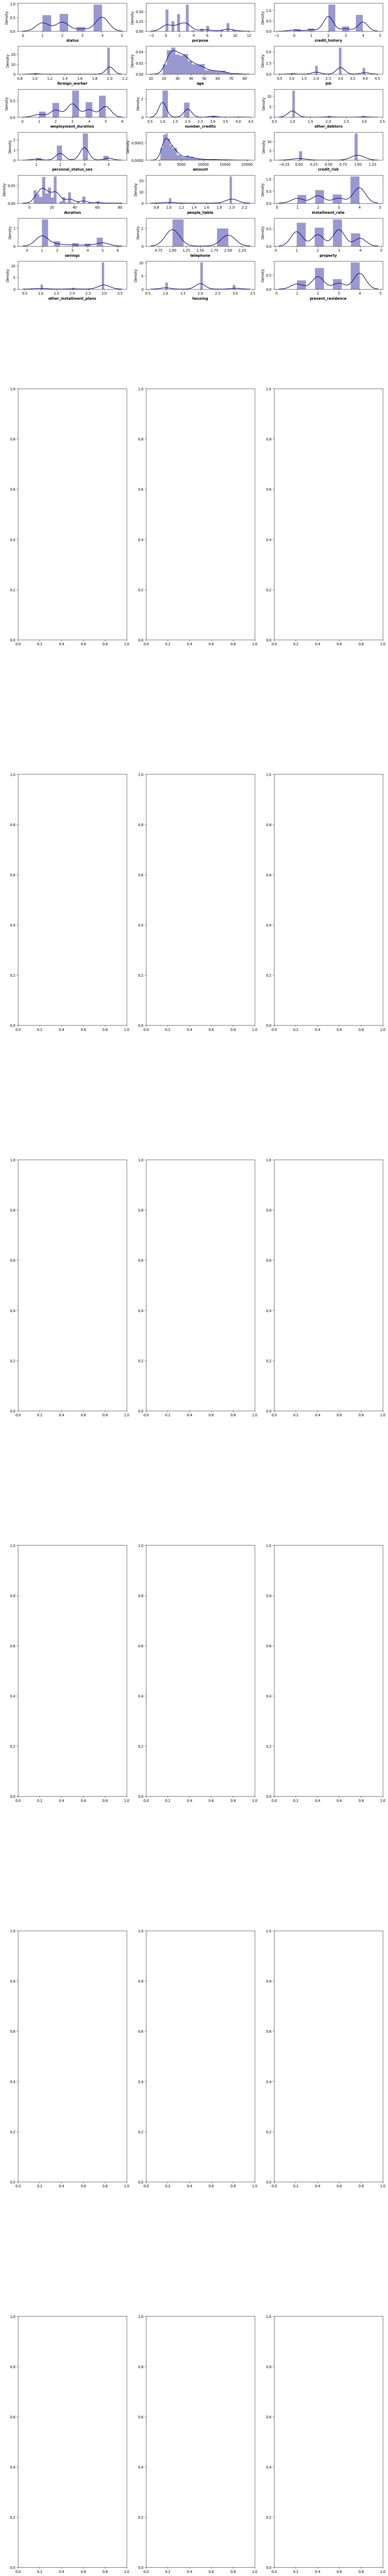

In [39]:
# Checking data distribution of all numerical columns of both train and test dataset  

"""
[Function for analyzing data distribution through graphs]
Arguments:
    df {Pandas DataFrame}  -- train and test data 
    
Return:
    Will Return graphs for each feature of dataframe passed in function
    
"""
def data_distribution(df: pd.DataFrame):
    plt.figure(figsize=(15, 100))
    for i, col in enumerate(df.columns):
        plt.subplot(7, 3 , i+1)
        plt.subplot(60, 3, i+1)
        sns.distplot(x=df[col], color='darkblue')
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
        
data_distribution(df_train)

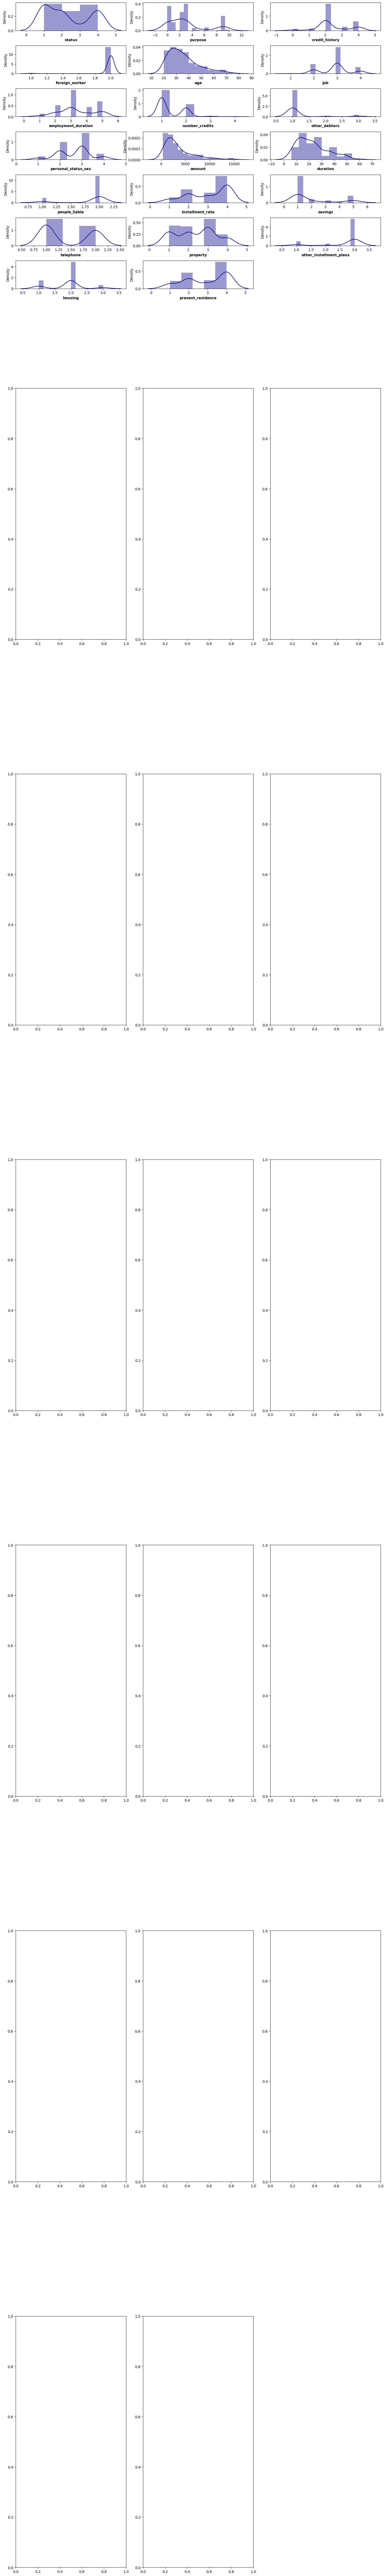

In [40]:
# Checking data distribution of all numerical columns of test dataset  

data_distribution(df_test)

###### Observation: 

         Duration, amount and age columns are right skewed and must perform log-transform on both test and train dataset.

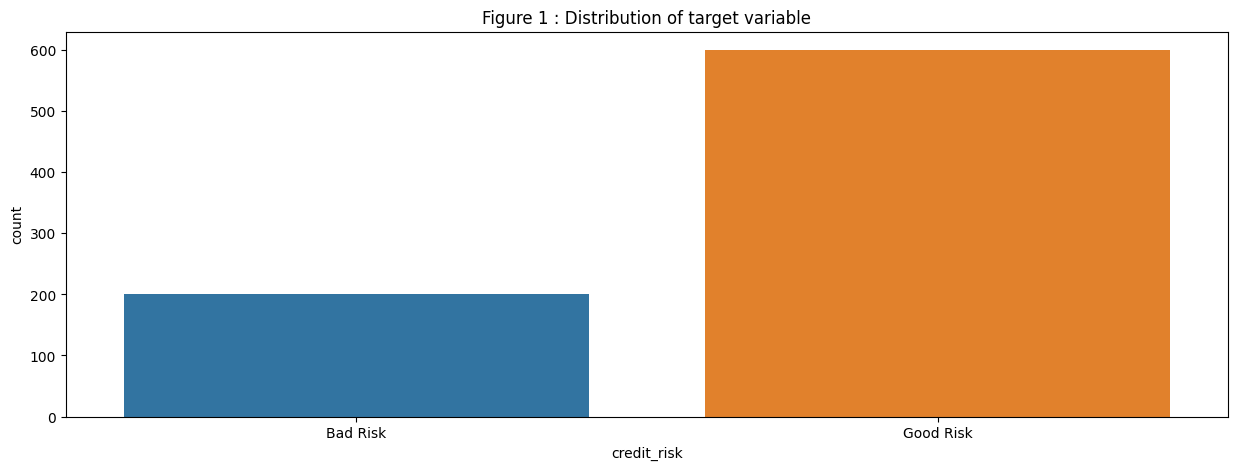

In [41]:
x_labels= ['Bad Risk', 'Good Risk']

fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='credit_risk', data = df_train)
ax.set_xticklabels(x_labels)
plt.title('Figure 1 : Distribution of target variable')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/1.jpeg')
plt.show()

In [44]:
# Analyzing Dataset

sns.countplot(df_train['foreign_worker'], hue=df_train['credit_risk'])

ValueError: Cannot use `hue` without `x` and `y`

In [45]:
sns.countplot(df_train['credit_risk'],hue=df_train['purpose'])

ValueError: Cannot use `hue` without `x` and `y`

Text(0.5, 1.0, 'Bad Loans Amount Histogram')

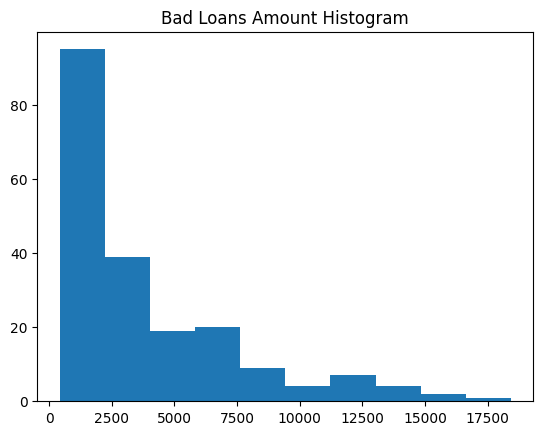

In [46]:
plt.hist(df_train[df_train['credit_risk']==0]['amount'])
plt.title('Bad Loans Amount Histogram')

* Bad loans are right skewed with maximum bad loans under 7500.

Text(0.5, 1.0, 'Bad Loans Amount Purpose Wise')

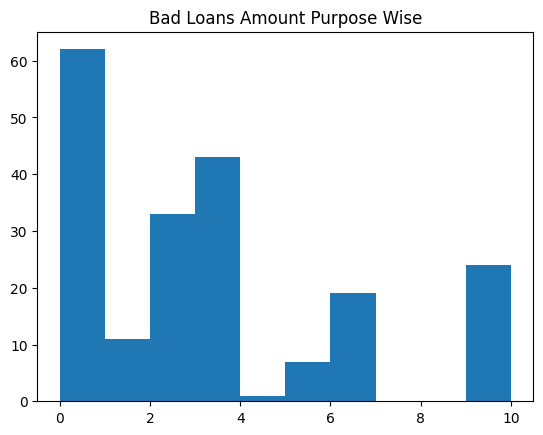

In [47]:
plt.hist(df_train[df_train['credit_risk']==0]['purpose'])
plt.title('Bad Loans Amount Purpose Wise')

Maximum bad loans is with others purpose. 

In [48]:

percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

df_train['duration'].describe(percentiles=percentiles)

count    800.000000
mean      20.496250
std       12.006881
min        4.000000
10%        8.000000
20%       12.000000
25%       12.000000
30%       12.000000
40%       15.000000
50%       18.000000
60%       22.800000
70%       24.000000
75%       24.000000
80%       30.000000
90%       36.000000
99%       60.000000
max       72.000000
Name: duration, dtype: float64

In [49]:
df_train.groupby('credit_risk')['duration'].describe(percentiles=percentiles)

count       mean        std  min   10%   20%   25%   30%   40%  \
credit_risk                                                                   
0            200.0  24.410000  13.511279  6.0  12.0  12.0  12.0  15.0  18.0   
1            600.0  19.191667  11.172868  4.0   6.0  10.0  12.0  12.0  12.0   

              50%   60%   70%   75%   80%   90%    99%   max  
credit_risk                                                   
0            21.0  24.0  28.6  36.0  36.0  48.0  60.00  72.0  
1            18.0  20.4  24.0  24.0  24.0  36.0  54.06  60.0

##### OBSERVATION :

* The majority of the credit durations lie between 10 and 25 months.
* The durations for credit_risk categories(0 and 1), are somewhat proportional.
* The mean duration of both the credit_risk category shows a significant difference difference. So we might have to assume that 'duration' might be a good predictor for our model.

<Axes: >

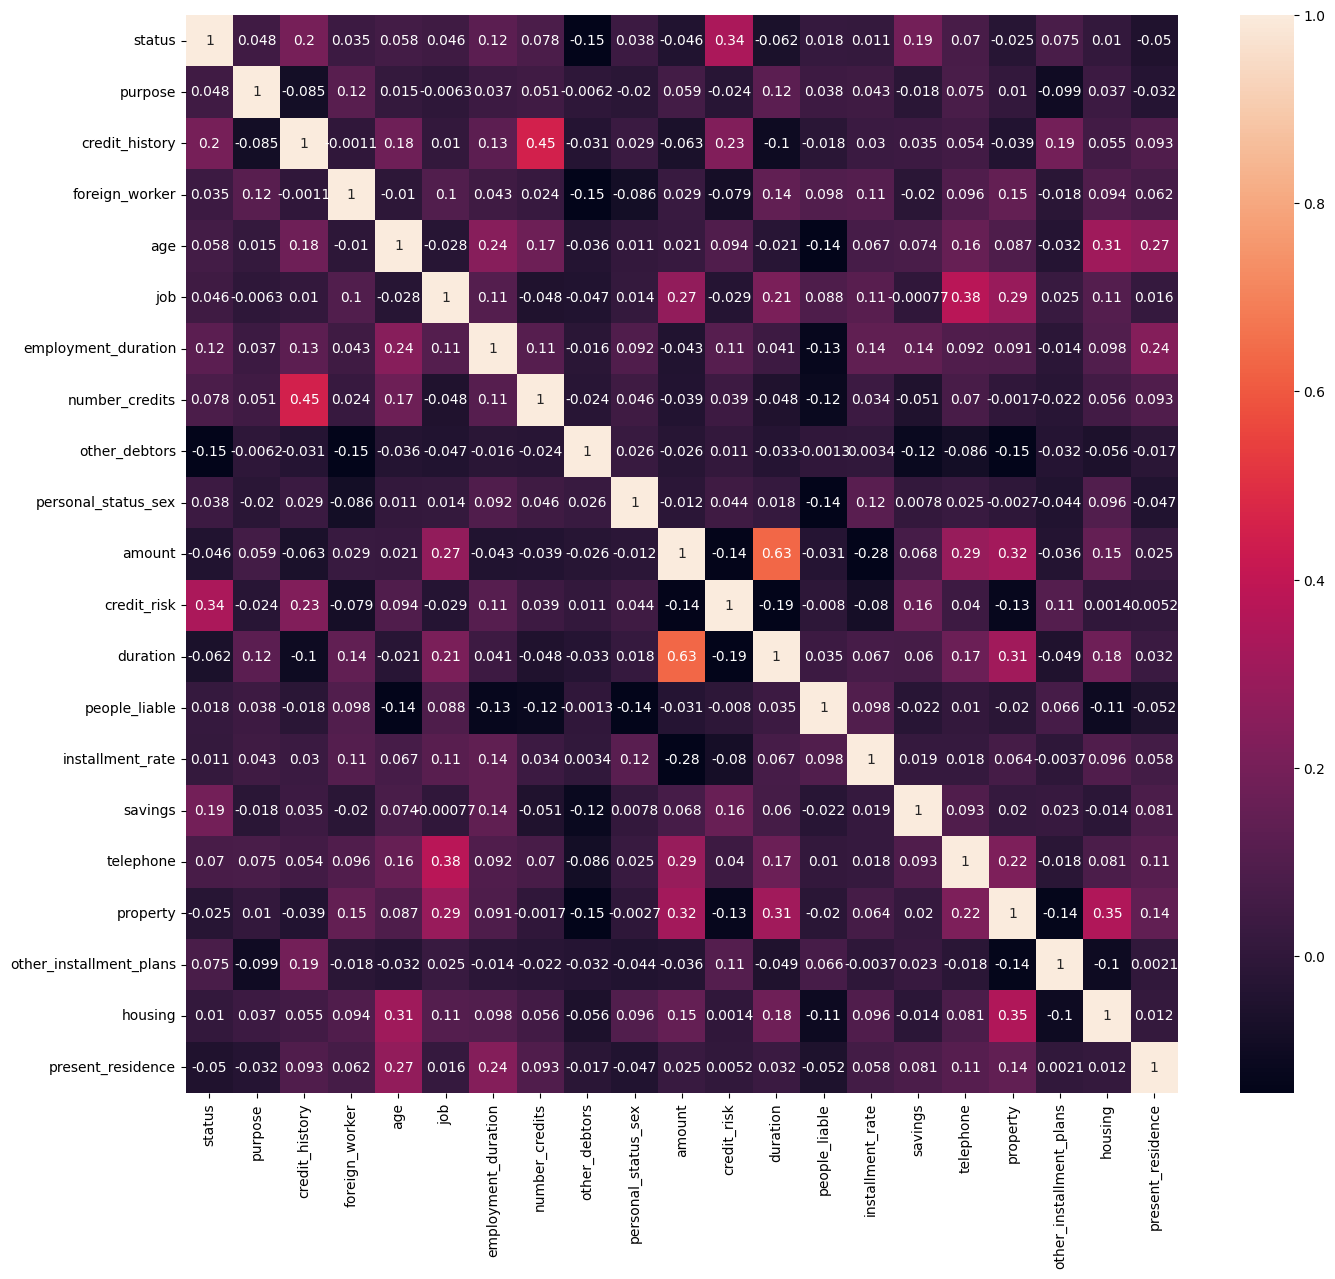

In [50]:
# Analyzing feature correlation 

plt.figure(figsize = (16, 14))
sns.heatmap(df_train.corr(), annot=True, robust=True)

Report: Columns having least correlation with target column -

*present_residence.

*housing.

*other_installment_plans

We will also perform Hypothesis Testing i.e T-Test for understanding whether the features are significant or not for further clearance. 

In [51]:
# Statistical test to determine whether to reject or accept H0
duration_0 = df_train[df_train['credit_risk']==0]['duration']
duration_1 = df_train[df_train['credit_risk']==1]['duration']

_, p_value = stats.ttest_ind(duration_0,duration_1,equal_var=False)

if(p_value<0.05):
  print('Reject null hypothesis')
else:
  print('Do not reject null hypotheis')

Reject null hypothesis


###### CONCLUSION : 
    
Therefore, we reject null hypothesis, which means there is a significant difference between means of duration based on credit_risk value. We can also conclude that 'duration' might be a good predictor variable for our model.

In [52]:

df_train['age'].describe(percentiles=percentiles)

count    800.000000
mean      35.542500
std       11.175724
min       19.000000
10%       23.900000
20%       26.000000
25%       27.000000
30%       28.000000
40%       30.000000
50%       33.000000
60%       36.000000
70%       40.000000
75%       42.000000
80%       44.000000
90%       51.000000
99%       66.010000
max       75.000000
Name: age, dtype: float64

In [53]:
df_train.groupby('credit_risk')['age'].describe(percentiles=percentiles)

count       mean        std   min   10%   20%   25%   30%   40%  \
credit_risk                                                                    
0            200.0  33.730000  10.637806  19.0  23.0  24.0  25.0  26.0  28.0   
1            600.0  36.146667  11.293408  19.0  24.0  26.0  27.0  28.0  31.0   

              50%   60%   70%    75%   80%   90%    99%   max  
credit_risk                                                    
0            31.0  34.0  38.0  40.00  42.0  50.0  61.02  66.0  
1            34.0  36.0  40.0  42.25  45.0  52.0  67.01  75.0

OBSERVATIONS :

Maority of the credit applicants are within the age group 25-45 yrs old, with a very few over 65 yrs.
The age of applicants by credit risk value also seem to be proportional; the mean, median and the values at each percentile are either equal or close by.
Therefore, it might be safe to assume that age does not really prove to be a good predictor for our classification model.
Nonetheless, we perform a statistical test to test/prove our assumption.

Hypothesis Testing : T-test

H0 : There IS NO significant difference between means of ages based on credit_risk value

H1 : There IS significant difference between means of ages based on credit_risk value

In [54]:
# Statistical test to determine if we should reject age as a good predictor variable
age_0 = df_train[df_train['credit_risk']==0]['age']
age_1 = df_train[df_train['credit_risk']==1]['age']

_, p_value = stats.ttest_ind(age_0,age_1,equal_var=False)

if(p_value<0.05):
  print('Reject null hypothesis')
else:
  print('Do not reject null hypotheis')

Reject null hypothesis


##### CONCLUSION : Contrary to our assumption, the statistical test tells us that age will prove as a good predictor for our model.

In [55]:
df_train['amount'].describe(percentiles=percentiles)

count      800.000000
mean      3210.290000
std       2792.840814
min        250.000000
10%        935.900000
20%       1262.000000
25%       1364.000000
30%       1476.800000
40%       1870.000000
50%       2264.000000
60%       2804.200000
70%       3540.100000
75%       3907.250000
80%       4591.600000
90%       6976.000000
99%      14030.940000
max      18424.000000
Name: amount, dtype: float64

In [56]:
df_train.groupby('credit_risk')['amount'].describe(percentiles=percentiles)

count         mean          std    min    10%     20%     25%  \
credit_risk                                                                  
0            200.0  3875.080000  3661.930787  433.0  898.8  1214.6  1325.5   
1            600.0  2988.693333  2398.447610  250.0  955.9  1277.4  1385.0   

                30%     40%     50%     60%     70%      75%     80%     90%  \
credit_risk                                                                    
0            1467.2  1922.0  2378.0  3252.0  4285.8  4885.75  6296.6  8983.6   
1            1476.8  1859.2  2244.0  2755.4  3384.2  3623.00  4024.2  6313.1   

                  99%      max  
credit_risk                     
0            15674.73  18424.0  
1            11764.09  15857.0

OBSERVATIONS :

Majority of the credit amounts lie between 1000 to 4000 .
When subcategorized based on credit_risk value, we see that the credit amounts are proportinal. But the mean amount for both risk categories are different, which implies that 'amount' might be a good predictor for our model.
Hypothesis Testing : T-test

H0 : There IS NO significant difference between means of ages based on credit_risk value.

H1 : There IS significant difference between means of ages based on credit_risk value.

In [57]:
# Statistical test to determine if we should reject age as a good predictor variable
amount_0 = df_train[df_train['credit_risk']==0]['amount']
amount_1 = df_train[df_train['credit_risk']==1]['amount']

_, p_value = stats.ttest_ind(amount_0,amount_1,equal_var=False)

if(p_value<0.05):
  print('Reject null hypothesis')
else:
  print('Do not reject null hypotheis')

Reject null hypothesis


##### CONCLUSION : Statistical test indicates that our assumption is correct and 'amount' can be considered a good predictor for our model.

In [59]:
def plotting_percentages_graph(df_train, col, target, fig_num, x_labels):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df_train.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    #order_list = list(df[col].unique())
    #order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    graph = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, height=6, aspect=3)
    graph.ax.set_xticklabels(x_labels)
    graph.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for pic in graph.ax.patches:
        txt = str(pic.get_height().round(1)) + '%'
        txt_x = pic.get_x() 
        txt_y = pic.get_height()
        graph.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'Figure {fig_num}(b) : {col.title()} By Percent {target.title()}')
    plt.xlabel(f'{col.title()}')
               
    plt.ylabel(f'{target.title()} Percentage', 
               fontdict={'fontsize': 20})
    #file_path = '/content/Graphs/' + str(fig_num) + '_b.jpeg'
    #plt.savefig(file_path)
    return graph

In [60]:
def chisquare_test(df_train, cat_var):
    # Creating an empty list of final selected predictors
    #SelectedPredictors=[]

    CrossTabResult=pd.crosstab(index=df_train['credit_risk'], columns=df_train[cat_var])
    ChiSqResult = chi2_contingency(CrossTabResult)
        
    # If the ChiSq P-Value is <0.05, that means we reject H0
    if (ChiSqResult[1] < 0.05):
        print('P-Value :', ChiSqResult[1])
        print('\'',cat_var,'\' IS CORRELATED with \'credit_risk\'')
    else:
        print('P-Value :', ChiSqResult[1])
        print(f'\'{cat_var}\' IS NOT CORRELATED with credit_risk')        
            

In [61]:
df_train['employment_duration'].unique()
     

array([2, 3, 4, 1, 5], dtype=int64)

As per employment_duration column's unique value,

1 : unemployed.

2 : < 1 yr.

3 : 1 <= ... < 4 yrs.

4 : 4 <= ... < 7 yrs.

5 : >= 7 yrs.

In [62]:
ed_labels = ['Unemployed', 'Less than 1 yr', 'Between 1-4 yrs', 'Between 4-7 yrs', 'More tan 7 yrs']

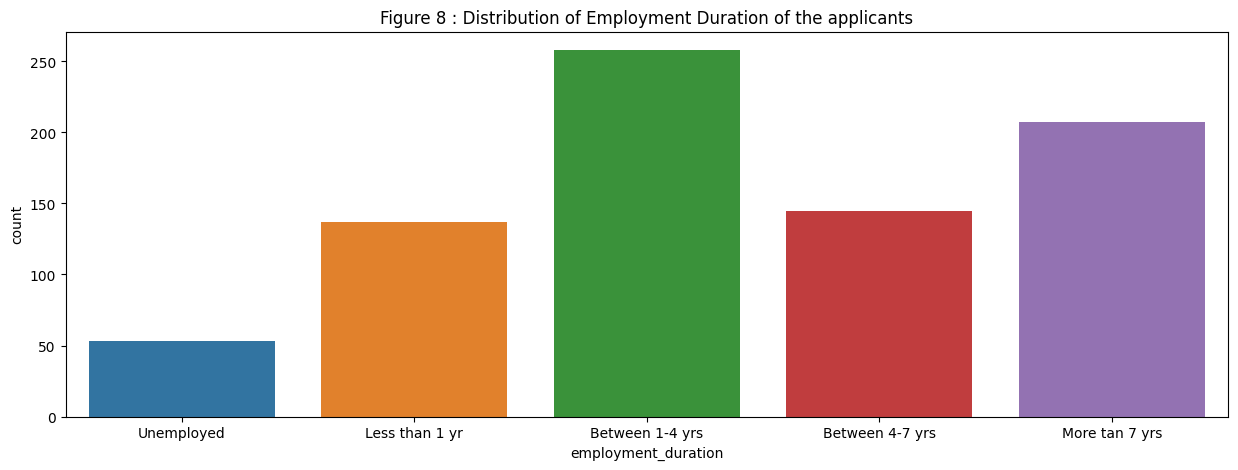

In [63]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='employment_duration', data=df_train)
ax.set_xticklabels(ed_labels)
plt.title('Figure 8 : Distribution of Employment Duration of the applicants')
#plt.savefig('/graphs/8.jpeg')
plt.show()

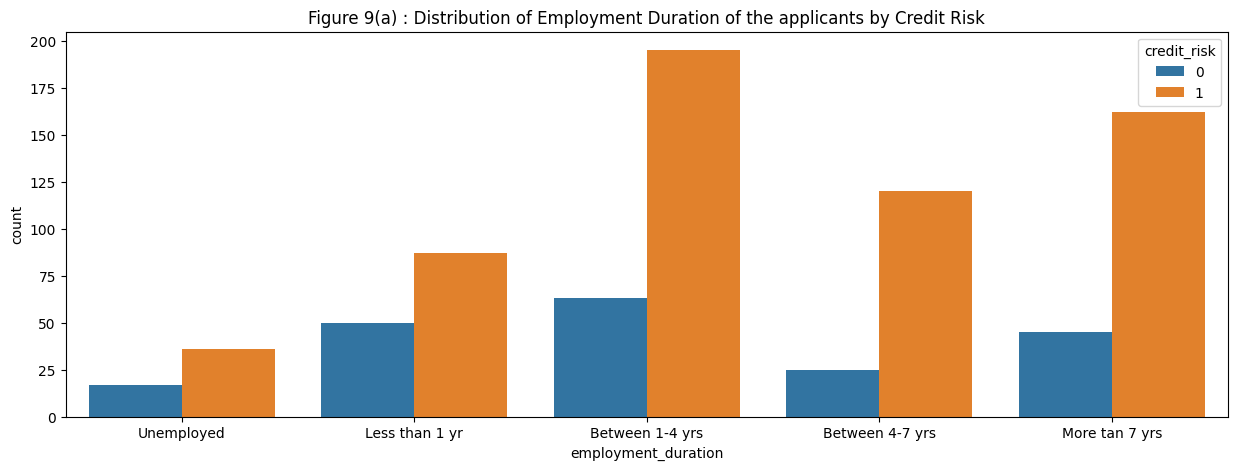

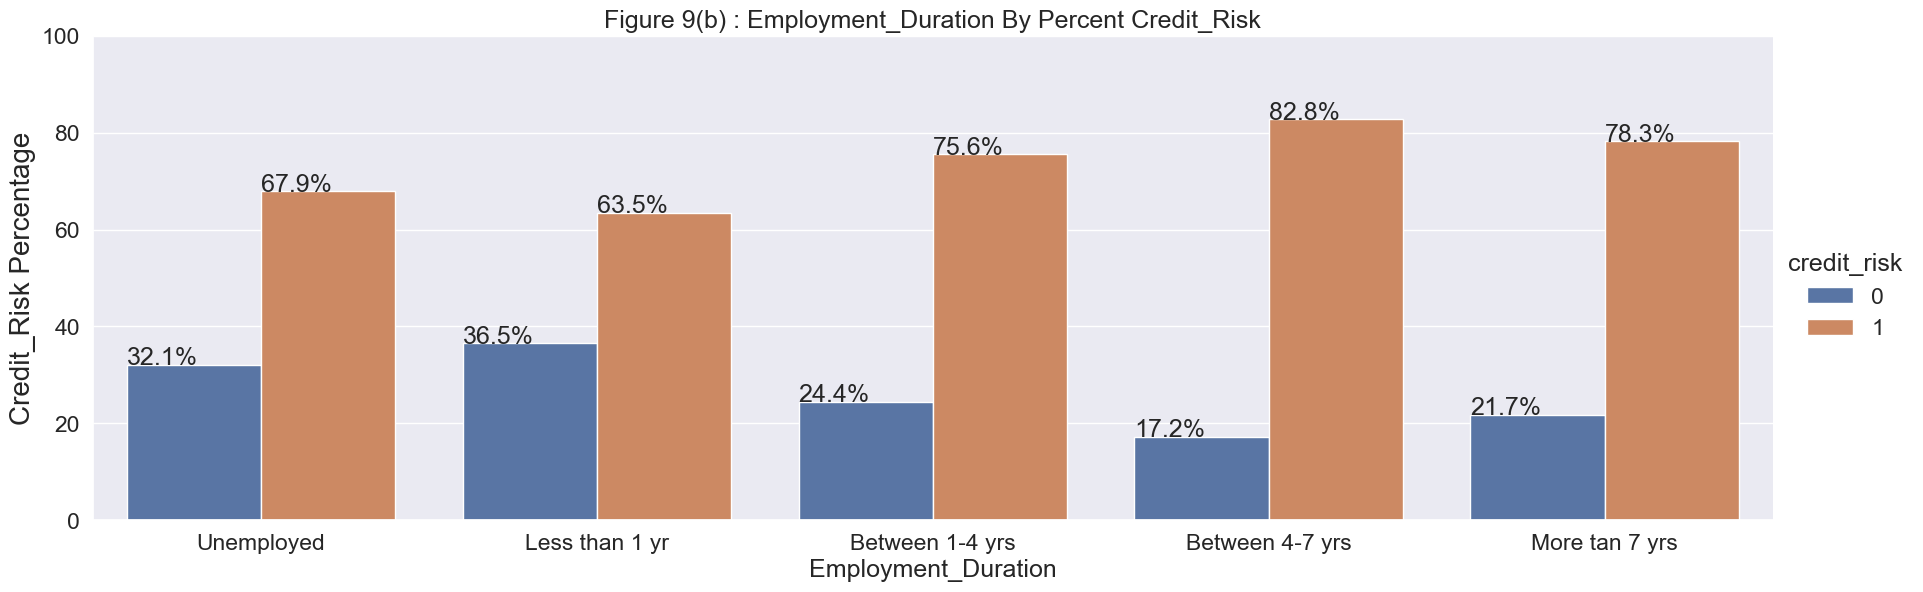

In [64]:

fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='employment_duration', hue='credit_risk', data=df_train)
ax.set_xticklabels(ed_labels)
plt.title('Figure 9(a) : Distribution of Employment Duration of the applicants by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/9_a.jpeg')
plt.show()

plotting_percentages_graph(df_train, 'employment_duration', 'credit_risk', 9, ed_labels)

##### OBSERVATIONS :

* Majority of the credit applicants have their employment duration either between 1-4 yrs or more than 7 yrs.
* When categorized based on credit_risk value, both the categories are in almost equal proportion across all the employment_duration types.
* When we observe the percentage plot, we see that customers wo have employment duration less than 1 yr have the highest percentage risk and those wit more than 4 yrs of employment have the lowest risk. 
* This might be attributed to the fact that customers who have more work experience earn more and hence have less chances of defaulting or not repaying compared to customers with least work experience.
* It might be safe to assume that employment_duration might be a good predictor variable for our model.

Hypothesis Test : Chi-Square Test H0 : 'employment_duration' has no significant effect on 'credit_risk' H1 : 'employment_duration' has a significant effect on 'credit_risk'.

In [65]:
chisquare_test(df_train, 'employment_duration')

P-Value : 0.0019787668847105963
' employment_duration ' IS CORRELATED with 'credit_risk'


In [66]:
# Credit installments as a percentage of debtor's disposal income: "Installment Rate"

df_train['installment_rate'].unique()

array([4, 2, 3, 1], dtype=int64)

As per installment_rate column,

1 : >= 35.

2 : 25 <= ... < 35.

3 : 20 <= ... < 25.

4 : < 20.

In [67]:
ir_labels = ['Greater than 35%', '25% to 35%', '20% to 25%', 'Less than 20%']

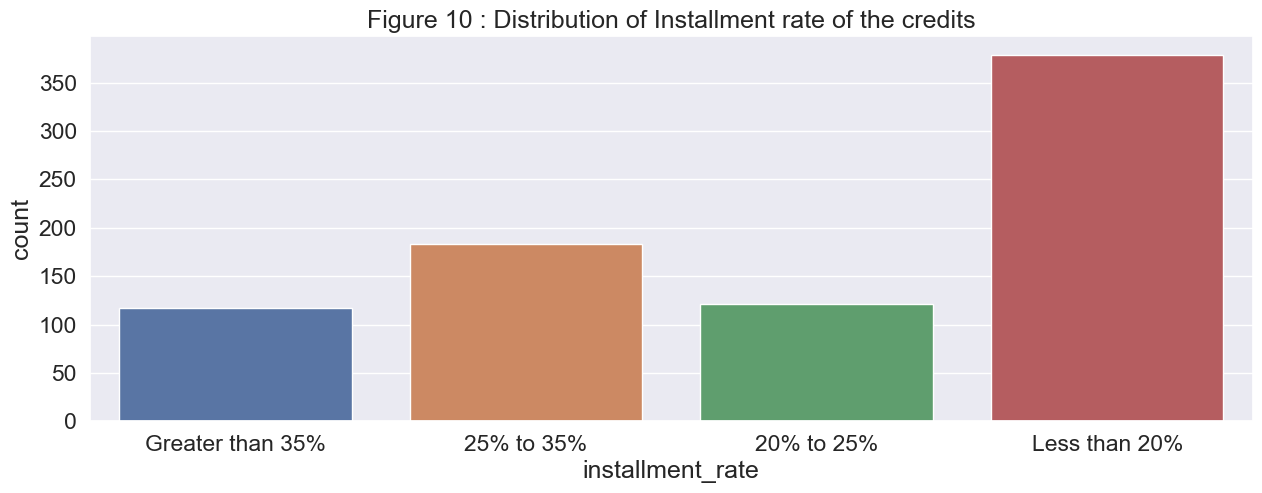

In [68]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='installment_rate', data=df_train)
ax.set_xticklabels(ir_labels)
plt.title('Figure 10 : Distribution of Installment rate of the credits')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/10.jpeg')
plt.show()

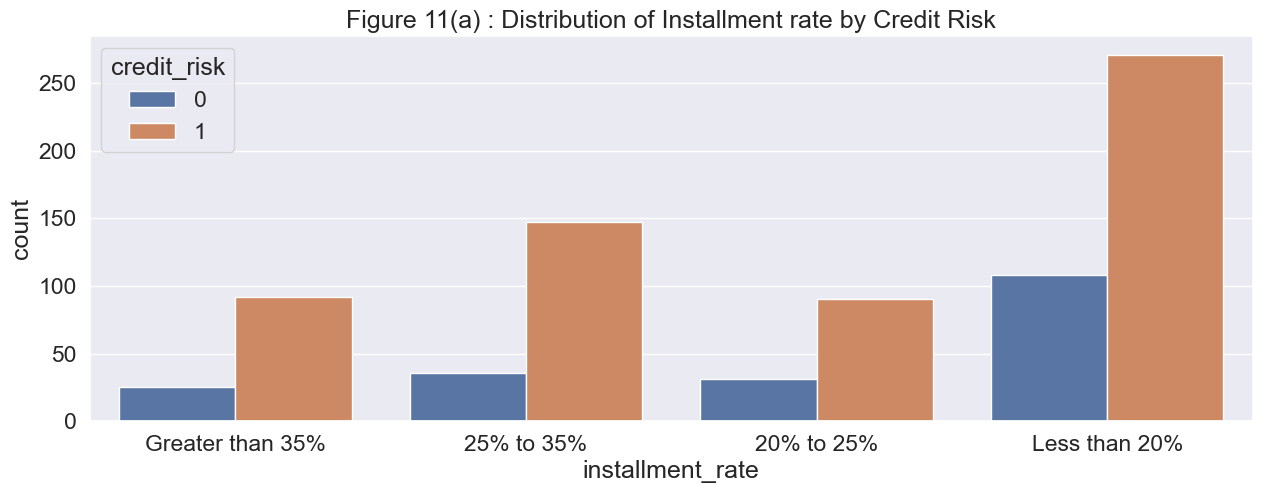

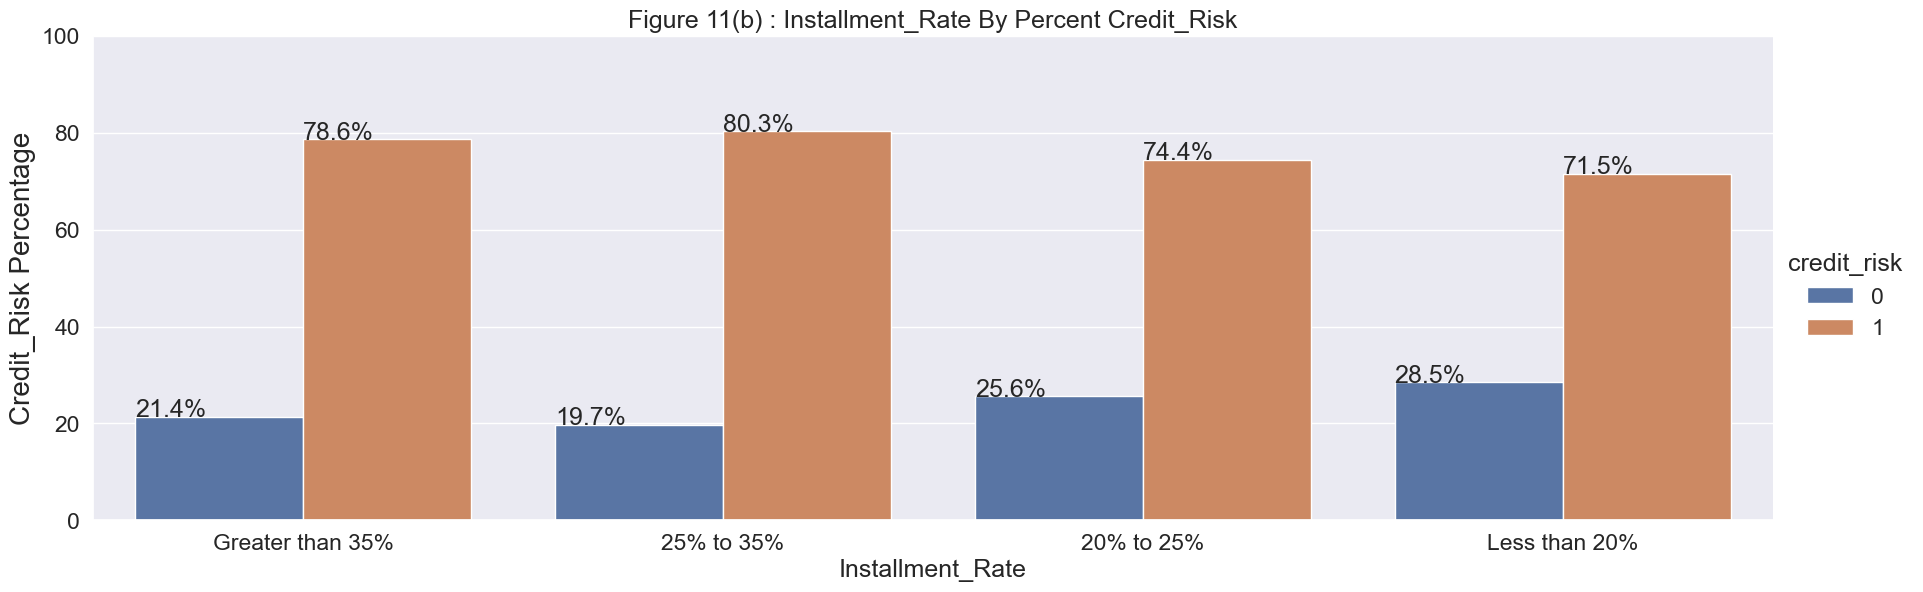

In [69]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='installment_rate', hue='credit_risk', data=df_train)
ax.set_xticklabels(ir_labels)
plt.title('Figure 11(a) : Distribution of Installment rate by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/11_a.jpeg')
plt.show()

plotting_percentages_graph(df_train, 'installment_rate', 'credit_risk', 11, ir_labels)
     

##### OBSERVATIONS :

Maority of the credits have installment rates below 20%.
When categorized based on credit_risk value (count and percentage plots), both the categories are in almost equal proportion(or percentages) across all the installment rate categories.
So, it might be safe to assume that installment_rate might not be a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'installment_rate' has no significant effect on 'credit_risk'.

H1 : 'installment_rate' has a significant effect on 'credit_risk'.

In [70]:
chisquare_test(df_train, 'installment_rate')

P-Value : 0.10735095868999946
'installment_rate' IS NOT CORRELATED with credit_risk


#### CONCLUSION :

    'installment_rate' is not a good predictor for our model, and could be dropped.

##### Length of time (in years) the debtor lives in the present residence : 'present_residence'

In [71]:
# Unique catgorical values for present_residence
df_train['present_residence'].unique()     

array([4, 2, 3, 1], dtype=int64)

As per present_residence column,

1 : < 1 yr
    
2 : 1 <= ... < 4 yrs
    
3 : 4 <= ... < 7 yrs
    
4 : >= 7 yrs


In [72]:
# Labels for the categories
pr_labels = ['Less than one year', '1 to 4 yrs', '4 to 7 yrs', 'Greater than 7 yrs']

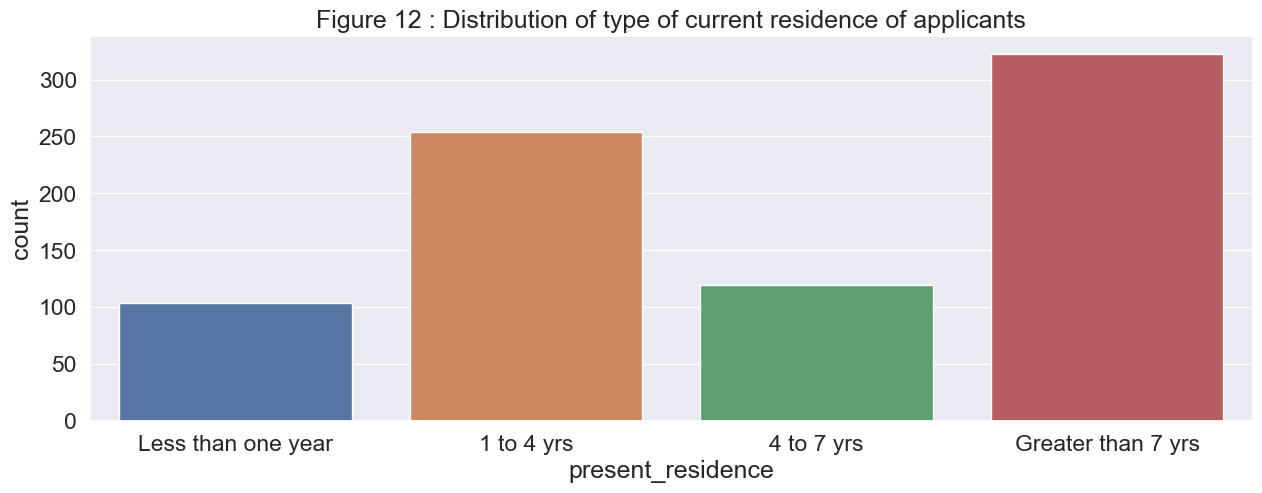

In [73]:
# Plotting the distribution of current residence types
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='present_residence', data=df_train)
ax.set_xticklabels(pr_labels)
plt.title('Figure 12 : Distribution of type of current residence of applicants')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/12.jpeg')
plt.show()

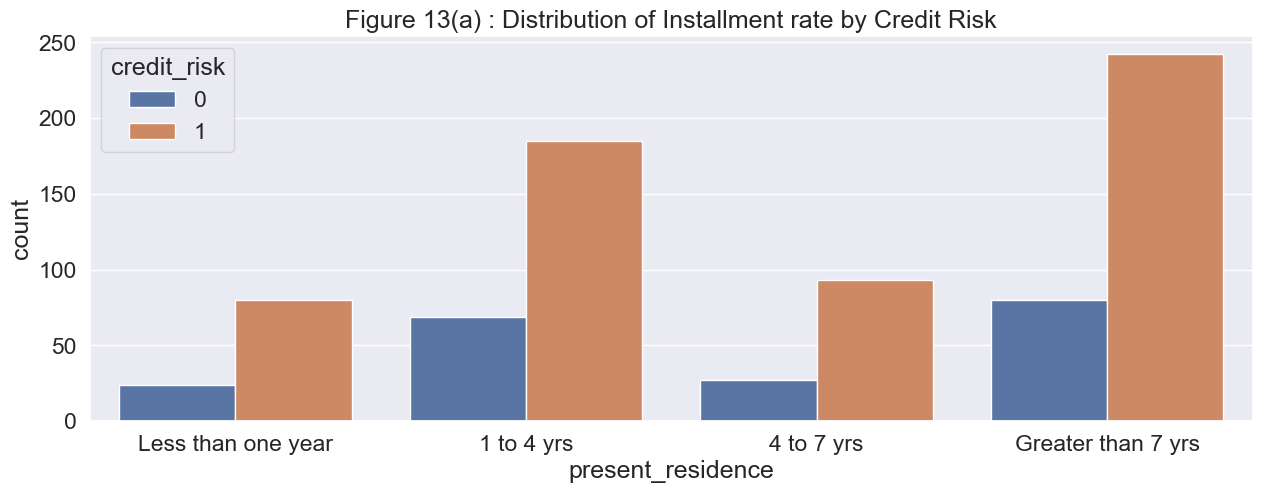

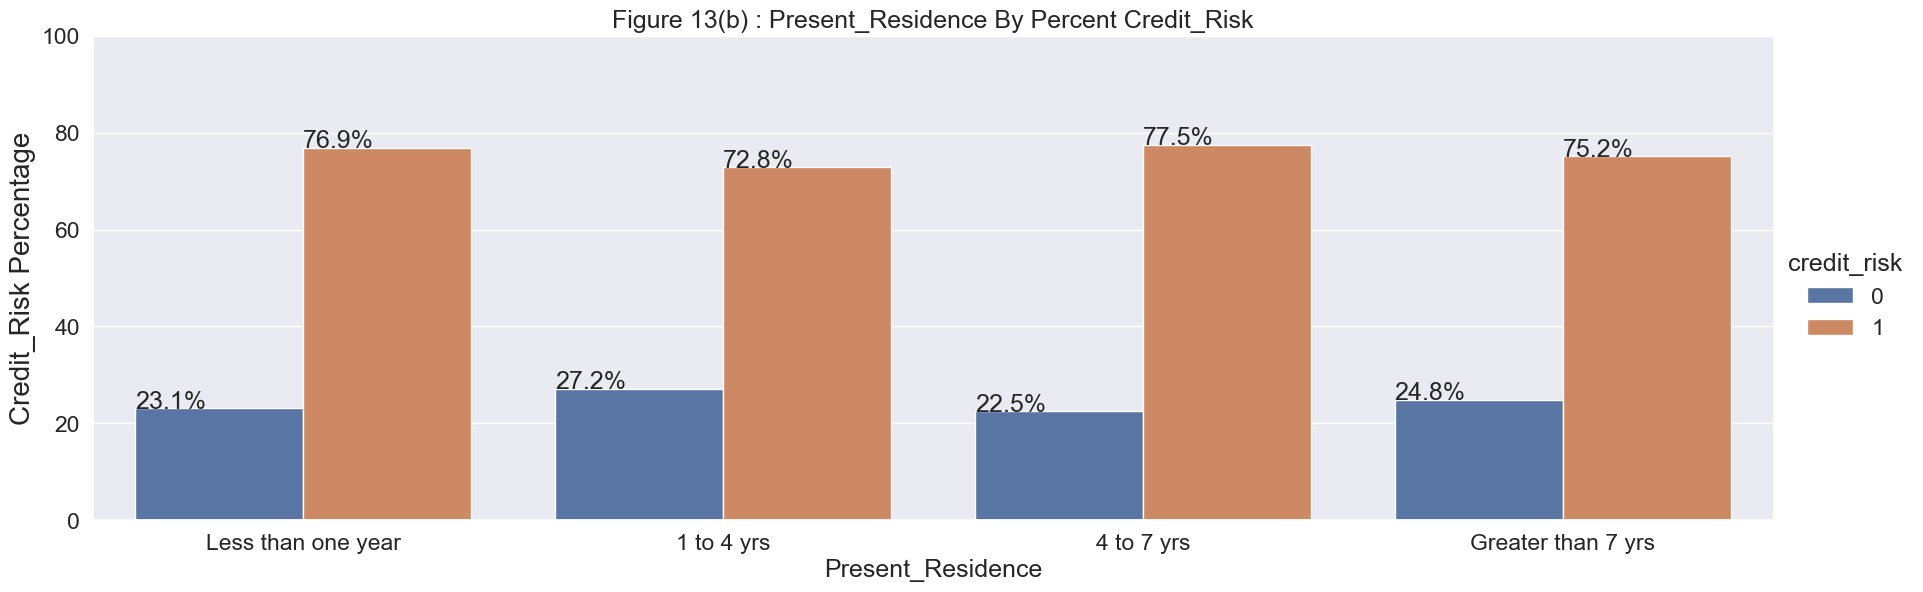

In [74]:
# Plotting distribution of current resident types against credit_risk
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='present_residence', hue='credit_risk', data=df_train)
ax.set_xticklabels(pr_labels)
plt.title('Figure 13(a) : Distribution of Installment rate by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/13_a.jpeg')
plt.show()

# Percentage plot: present_residence against credit_risk
plotting_percentages_graph(df_train, 'present_residence', 'credit_risk', 13, pr_labels)
     

##### OBSERVATIONS :

Maority of the credits have installment rates below 20%.
When categorized based on credit_risk value (count and percentage plots), both the categories are in almost equal proportion(or percentages) across all the installment rate categories.
So, it might be safe to assume that installment_rate might not be a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'installment_rate' has no significant effect on 'credit_risk'.

H1 : 'installment_rate' has a significant effect on 'credit_risk'.

In [75]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'present_residence')

P-Value : 0.7423667645476439
'present_residence' IS NOT CORRELATED with credit_risk


##### CONCLUSION : 
    
    'installment_rate' is not a good predictor for our model, and could be dropped.

###### Debtor's most valuable property : 'property'

In [76]:
# Unique catgorical values for properties
df_train['property'].unique()

array([2, 1, 3, 4], dtype=int64)

As per the description,

1 : unknown / no property

2 : car or other

3 : building soc. savings agr./life insurance

4 : real estate

The highest possible code will be used here. Condition 2 is used, if codes 3 or 4 are not applicable (ie, if the debtor does not own a building/savings/insurance or real estate) and there is a car or any other relevant property that does not fall under variable savings.

In [77]:
# Labels for the categories
p_labels = ['Unknown/No property', 'Car or other', 'Building/savings/insurance', 'Real estate']

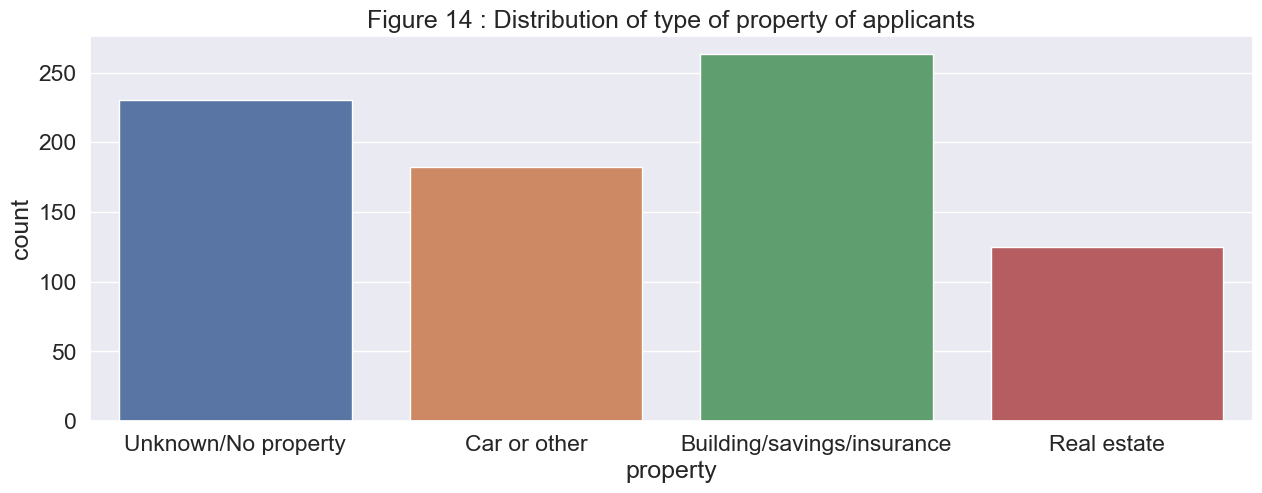

In [78]:
# Plotting the distribution of property types
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='property', data=df_train)
ax.set_xticklabels(p_labels)
plt.title('Figure 14 : Distribution of type of property of applicants')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/14.jpeg')
plt.show()

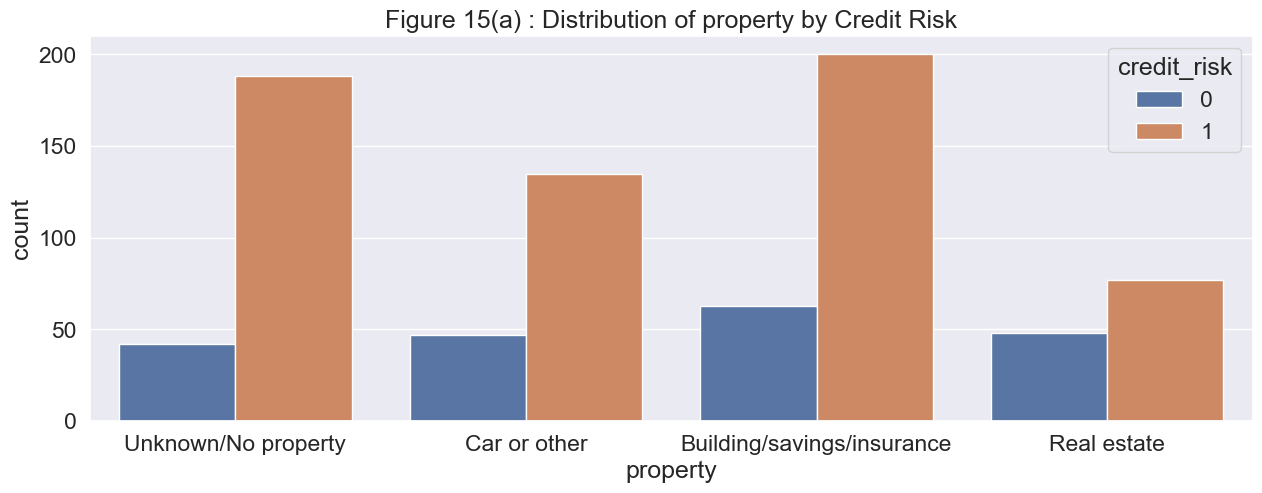

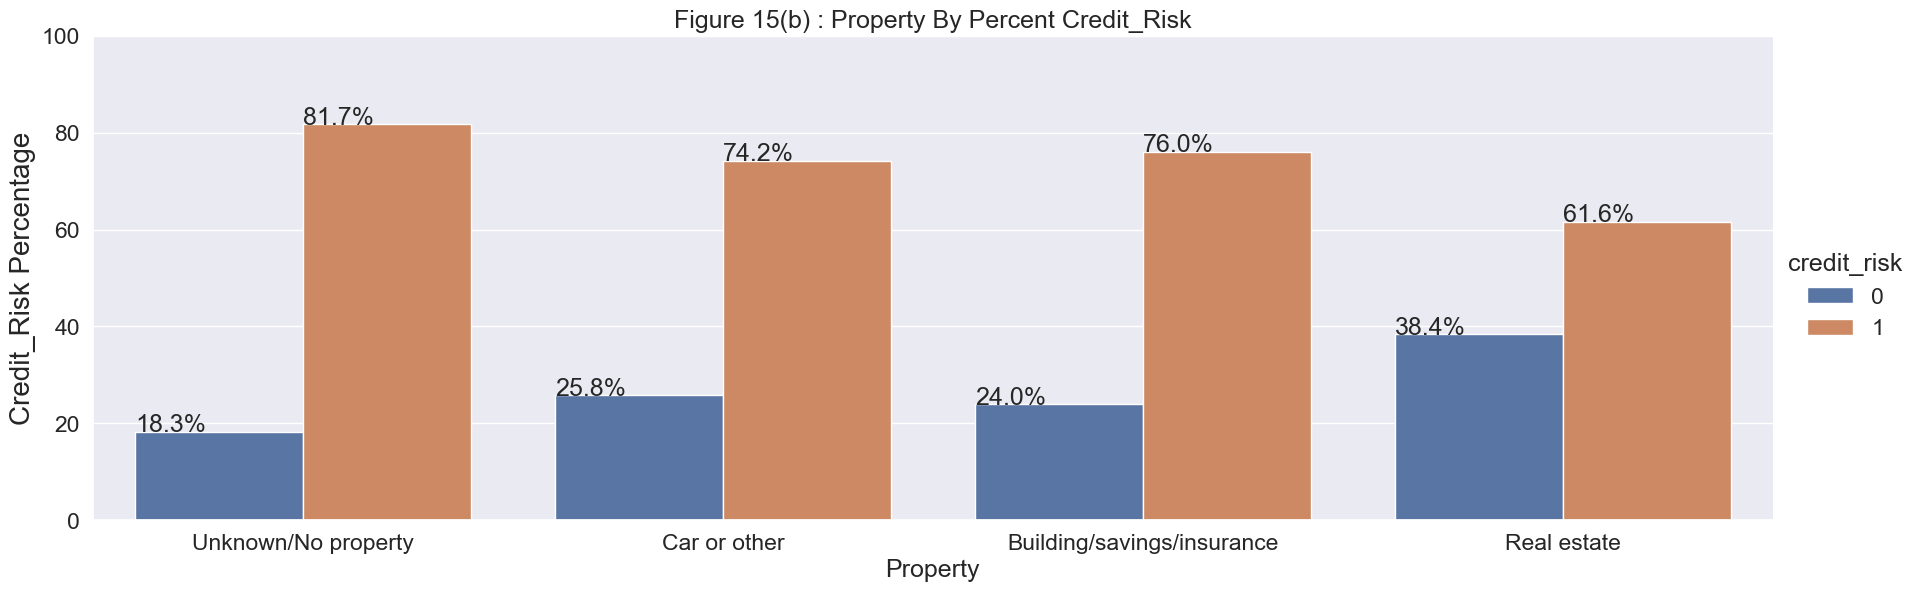

In [79]:
# Plotting distribution of property types against credit_risk
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='property', hue='credit_risk', data=df_train)
ax.set_xticklabels(p_labels)
plt.title('Figure 15(a) : Distribution of property by Credit Risk')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/15.jpeg')
plt.show()

# Percentage plot: present_residence against credit_risk
plotting_percentages_graph(df_train, 'property', 'credit_risk', 15, p_labels)
     

#### OBSERVATIONS :

Most of the debtors have their own building(house)/savings/insurance. And less number of debtors have real estates.
When categorized based on credit_risk value (count and percentage plots), we see that people who have real estates are the most risk prone group of people compared to other property holders. This might be attributed to the fact that, generally, huge real estates are owned by wealthy people(businessmen, people working in higher positions etc) and as such their purpose for a credit/debt must also need huge amounts, which might cause huge interest rates and chances of repayment delays or skipping repayments are more.
It is also interesting to note that customers ho do not own much property, seem to be the least risky group of customers when it comes to credits.
So, it might be safe to assume that 'property' might be a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'property' has no significant effect on 'credit_risk'

H1 : 'property' has a significant effect on 'credit_risk'

In [80]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'property')

P-Value : 0.000492703348824934
' property ' IS CORRELATED with 'credit_risk'


#### CONCLUSION : 

    'property' is a good predictor for our model.

##### Debtor's job : 'job'

In [81]:
# Unique catgorical values for properties
df_train['job'].unique()

array([3, 2, 1, 4], dtype=int64)

As per description,

1 : unemployed/unskilled - non-resident.
    
2 : unskilled - resident.
    
3 : skilled employee/official.
    
4 : manager/self-empl./highly qualif. employee.

In [82]:
# Labels for the categories
j_labels = ['Unskilled-non-resident', 'Unskilled-resident', 'skilled/official', 'Manager/self-employed/ \n Highly qualified']

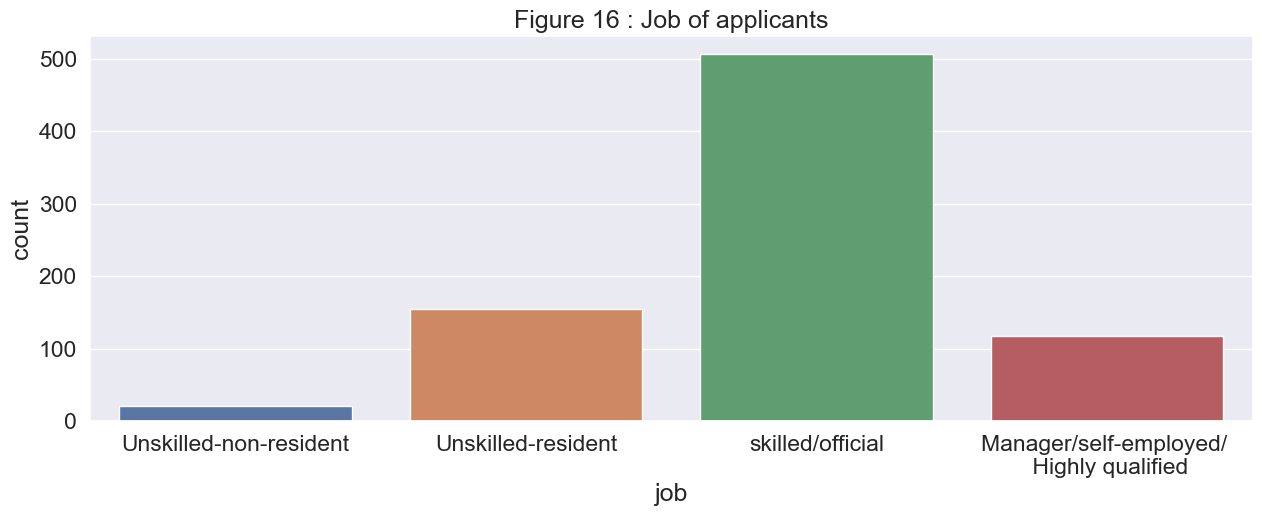

In [83]:
# Plotting the distribution of property types
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='job', data=df_train)
ax.set_xticklabels(j_labels)
plt.title('Figure 16 : Job of applicants')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/16.jpeg')
plt.show()
     

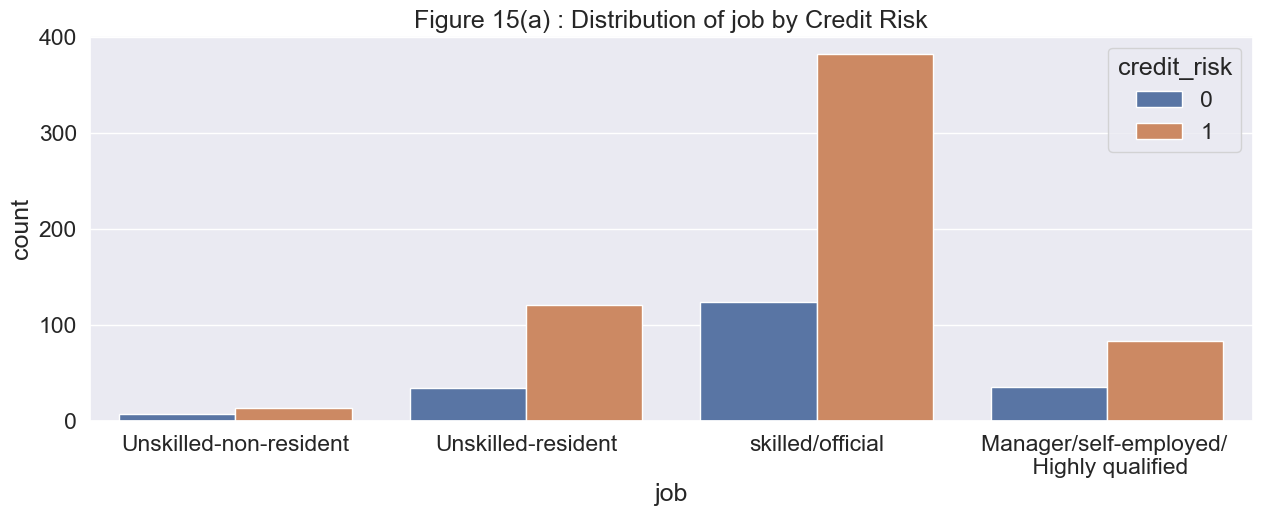

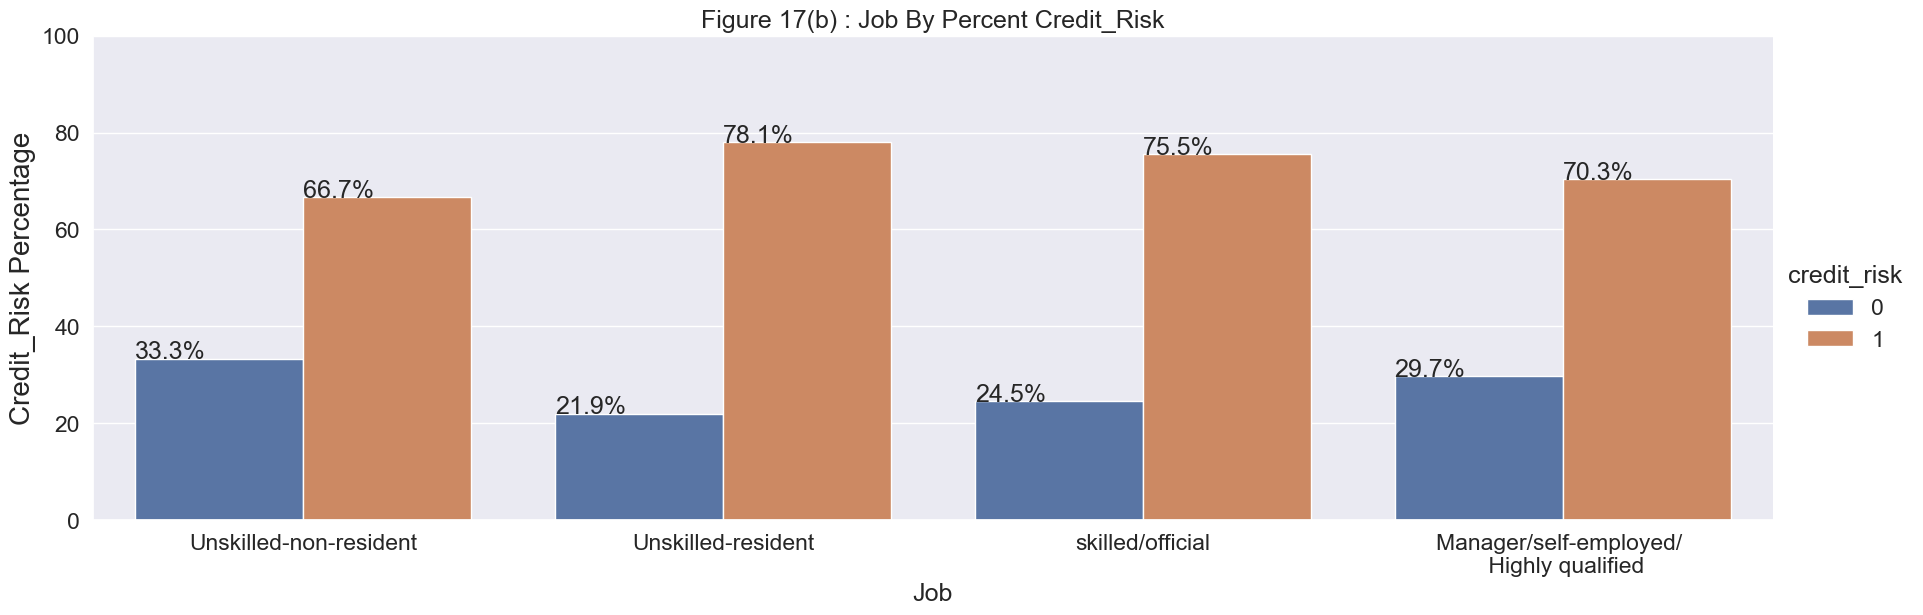

In [84]:

# Plotting distribution of job types against credit_risk
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='job', hue='credit_risk', data=df_train)
ax.set_xticklabels(j_labels)
plt.title('Figure 15(a) : Distribution of job by Credit Risk')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/15_a.jpeg')
plt.show()

# Percentage plot: present_residence against credit_risk
plotting_percentages_graph(df_train, 'job', 'credit_risk', 17, j_labels)

##### OBSERVATIONS :

Most of the debtors are skilled workers/working in office.
When categorized based on credit_risk value (count and percentage plots), the proportion of debtors for good and bad risk category are more or less the same/close by across all job types.
So, it might be safe to assume that 'property' is not a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'job' has no significant effect on 'credit_risk'.

H1 : 'job' has a significant effect on 'credit_risk'.

In [85]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'job') 

P-Value : 0.39359830589607936
'job' IS NOT CORRELATED with credit_risk


##### CONCLUSION : 
    
    'job' is a not good predictor for our model and could be dropped.

##### Number of credits including the current one the debtor has (or had) at this bank : 'number_credits'

In [86]:
# Unique catgorical values
df_train['number_credits'].unique()

array([1, 2, 4, 3], dtype=int64)

As per the description,

1 : 1
    
2 : 2-3
    
3 : 4-5
    
4 : >= 6

In [87]:
# Labels for the categories
nc_labels = ['1', '2 to 3', '4 to 5', 'Greater than 6']

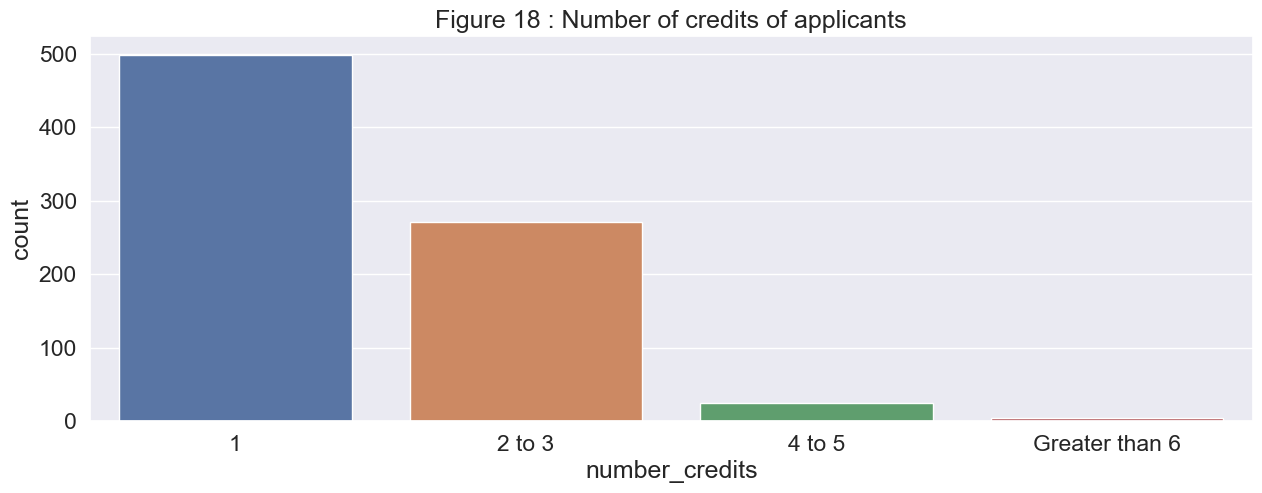

In [88]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='number_credits', data=df_train)
ax.set_xticklabels(nc_labels)
plt.title('Figure 18 : Number of credits of applicants')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/18.jpeg')
plt.show()

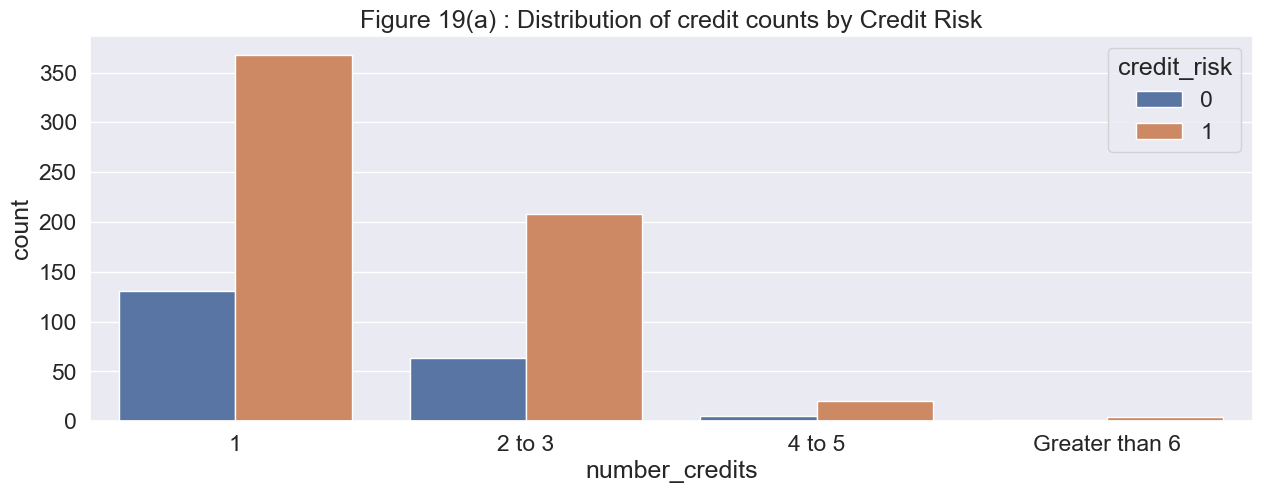

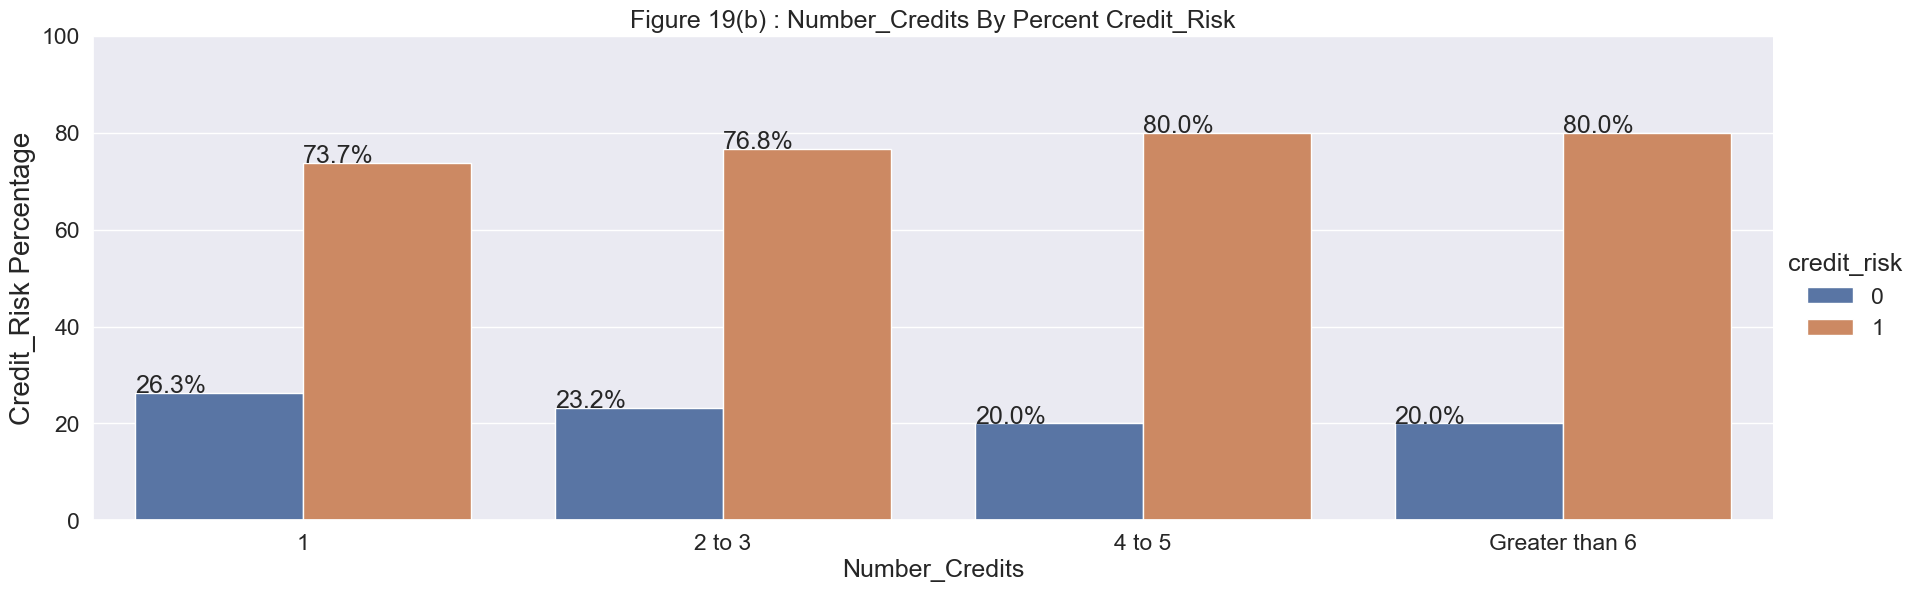

In [89]:
# Plotting distribution of credit counts against credit_risk
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='number_credits', hue='credit_risk', data=df_train)
ax.set_xticklabels(nc_labels)
plt.title('Figure 19(a) : Distribution of credit counts by Credit Risk')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/19.jpeg')
plt.show()

# Percentage plot: present_residence against credit_risk
plotting_percentages_graph(df_train, 'number_credits', 'credit_risk', 19, nc_labels)

##### OBSERVATIONS :

Most of the debtors have only 1 credit/loans wit this bank.
When categorized based on credit_risk value (count and percentage plots), the proportion of debtors for good and bad risk category are more or less the same/close by across all number_credit categories.
So, it might be safe to assume that 'number_credits' is not a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'number_credits' has no significant effect on 'credit_risk'.

H1 : 'number_credits' has a significant effect on 'credit_risk'.

In [90]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'number_credits')

P-Value : 0.7382863282994045
'number_credits' IS NOT CORRELATED with credit_risk


#### CONCLUSION : 
    'number_credits' is a not good predictor for our model and could be dropped.

#### Status of the debtor's checking account with the bank : 'status'

In [91]:
# Unique catgorical values
df_train['status'].unique()

array([1, 2, 4, 3], dtype=int64)

As per description,

1 : no checking account.

2 : ... < 0 DM.

3 : 0<= ... < 200 DM.

4 : ... >= 200 DM / salary for at least 1 year.

In [92]:
# Labels for the categories
s_labels = ['No checking account', 'Less than 0 DM', '0 to 200 DM', 'Greater than 200DM or \n Salary for min 1 yr']

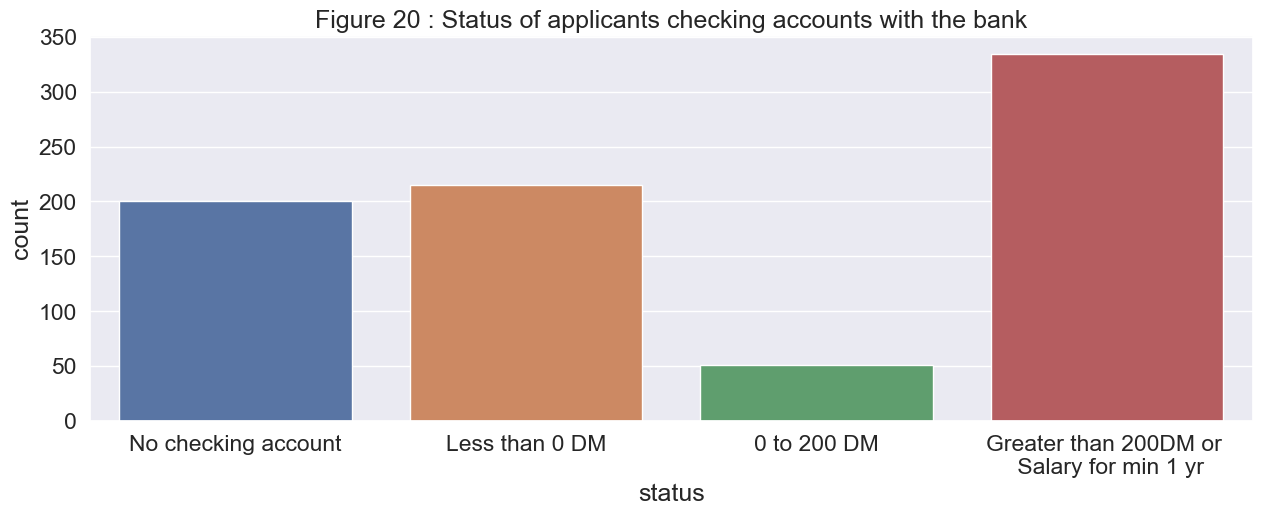

In [93]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='status', data=df_train)
ax.set_xticklabels(s_labels)
plt.title('Figure 20 : Status of applicants checking accounts with the bank')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/20.jpeg')
plt.show()
     


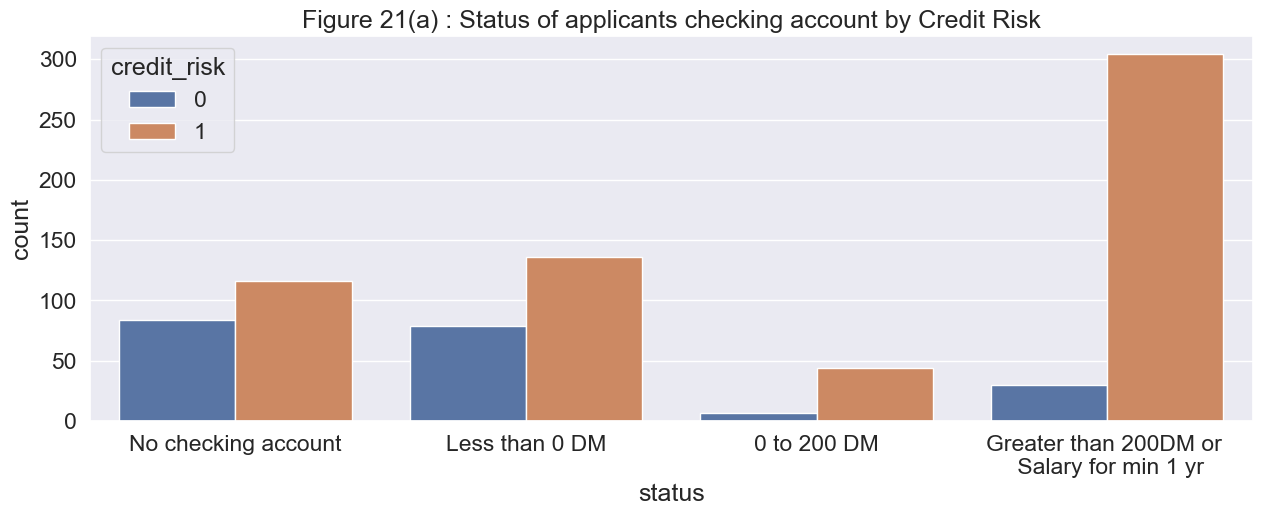

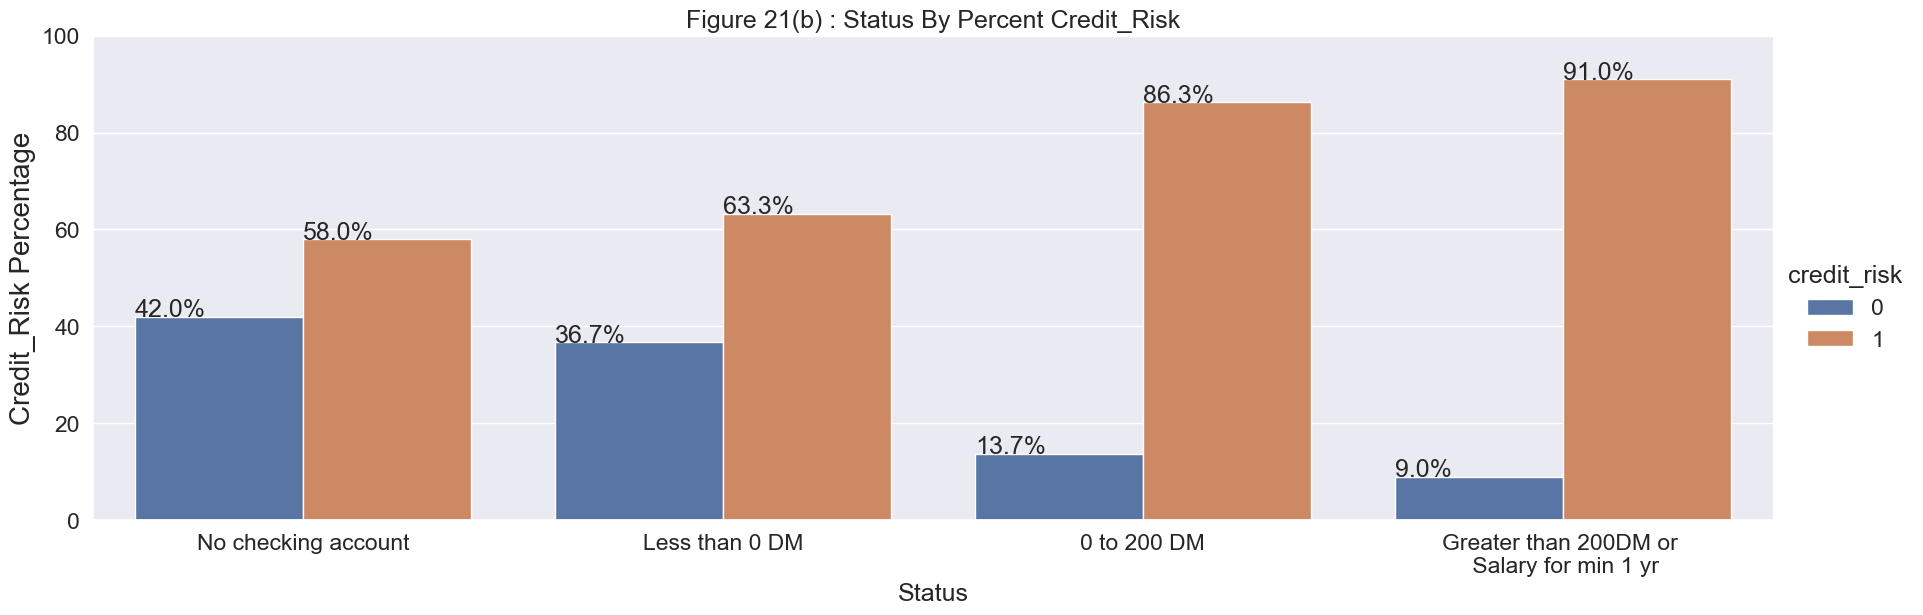

In [94]:
# Plotting distribution of applicants' checking account against credit_risk
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='status', hue='credit_risk', data=df_train)
ax.set_xticklabels(s_labels)
plt.title('Figure 21(a) : Status of applicants checking account by Credit Risk')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/21.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'status', 'credit_risk', 21, s_labels)

##### OBSERVATIONS :

Majority of the applicants have greater than 200DM / 1yr salary in their account.
When categorized based on credit_risk value ( percentage plot), applicants who have no checking account with the bank have the highest bad-risk(0) percentage and decreases with the increase in the amount in the checking account (refer fig 21(b)).
So, it might be safe to assume that 'status' is a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'status' has no significant effect on 'credit_risk'.

H1 : 'status' has a significant effect on 'credit_risk'.

In [95]:

# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'status')
     

P-Value : 1.240115541981852e-20
' status ' IS CORRELATED with 'credit_risk'


##### CONCLUSION : 
    Our assumption is proved to be true; 'status' is infact a good predictor for our model, statistically.

#### History of compliance with previous or concurrent credit contracts : 'credit_history'

In [96]:
# Unique catgorical values
df_train['credit_history'].unique()

array([4, 2, 3, 0, 1], dtype=int64)

As per description,

0 : delay in paying off in the past.
    
1 : critical account/other credits elsewhere.
    
2 : no credits taken/all credits paid back duly.
    
3 : existing credits paid back duly till now.
    
4 : all credits at this bank paid back duly.

In [97]:
# Labels for the categories
ch_labels = ['Delay in paying off \n in the past', 'Critical account/ \n other credits elsewhere', 
            'No credits taken/ \n all credits paid back duly', 'Existing credits paid \n back duly till now',
            'All credits at this \n bank paid back duly']

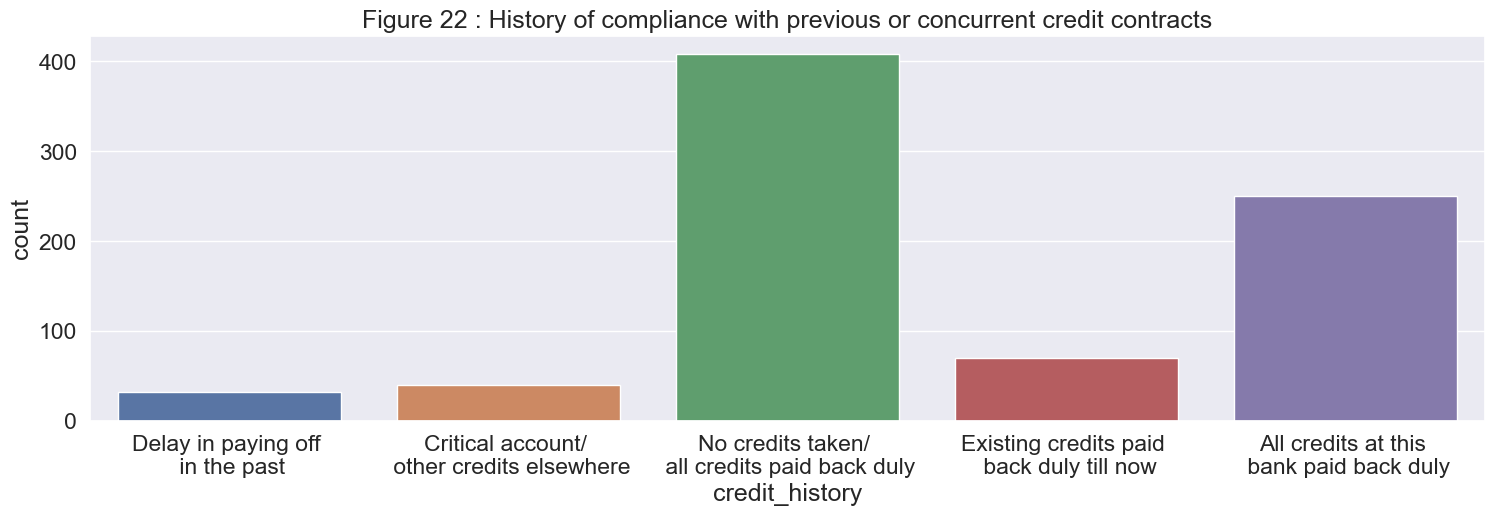

In [98]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='credit_history', data=df_train)
ax.set_xticklabels(ch_labels)
plt.title('Figure 22 : History of compliance with previous or concurrent credit contracts')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/22.jpeg')
plt.show()
     

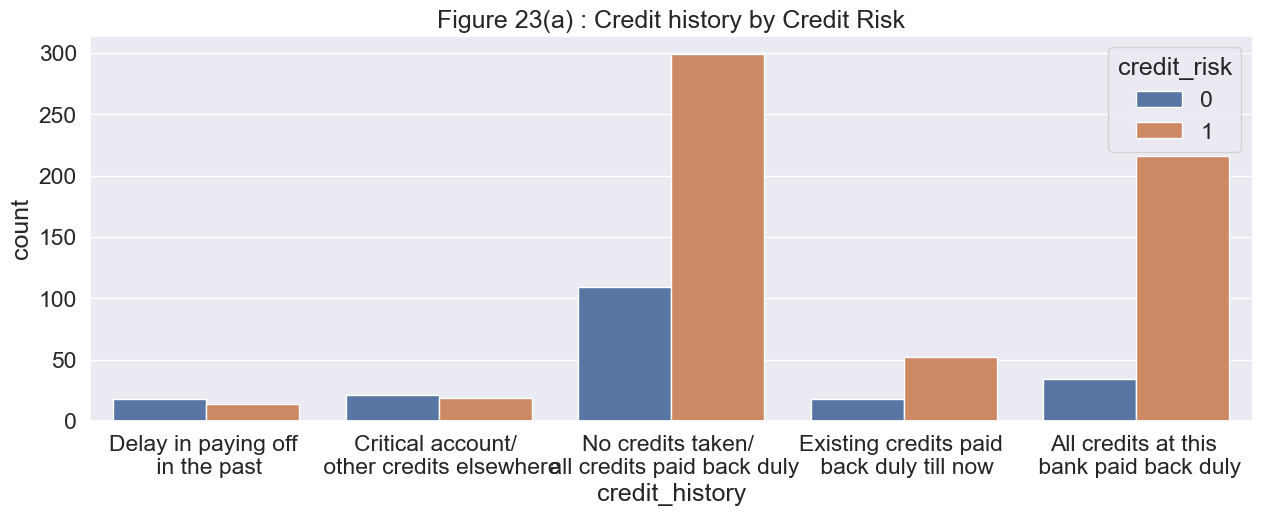

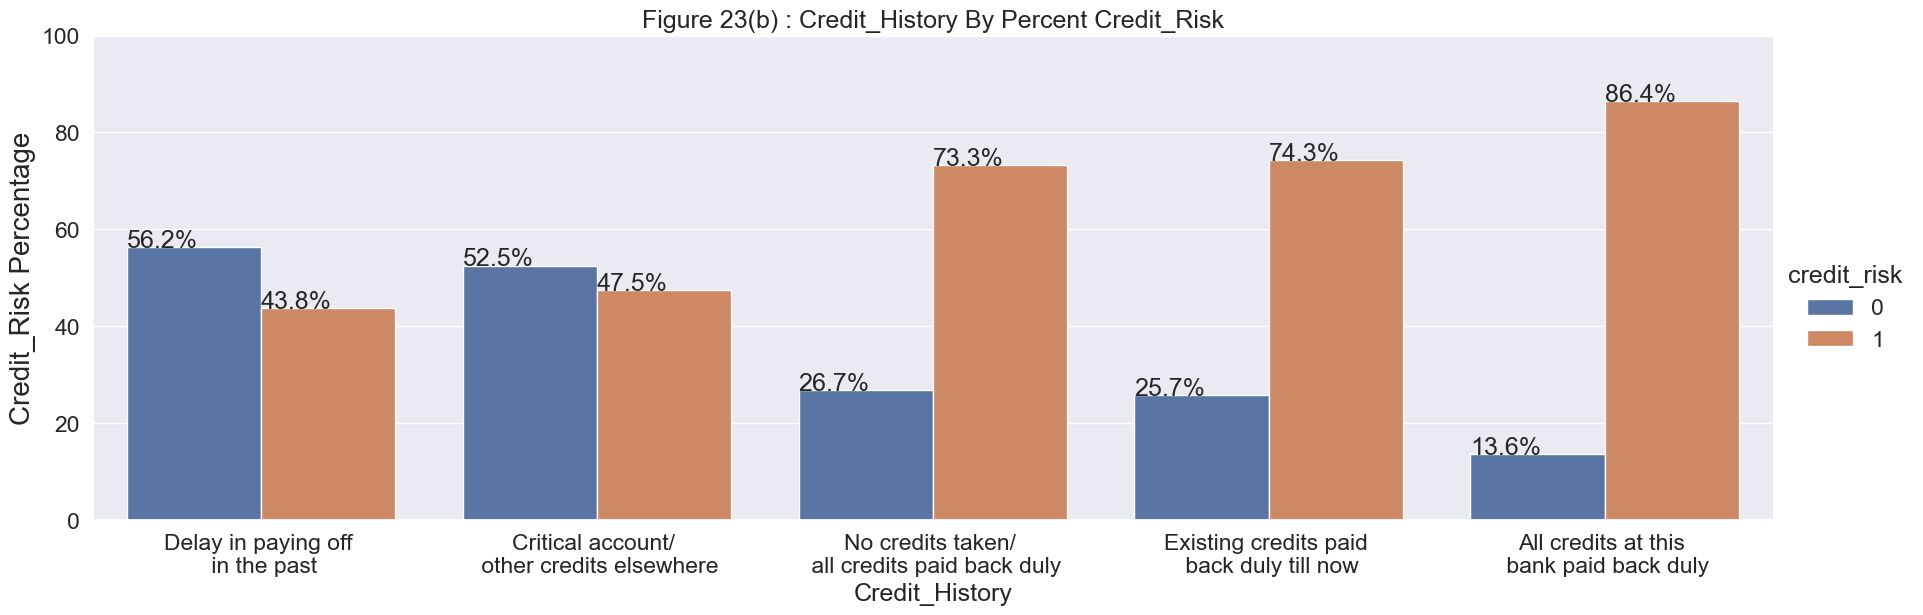

In [99]:
# Plotting distribution of applicants' checking account against credit_risk
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='credit_history', hue='credit_risk', data=df_train)
ax.set_xticklabels(ch_labels)
plt.title('Figure 23(a) : Credit history by Credit Risk')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/23_a.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'credit_history', 'credit_risk', 23, ch_labels)

##### OBSERVATIONS :

Majority of the applicants have no credits taken or all their credits have been paid back duly.
When categorized based on credit_risk value ( percentage plot), applicants who have delayed in repaying in the  past, have the highest bad-risk(0) percentage and least with the customers who have paid all credits at this bank, duly (refer fig 23(b)).
We shall assume that 'credit_history' is a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'credit_history' has no significant effect on 'credit_risk'.

H1 : 'credit_history' has a significant effect on 'credit_risk'.

In [100]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'credit_history')

P-Value : 2.472412161396035e-10
' credit_history ' IS CORRELATED with 'credit_risk'


##### Purpose for which the credit is needed : 'purpose'

In [101]:
# Unique catgorical values
df_train['purpose'].unique()
     

array([ 2,  0,  9,  3,  1, 10,  4,  5,  6,  8], dtype=int64)

In [102]:
df_train['purpose'].value_counts()

purpose
3     227
0     185
2     144
1      86
9      68
6      44
5      21
10     10
8       8
4       7
Name: count, dtype: int64

As per description,

0 : others

1 : car (new)

2 : car (used)

3 : furniture/equipment

4 : radio/television

5 : domestic appliances

6 : repairs

7 : education

8 : vacation

9 : retraining

10 : business

In [103]:
# Labels for the categories
p_labels = ['Others', 'Car(New)', 'Car(Used)', 'Furniture/ \n Equipment', 'Radio/ \n television', 'Domestic \n appliances',
            'Repairs', 'Vacation', 'Retraining', 'Business']
     

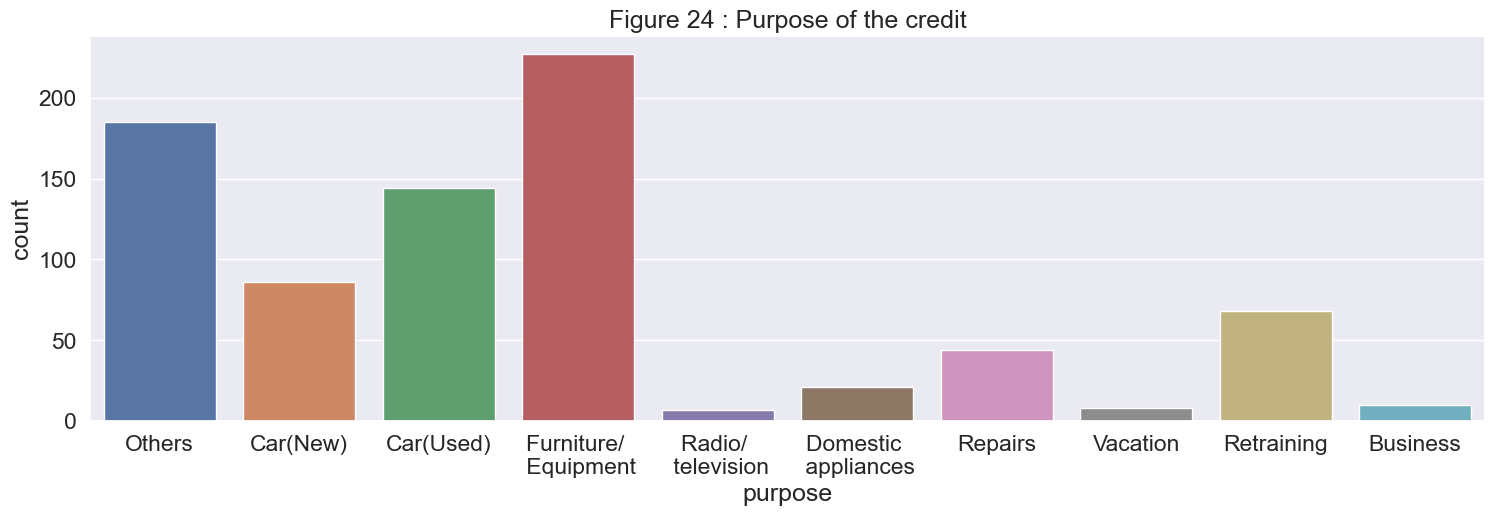

In [104]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='purpose', data=df_train)
ax.set_xticklabels(p_labels)
plt.title('Figure 24 : Purpose of the credit')
#plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/24.jpeg')
plt.show()

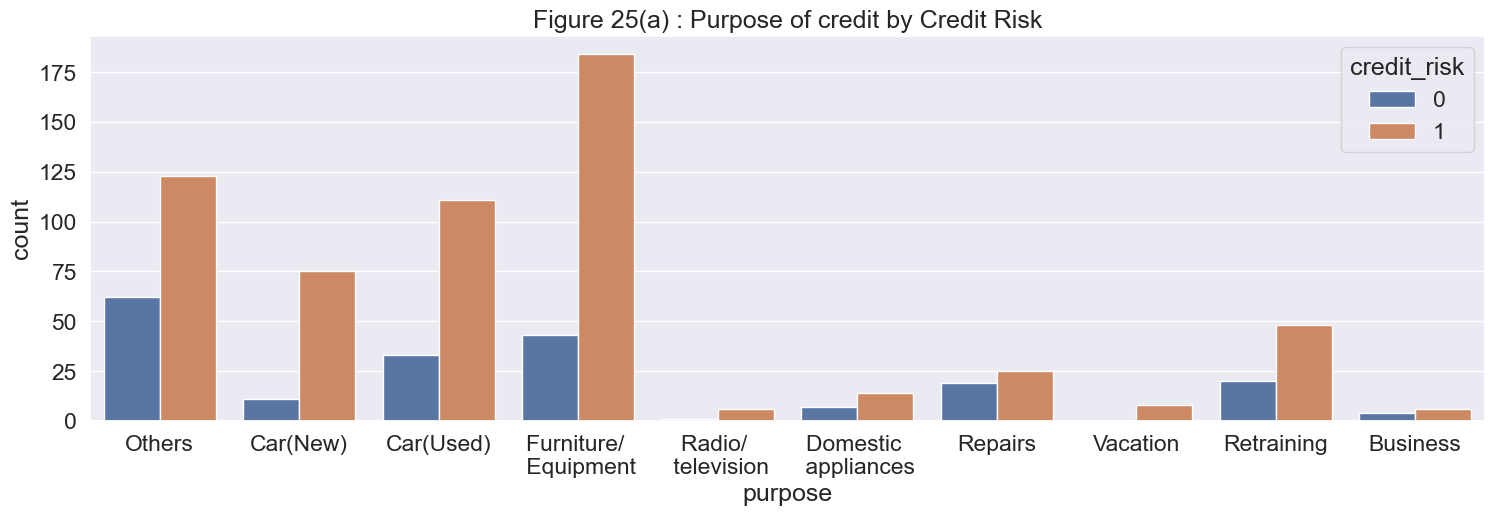

WARNING posx and posy should be finite values
WARNING posx and posy should be finite values
WARNING posx and posy should be finite values


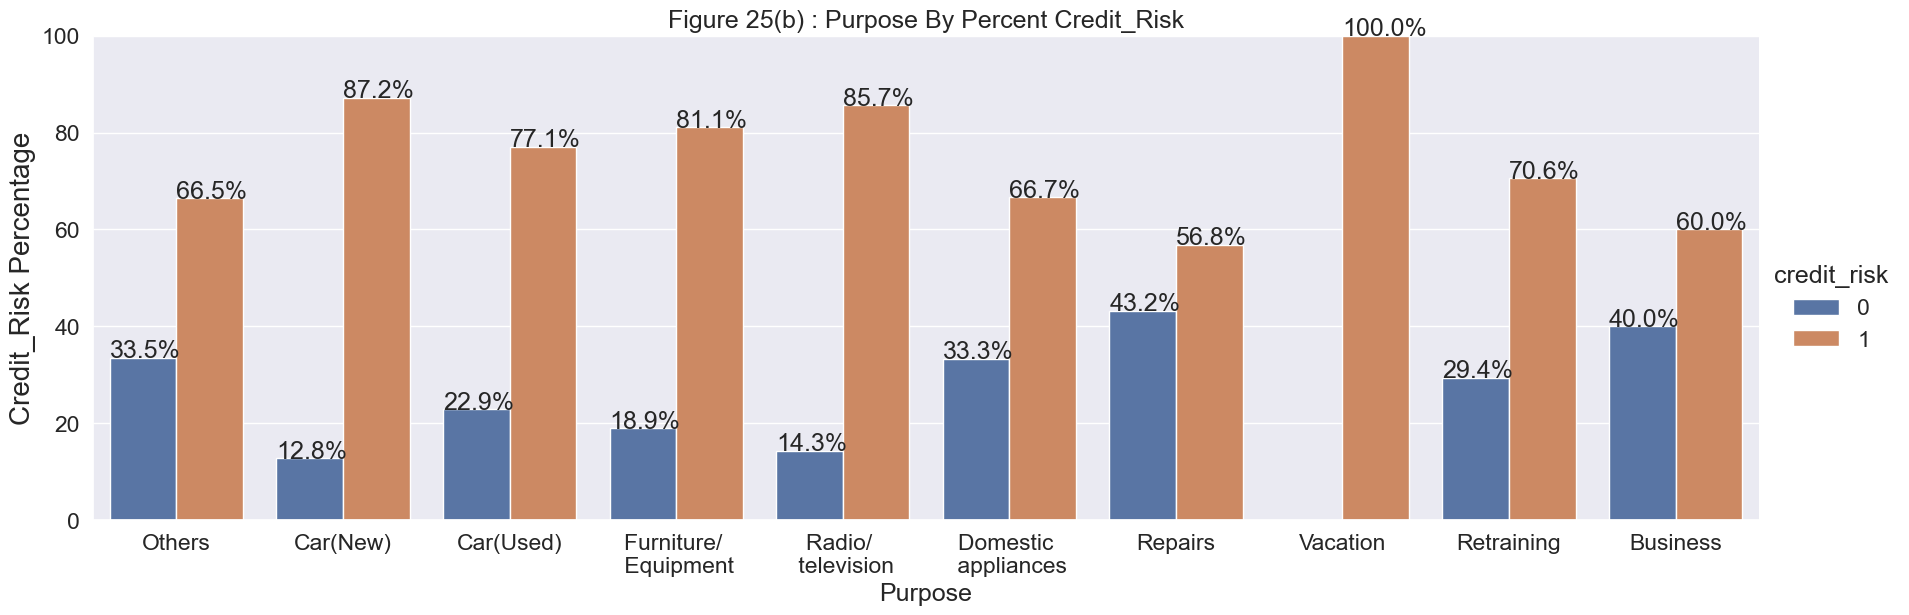

In [105]:
# Plotting distribution of applicants' checking account against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='purpose', hue='credit_risk', data=df_train)
ax.set_xticklabels(p_labels)
plt.title('Figure 25(a) : Purpose of credit by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/25_a.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'purpose', 'credit_risk', 25, p_labels)
     

##### OBSERVATIONS :

Most of the credit applicants have applied for credit loans for the purpose of furnishing, buying used cars, and other general purposes.
When categorized based on credit_risk value ( percentage plot), aplicants who have applied for business, repair puposes, have been marked as highest bad-risk(0) percentage and least with the customers who have mentioned their purpose as Vacation, probably because the amount applied for might be small and can be quickly repaid. (refer fig 23(b)).
Since there is a difference in the risk percentage for each purpose category, we are bound to assume that 'purpose' might be a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'purpose' has no significant effect on 'credit_risk'.

H1 : 'purpose' has a significant effect on 'credit_risk'.

In [106]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'purpose')

P-Value : 0.00017666737390726863
' purpose ' IS CORRELATED with 'credit_risk'


##### CONCLUSION : 
    Our assumption is proved to be true; 'purpose' is infact a good predictor for our model, statistically.

##### Debtor's savings : 'savings'

In [107]:
# Unique catgorical values
df_train['savings'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [108]:
df_train['savings'].value_counts()

savings
1    470
5    149
2     86
3     52
4     43
Name: count, dtype: int64

As per discription,

1 : unknown/no savings account
    
2 : ... < 100 DM
    
3 : 100 <= ... < 500 DM
    
4 : 500 <= ... < 1000 DM
    
5 : ... >= 1000 DM

In [109]:
# Labels for the categories
s_labels = ['Unknown/ \n No savings', 'Less than 100DM', '100DM to 500DM', '500DM to 1000DM', 'Greater than 1000DM']
     


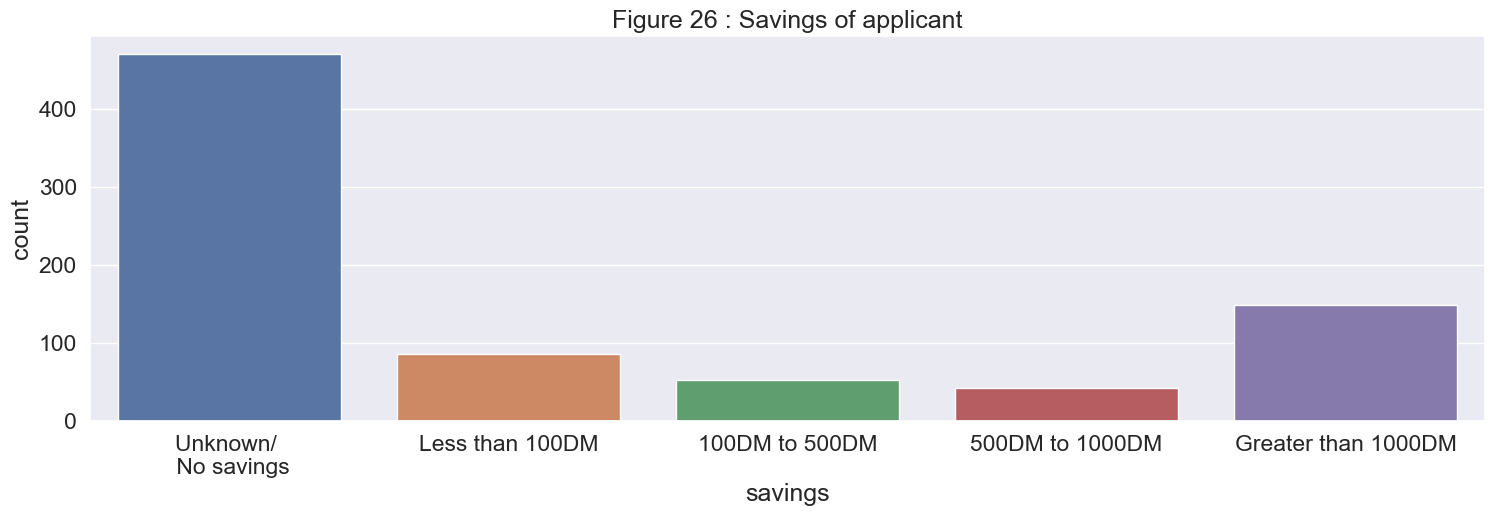

In [110]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='savings', data=df_train)
ax.set_xticklabels(s_labels)
plt.title('Figure 26 : Savings of applicant')
#plt.savefig('graphs/26.jpeg')
plt.show()
     

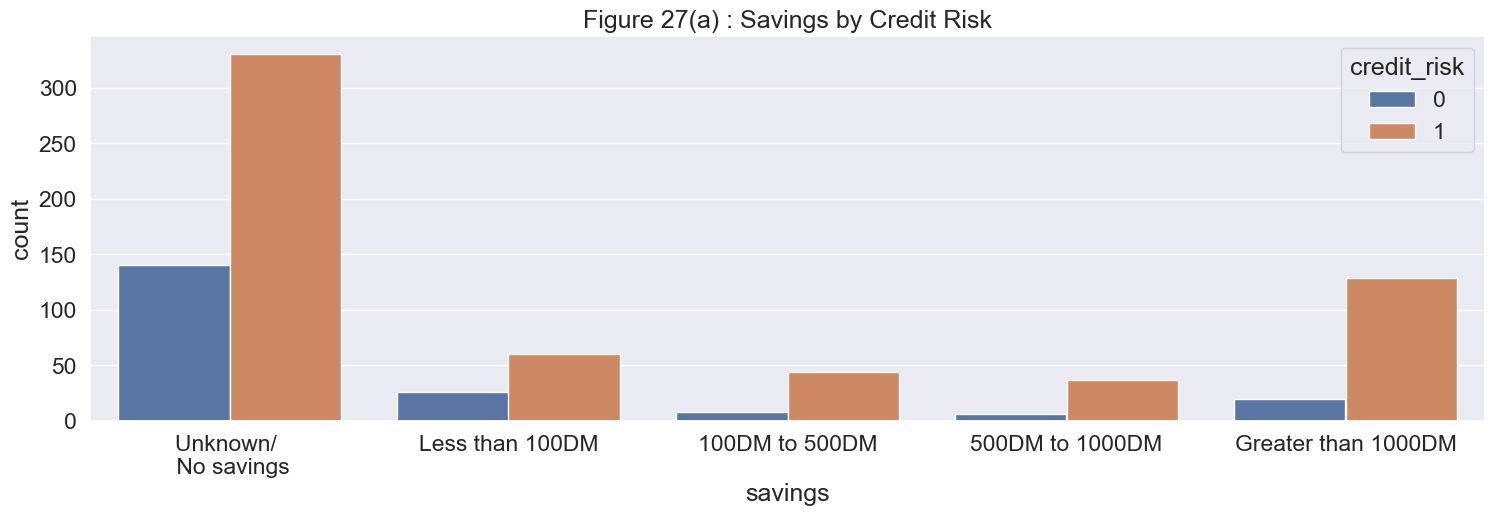

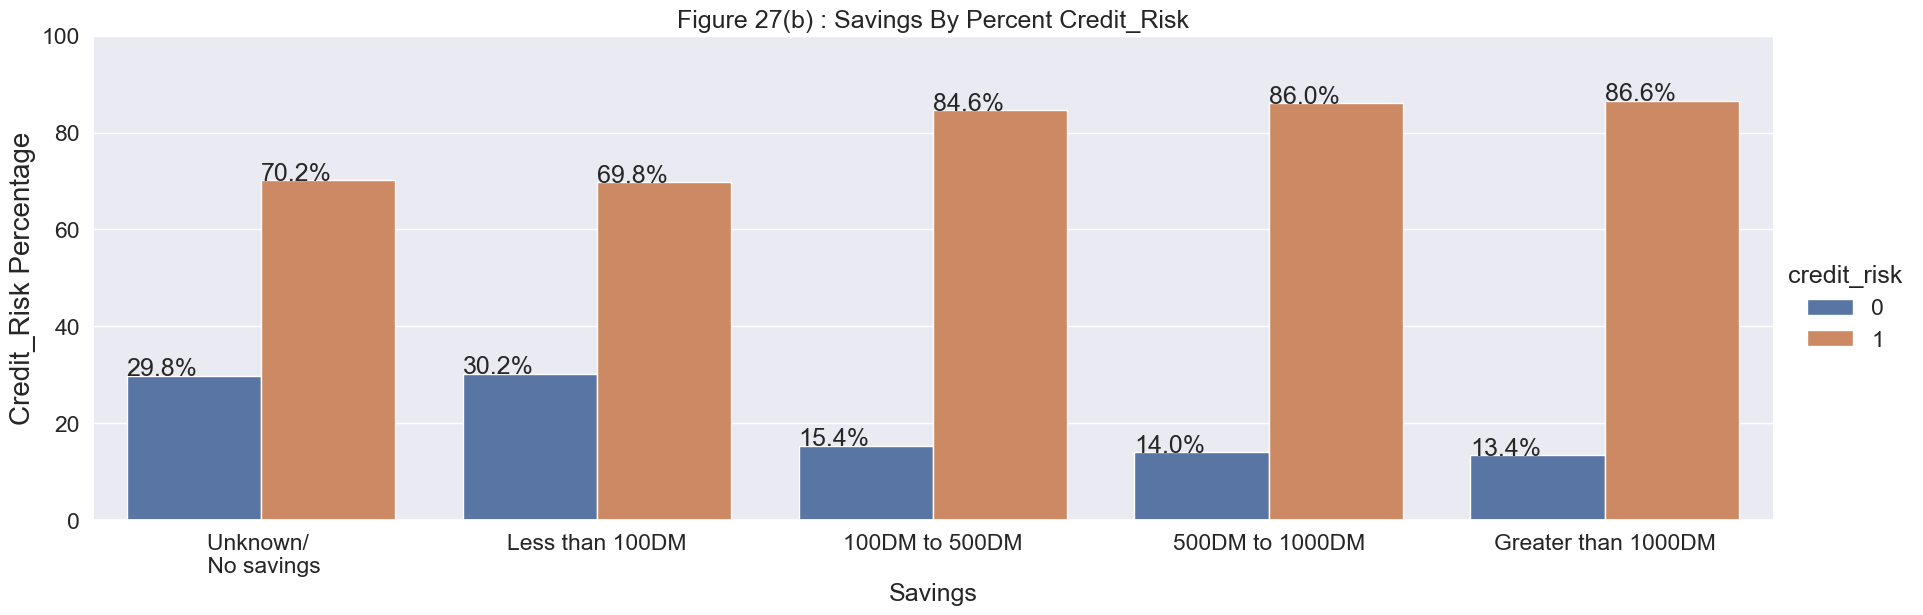

In [111]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='savings', hue='credit_risk', data=df_train)
ax.set_xticklabels(s_labels)
plt.title('Figure 27(a) : Savings by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/27.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'savings', 'credit_risk', 27, s_labels)

#### OBSERVATIONS :

Huge % of the credit applicants have either have no savings in the bank or might have savings unknown to the bank.
Aplicants who have unknown/no savings with the bank, have been marked as highest bad-risk(0) percentage and least with the applicants who have 500-1000 DM. But in general we see the the bad risk percentage decreases with increase in savings(refer fig 23(b)).
And so, we shall assume that 'savings' might be a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'savings' has no significant effect on 'credit_risk'

H1 : 'savings' has a significant effect on 'credit_risk'

In [112]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'savings')

P-Value : 0.00012581019040461142
' savings ' IS CORRELATED with 'credit_risk'


##### CONCLUSION : 

    Our assumption is proved to be true; 'savings' is infact a good predictor for our model, statistically.

##### Information on sex and marital status : 'personal_status_sex'

In [113]:
# Unique catgorical values
df_train['personal_status_sex'].unique()

array([2, 3, 4, 1], dtype=int64)

In [114]:
df_train['personal_status_sex'].value_counts()

personal_status_sex
3    448
2    244
4     70
1     38
Name: count, dtype: int64

As per description,

1 : male : divorced/separated.
        
2 : female : non-single or male : single.
            
3 : male : married/widowed.
        
4 : female : single.

In [115]:
# Labels for the categories
sm_labels = ['Male \n divorced/separated', 'Female Non-single / \n Male Single', 'Male \n Married/Widowed', 'Female \n Single']
     

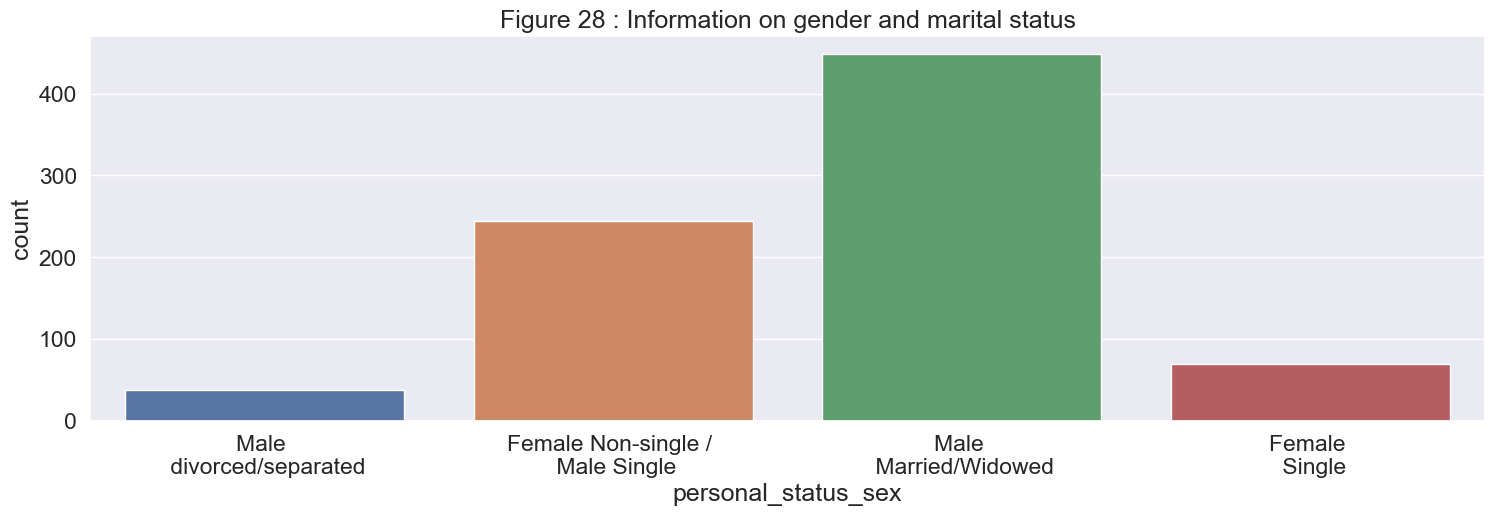

In [116]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='personal_status_sex', data=df_train)
ax.set_xticklabels(sm_labels)
plt.title('Figure 28 : Information on gender and marital status')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/28.jpeg')
plt.show()
     


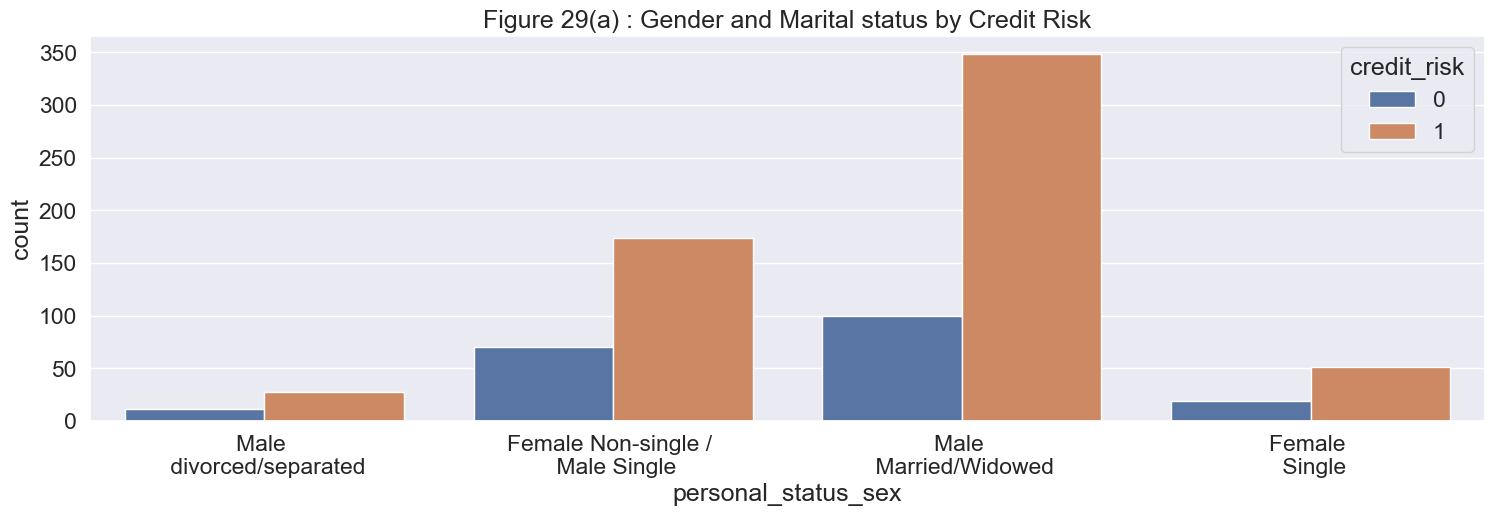

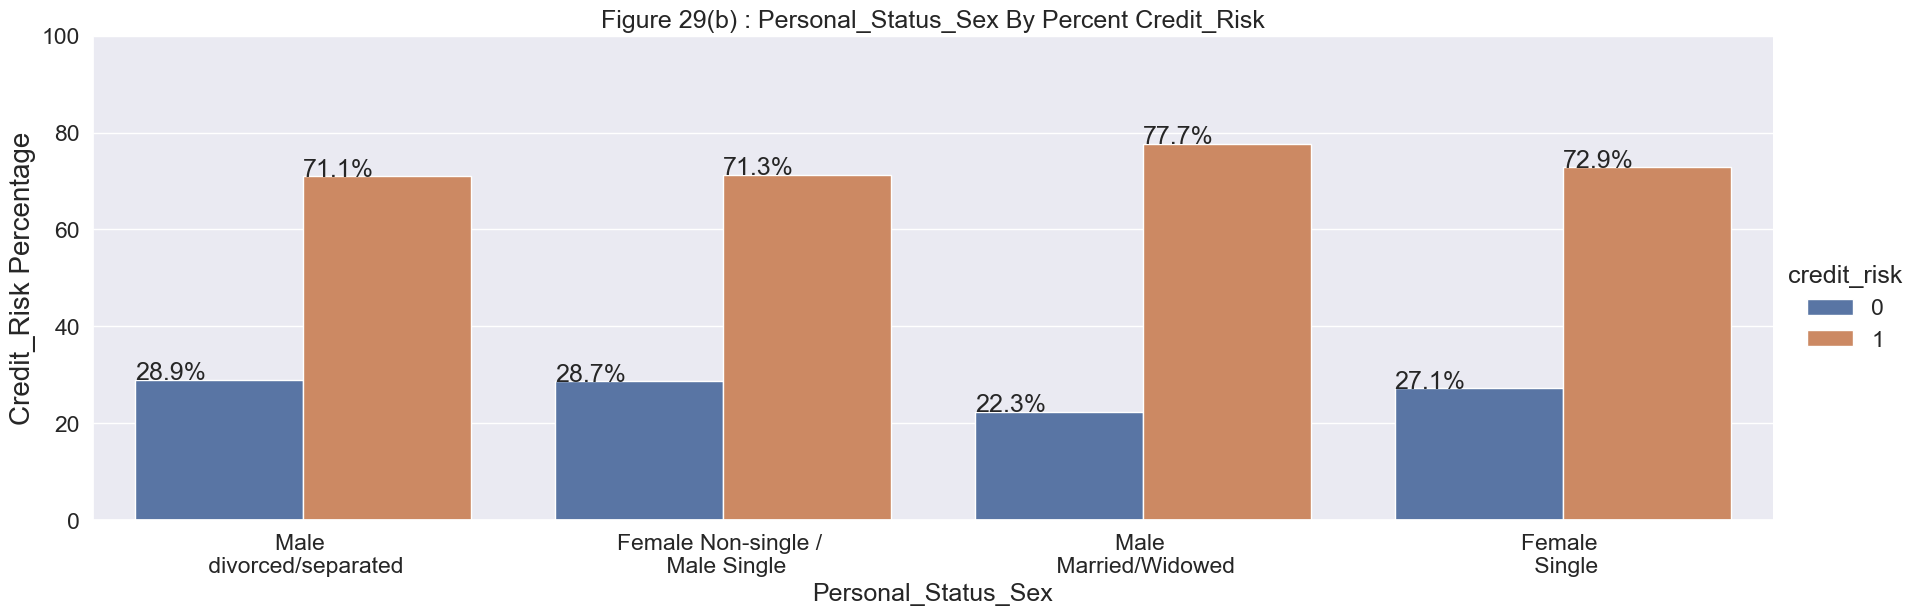

In [117]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='personal_status_sex', hue='credit_risk', data=df_train)
ax.set_xticklabels(sm_labels)
plt.title('Figure 29(a) : Gender and Marital status by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/29_a.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'personal_status_sex', 'credit_risk', 29, sm_labels)

##### OBSERVATIONS :

Majority of the applicants belong to the group Male:married/widowed and least number of Male:separated/divorced.
Aplicants who are Male:divorced/separated have been marked as highest bad-risk(0) percentage(refer fig 23(b)). But overall, there does not seem to be any particular pattern among the gender-marital status categories.
Lets assume that 'peronal_status_sex' is not a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'personal_status_sex' has no significant effect on 'credit_risk'.

H1 : 'personal_status_sex' has a significant effect on 'credit_risk'.

In [118]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'personal_status_sex')
     

P-Value : 0.26450402483629637
'personal_status_sex' IS NOT CORRELATED with credit_risk


#### CONCLUSION : 
    Our assumption is proved to be wrong; 'personal_status_sex' is infact a good predictor for our model, statistically.

##### Possibility of another debtor or a guarantor for the credit : 'other_debtors'

In [119]:
# Unique catgorical values
df_train['other_debtors'].unique()
     

array([1, 3, 2], dtype=int64)

In [120]:
df_train['other_debtors'].value_counts()

other_debtors
1    725
3     40
2     35
Name: count, dtype: int64

As per the description,

1 : none

2 : co-applicant

3 : guarantor

In [121]:
# Labels for the categories
od_labels = ['None', 'Co-applicant', 'Guarantor']
     


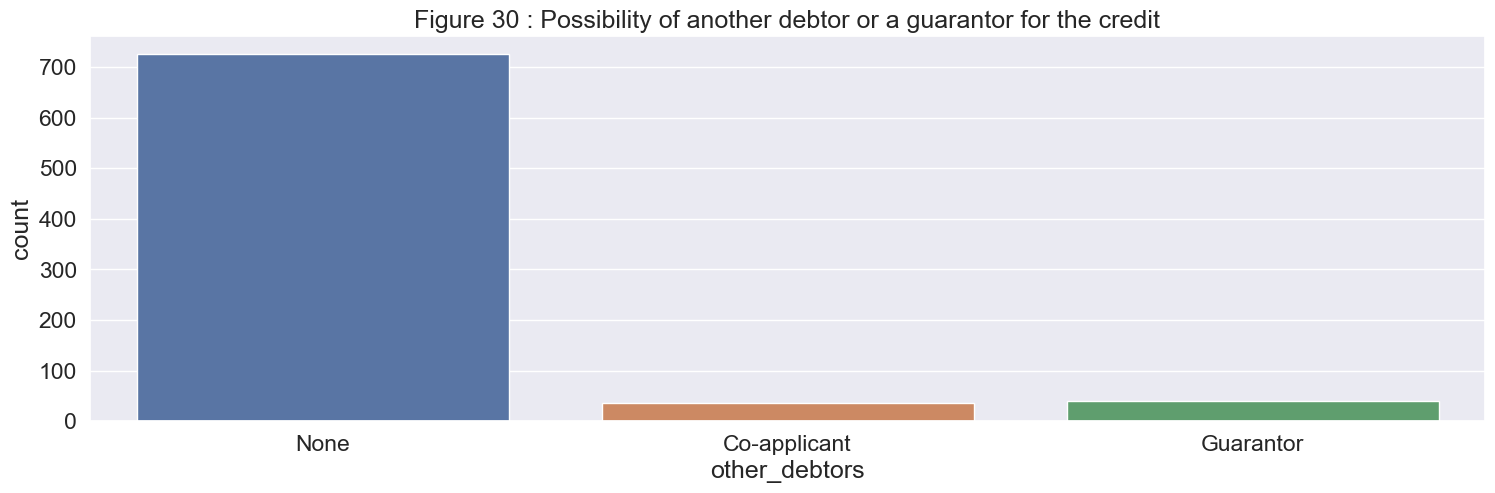

In [122]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='other_debtors', data=df_train)
ax.set_xticklabels(od_labels)
plt.title('Figure 30 : Possibility of another debtor or a guarantor for the credit')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/30.jpeg')
plt.show()

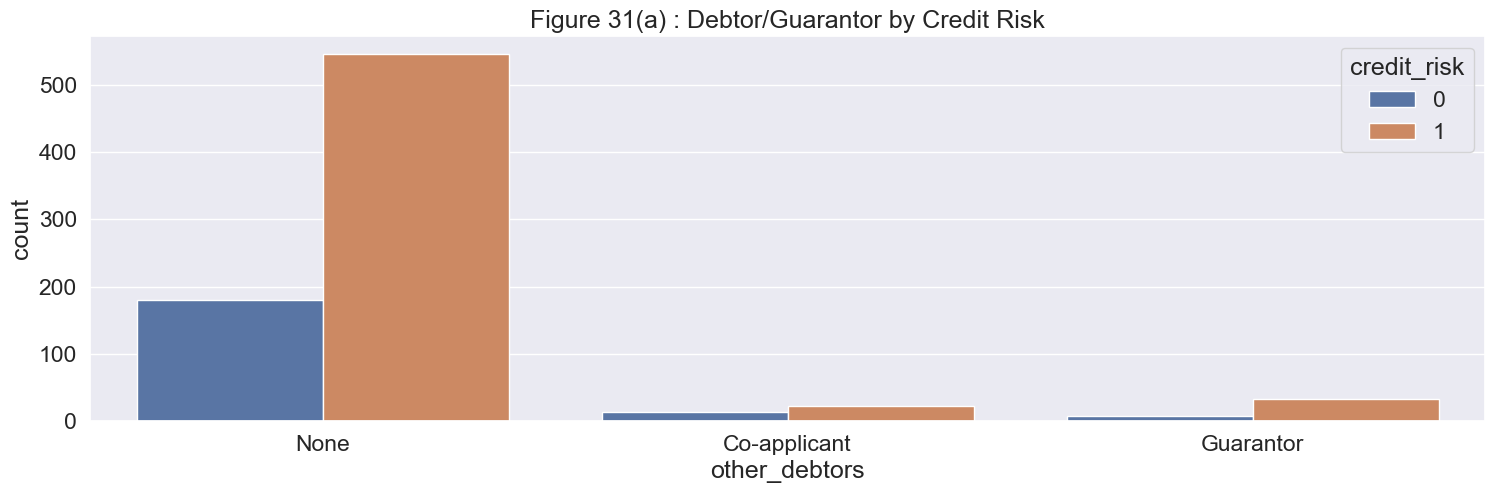

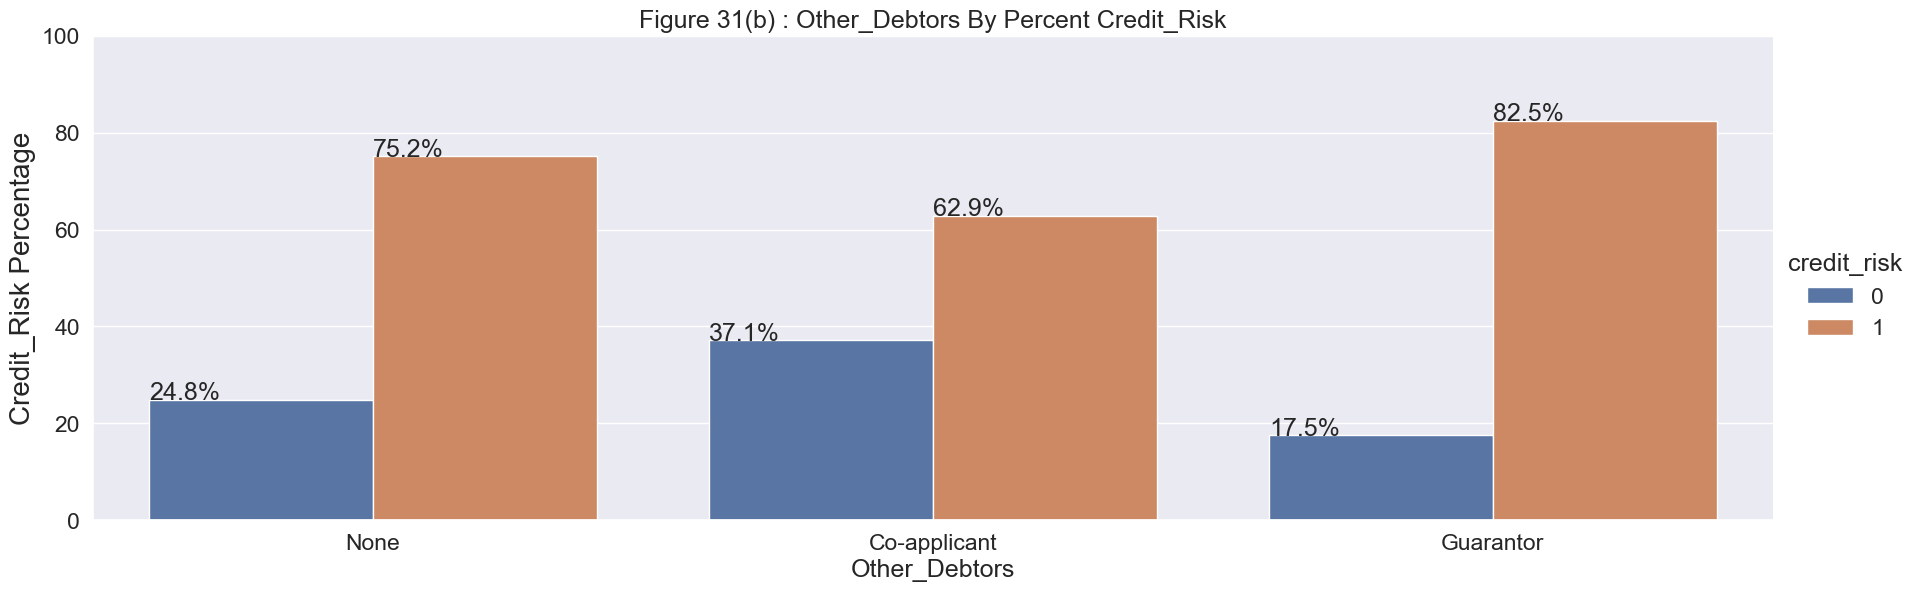

In [123]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='other_debtors', hue='credit_risk', data=df_train)
ax.set_xticklabels(od_labels)
plt.title('Figure 31(a) : Debtor/Guarantor by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/31.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'other_debtors', 'credit_risk', 31, od_labels)

#### OBSERVATIONS :

90 percent of the applicants do not have any kind of co-debtors or guarantors.
Surprisingly, the chances of an applicant with a co-applicant/co-debtor belonging to credit risk category 0(bad risk), is shown to be more, compared to other groups.
Lets see if this variable proves to be a good predictor variable for our model.

Hypothesis Test : Chi-Square Test

H0 : 'other_debtors' has no significant effect on 'credit_risk'.

H1 : 'other_debtors' has a significant effect on 'credit_risk'.

In [124]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'other_debtors')

P-Value : 0.13780197300356375
'other_debtors' IS NOT CORRELATED with credit_risk


#### CONCLUSION : 
    'other_debtors' is a good predictor for our model, statistically.

##### Installment plans from providers other than the credit-giving bank : 'other_installment_plans'

In [125]:
# Unique catgorical values
df_train['other_installment_plans'].unique()

array([3, 1, 2], dtype=int64)

In [126]:
df_train['other_installment_plans'].value_counts()

other_installment_plans
3    652
1    113
2     35
Name: count, dtype: int64

In [127]:
# Labels for the categories
oip_labels = ['Bank', 'Stores', 'None']

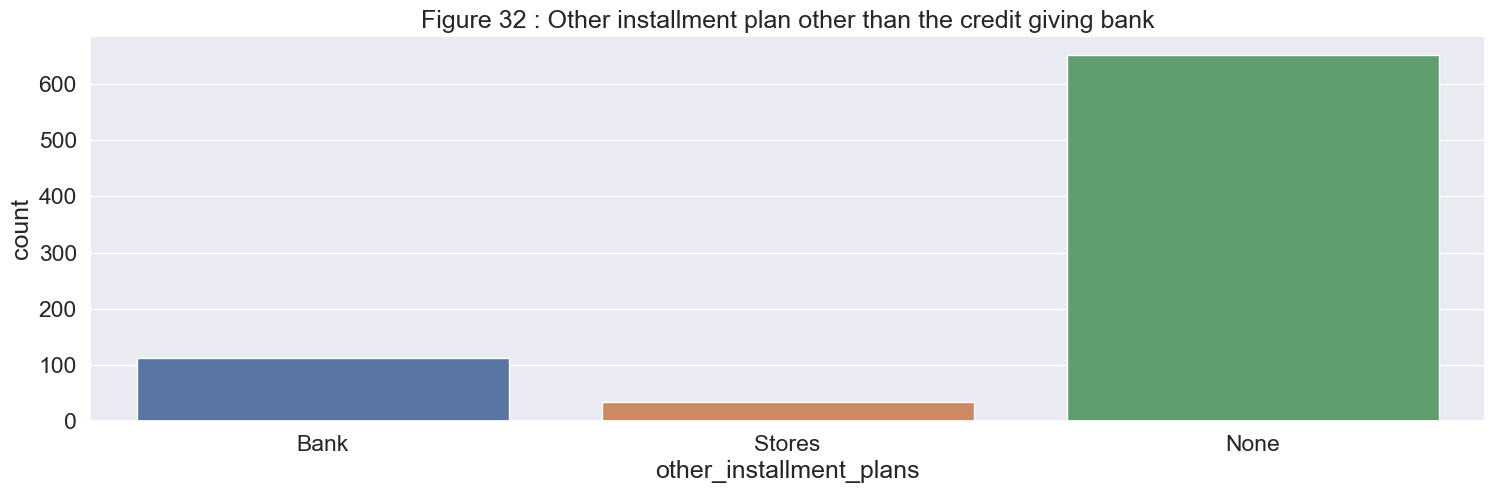

In [128]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='other_installment_plans', data=df_train)
ax.set_xticklabels(oip_labels)
plt.title('Figure 32 : Other installment plan other than the credit giving bank')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/32.jpeg')
plt.show()
     

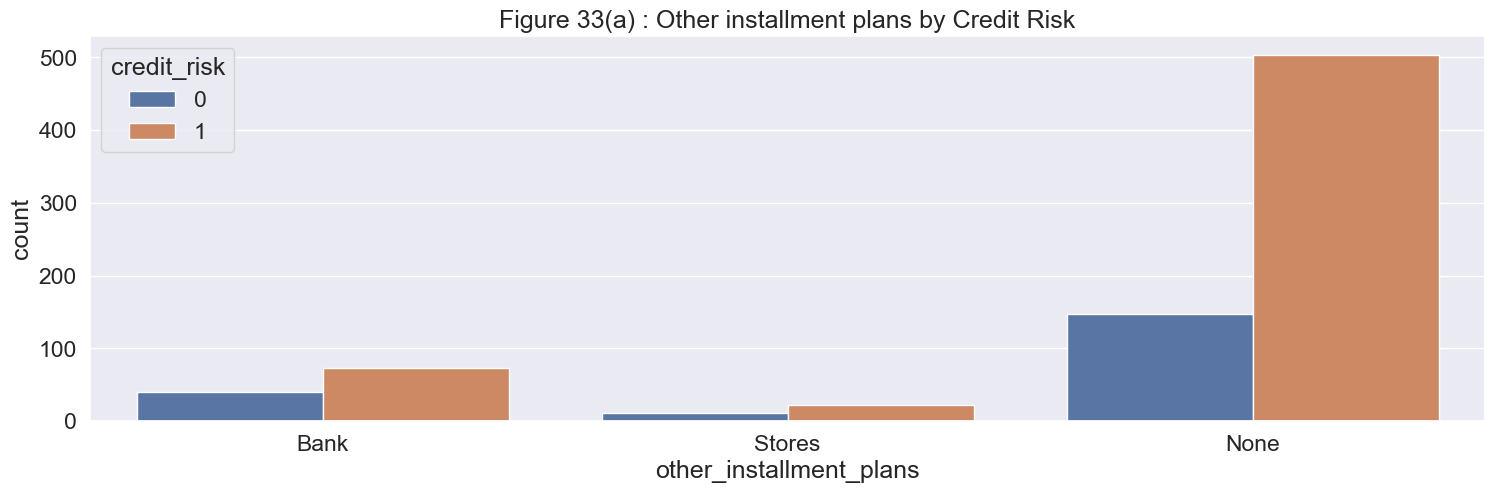

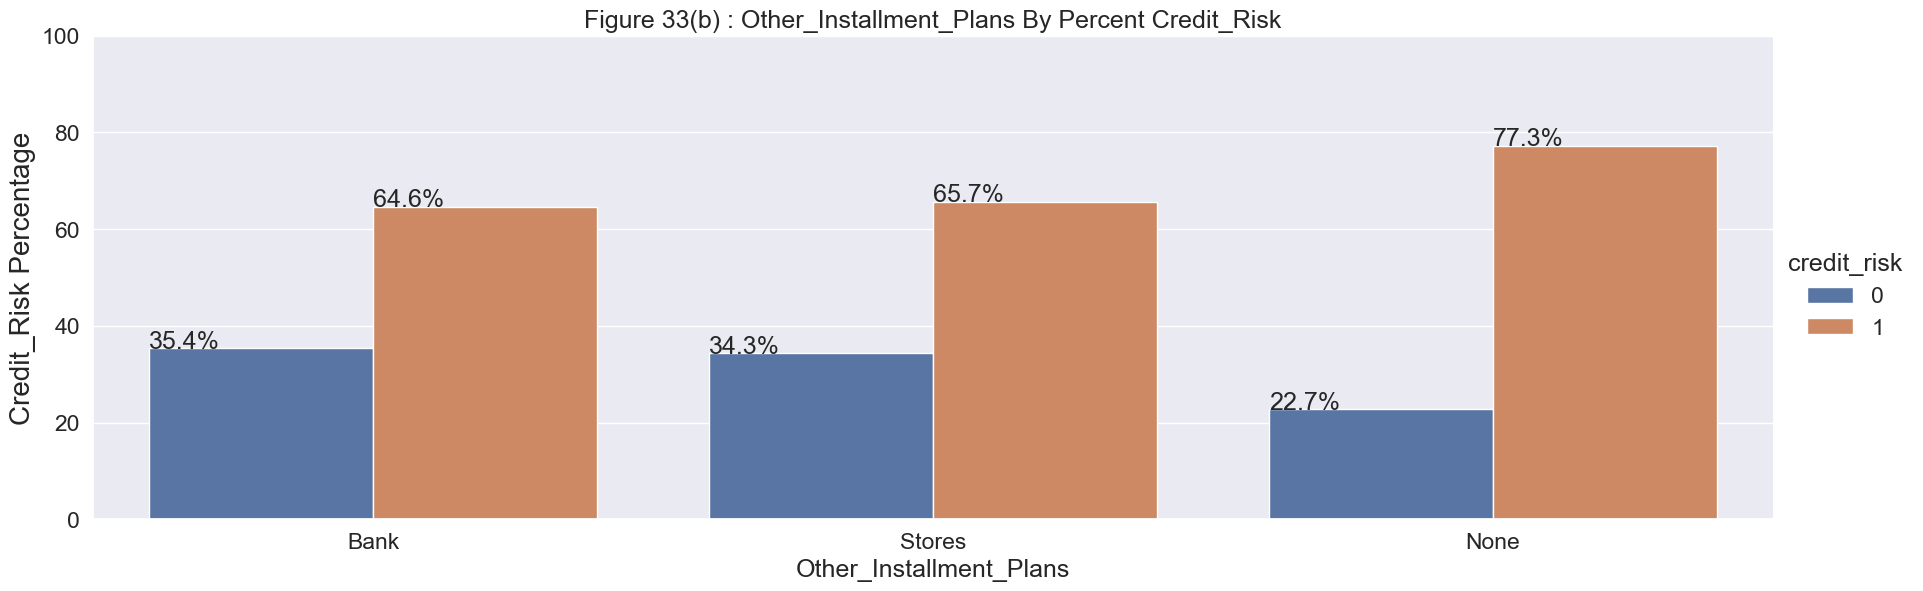

In [129]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='other_installment_plans', hue='credit_risk', data=df_train)
ax.set_xticklabels(oip_labels)
plt.title('Figure 33(a) : Other installment plans by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/33.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'other_installment_plans', 'credit_risk', 33, oip_labels)
     


#### OBSERVATIONS :

80 percent of the applicants do not have any other installment plans elsewhere.
Applicants who do have other installment plans in other places have more chances to be classified into bad risk(0).
Since, there is a visible and understandable relation between other_install_ment_lan with credit_risk, we shall assume that it is a good predictor for our model.

Hypothesis Test : Chi-Square Test

H0 : 'other_installment_plans' has no significant effect on 'credit_risk'

H1 : 'other_installment_plans' has a significant effect on 'credit_risk'

In [130]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'other_installment_plans')

P-Value : 0.0068526530307597925
' other_installment_plans ' IS CORRELATED with 'credit_risk'


##### CONCLUSION : 

    'other_installment_plans' is a good predictor for our model, statistically.

##### Type of housing : 'housing

In [131]:
# Unique catgorical values
df_train['housing'].unique()

array([1, 2, 3], dtype=int64)

In [132]:
df_train['housing'].value_counts()

housing
2    575
1    136
3     89
Name: count, dtype: int64

As per description,

1 : free housing
    
2 : rented
    
3 : own

In [133]:
# Labels for the categories
h_labels = ['Free housing', 'Rented', 'Own']

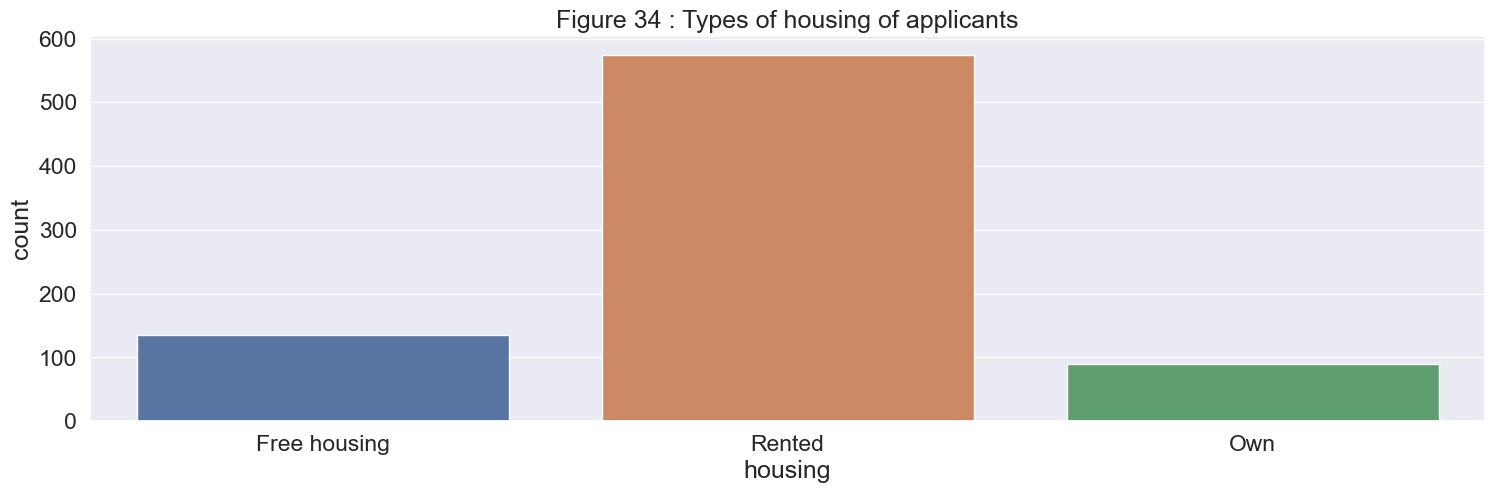

In [134]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='housing', data=df_train)
ax.set_xticklabels(h_labels)
plt.title('Figure 34 : Types of housing of applicants')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/34.jpeg')
plt.show()

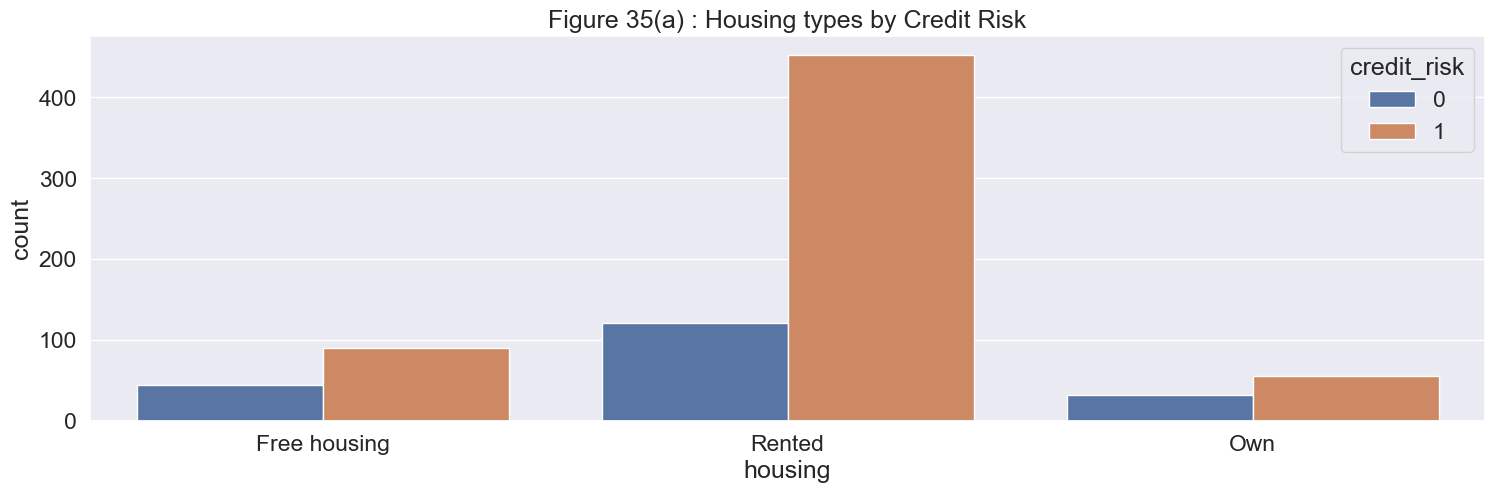

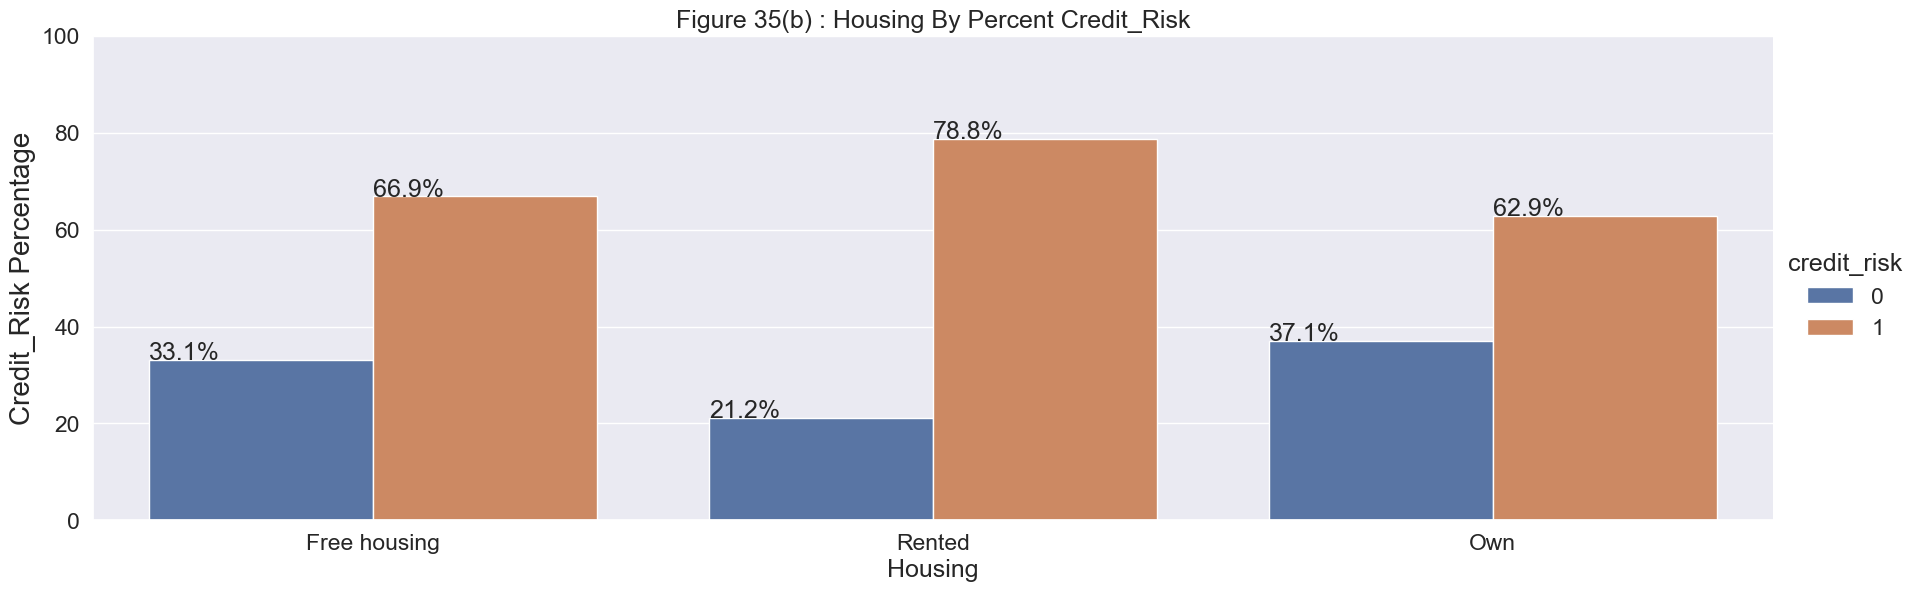

In [135]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='housing', hue='credit_risk', data=df_train)
ax.set_xticklabels(h_labels)
plt.title('Figure 35(a) : Housing types by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/35_a.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'housing', 'credit_risk', 35, h_labels)

#### OBSERVATIONS :

70 percent of the applicants live in rented house/apartments.
Applicants living in rented houses are less classified into bad risk(0) category, as compared to those living in free and own houses.
So, there seems to be some relation between housing with credit_risk; we shall assume that 'housing' is a good predictor for our model.

Hypothesis Test : Chi-Square Test

H0 : 'housing' has no significant effect on 'credit_risk'.

H1 : 'housing' has a significant effect on 'credit_risk'.

In [136]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'housing')

P-Value : 0.00032587102635176304
' housing ' IS CORRELATED with 'credit_risk'


#### CONCLUSION : 
    'housing' is a good predictor for our model, statistically.

#### Availability of registered telephone numbe : 'telephone'

In [137]:
# Unique catgorical values
df_train['telephone'].unique()

array([1, 2], dtype=int64)

In [138]:
df_train['telephone'].value_counts()

telephone
1    481
2    319
Name: count, dtype: int64

In [139]:
# Labels for the categories
t_labels = ['No', 'Yes']

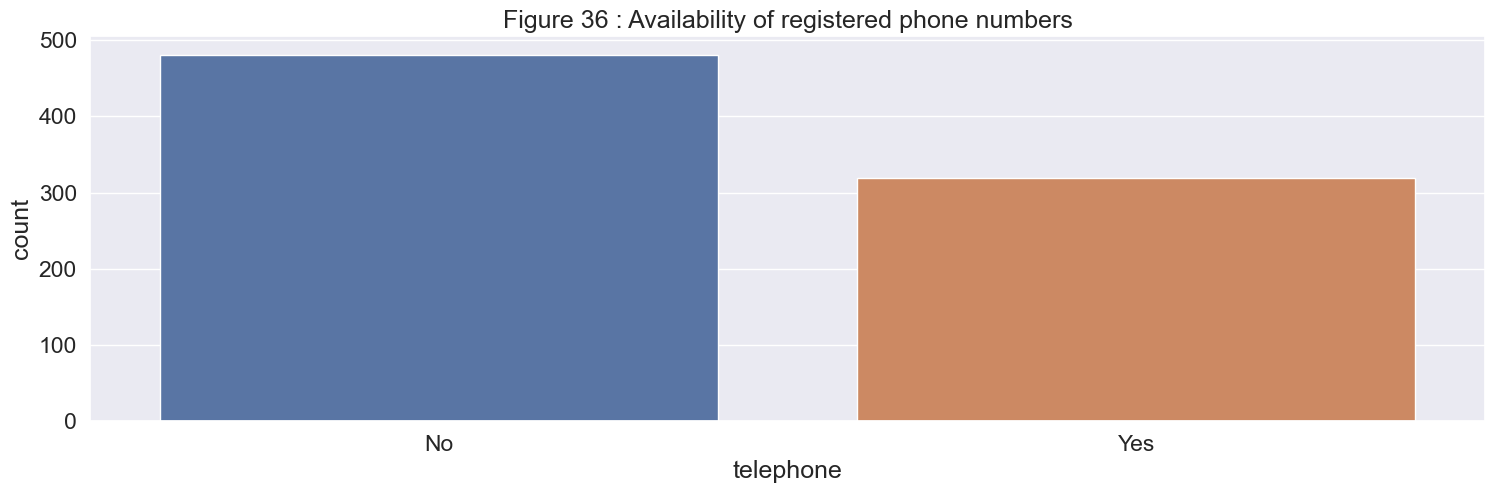

In [140]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='telephone', data=df_train)
ax.set_xticklabels(t_labels)
plt.title('Figure 36 : Availability of registered phone numbers')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/36.jpeg')
plt.show()

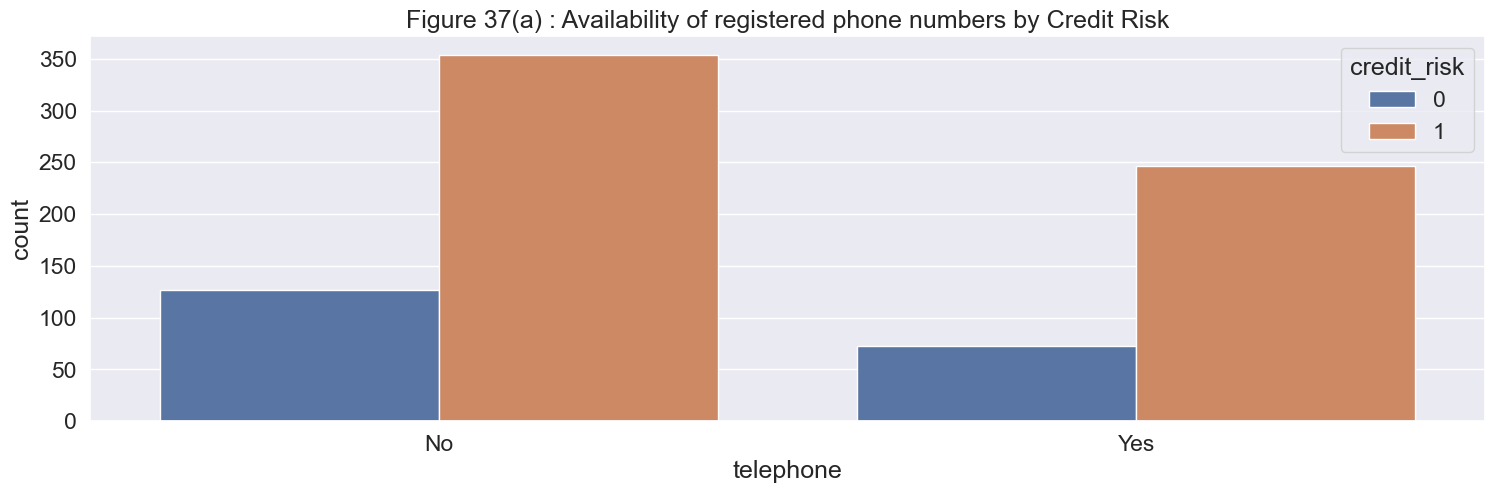

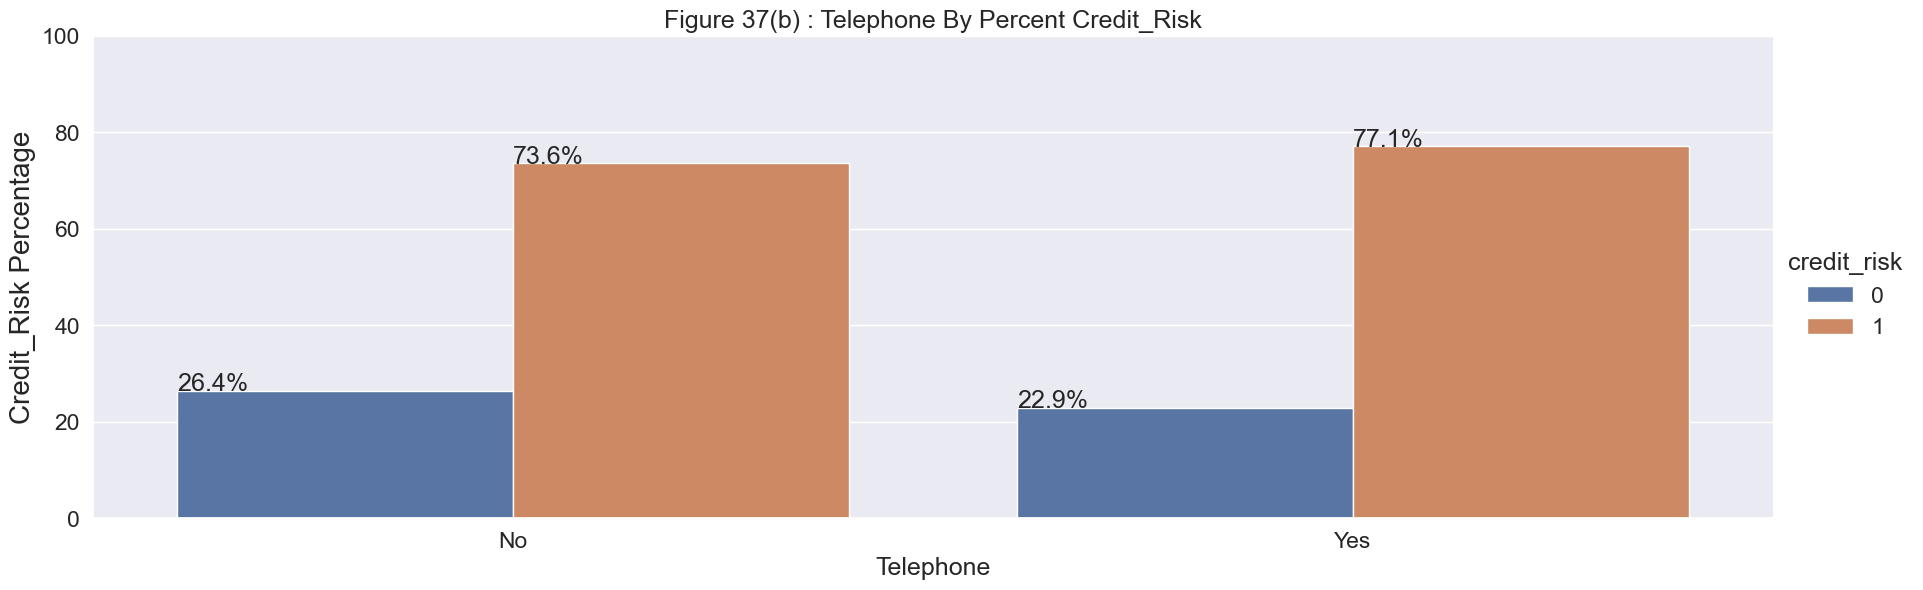

In [141]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='telephone', hue='credit_risk', data=df_train)
ax.set_xticklabels(t_labels)
plt.title('Figure 37(a) : Availability of registered phone numbers by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/37.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'telephone', 'credit_risk', 37, t_labels)

#### OBSERVATIONS :

Around 60 percent of the applicants do not have a telephone number registered under their name.
The percentage of customers classified as bad risk(0), is similar in terms of percentage, ie, around 30% (refer fig 37(b)).
We shall assume that 'telephone' is not a good predictor for our model.

Hypothesis Test : Chi-Square Test

H0 : 'telephone' has no significant effect on 'credit_risk'.

H1 : 'telephone' has a significant effect on 'credit_risk'.

In [142]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'telephone')

P-Value : 0.29731292710570545
'telephone' IS NOT CORRELATED with credit_risk


##### CONCLUSION : 
    'telephone' is therefore not a good predictor for our model, statistically.

##### If the applicant is a foreign worker : 'foreign_worker'

In [143]:
# Unique catgorical values
df_train['foreign_worker'].unique()

array([2, 1], dtype=int64)

In [144]:
df_train['foreign_worker'].value_counts()

foreign_worker
2    766
1     34
Name: count, dtype: int64

As per description,

1 : Yes

2 : No

In [145]:
# Labels for the categories
fw_labels = ['Yes', 'No']

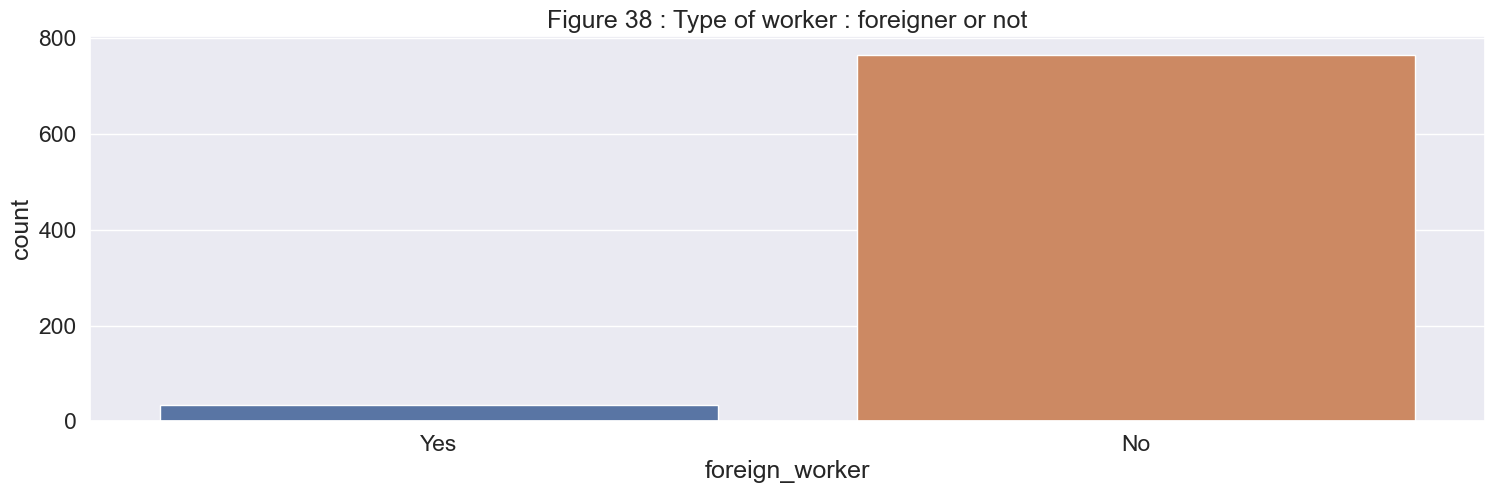

In [146]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='foreign_worker', data=df_train)
ax.set_xticklabels(fw_labels)
plt.title('Figure 38 : Type of worker : foreigner or not')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/38.jpeg')
plt.show()

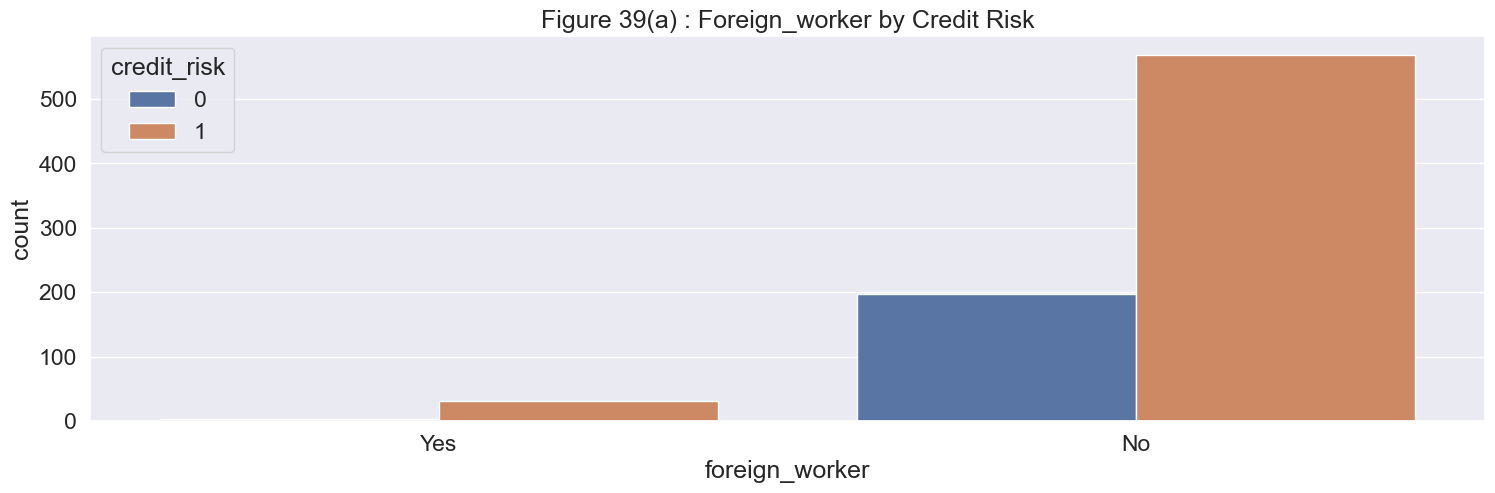

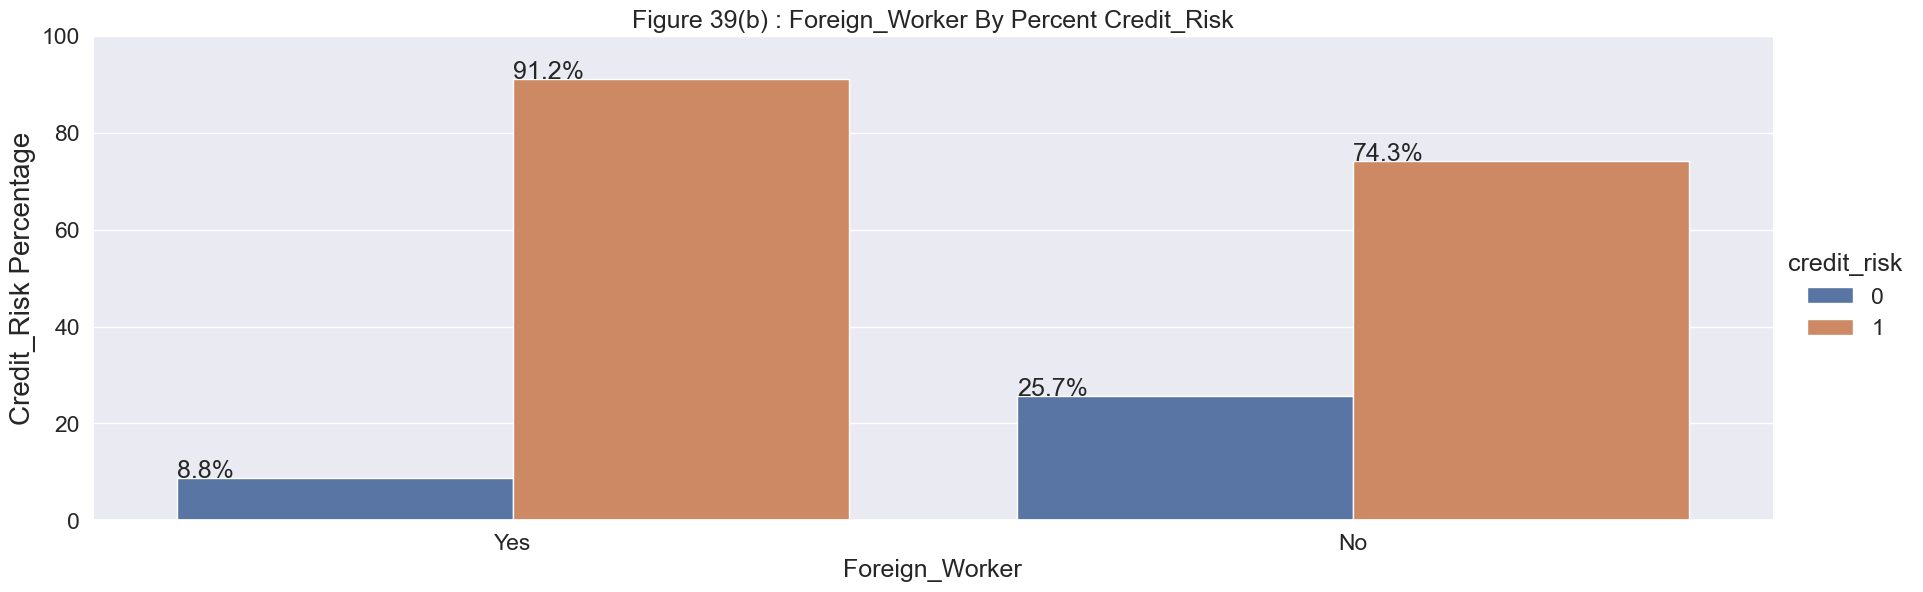

In [147]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='foreign_worker', hue='credit_risk', data=df_train)
ax.set_xticklabels(fw_labels)
plt.title('Figure 39(a) : Foreign_worker by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/39_a.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'foreign_worker', 'credit_risk', 39, fw_labels)

#### OBSERVATIONS :

90 percent of the applicants are not foreign workers.
30% of these non foreign workers are classified as bad risk(0), while only 10% of the foreign workers are classified as bad risk.
So, clearly there seems to be some relation between foreign_worker with credit_risk; we shall assume that 'foreign_worker' is a good predictor for our model.

Hypothesis Test : Chi-Square Test

H0 : 'foreign_worker' has no significant effect on 'credit_risk'.

H1 : 'foreign_worker' has a significant effect on 'credit_risk'.

In [148]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'foreign_worker')

P-Value : 0.04299412704681501
' foreign_worker ' IS CORRELATED with 'credit_risk'


#### CONCLUSION : 
    'foreign_worker' is a good predictor for our model, statistically.

#### Number of people dependent on the applicant : 'people_liable'

In [149]:
# Unique catgorical values
df_train['people_liable'].unique()

array([2, 1], dtype=int64)

In [150]:
df_train['people_liable'].value_counts()

people_liable
2    676
1    124
Name: count, dtype: int64

As per the description,

1 : 3 or more people
    
2 : 0 to 2 people

In [151]:
# Labels for the categories
pl_labels = ['3 or more', '0 to 2']

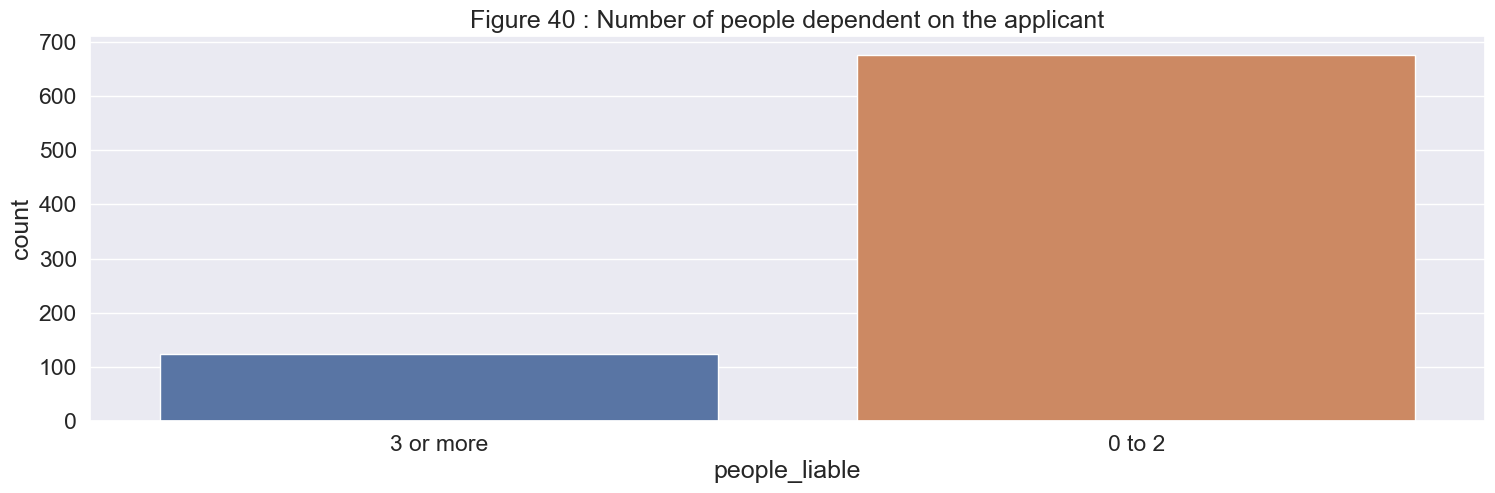

In [152]:
# Plotting the distribution 
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='people_liable', data=df_train)
ax.set_xticklabels(pl_labels)
plt.title('Figure 40 : Number of people dependent on the applicant')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/40.jpeg')
plt.show()
     

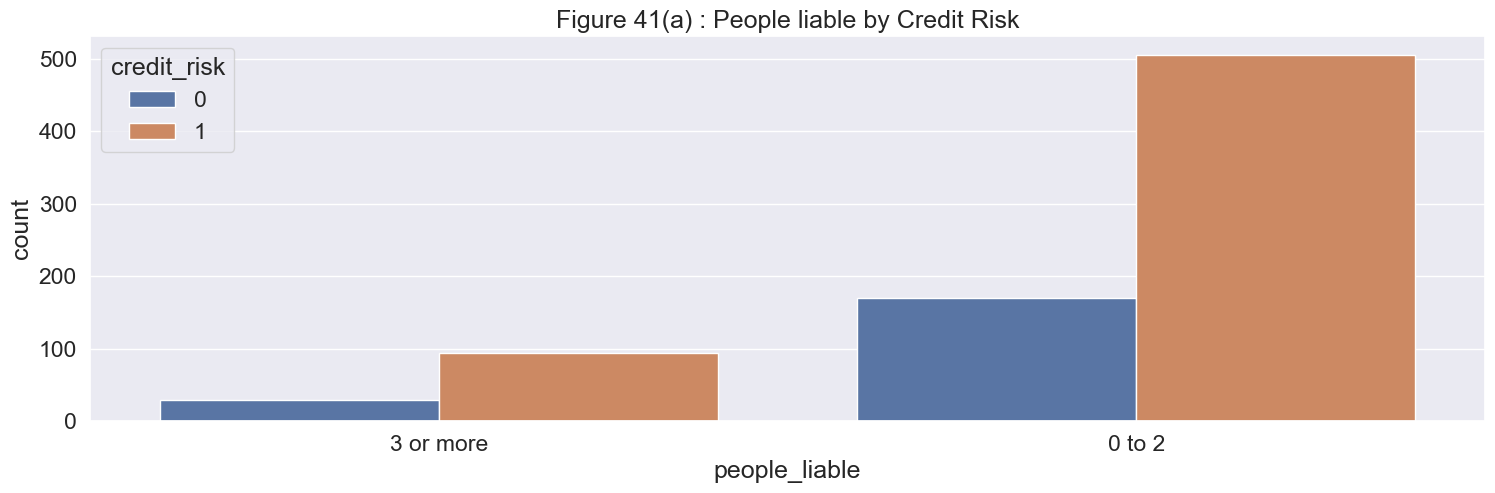

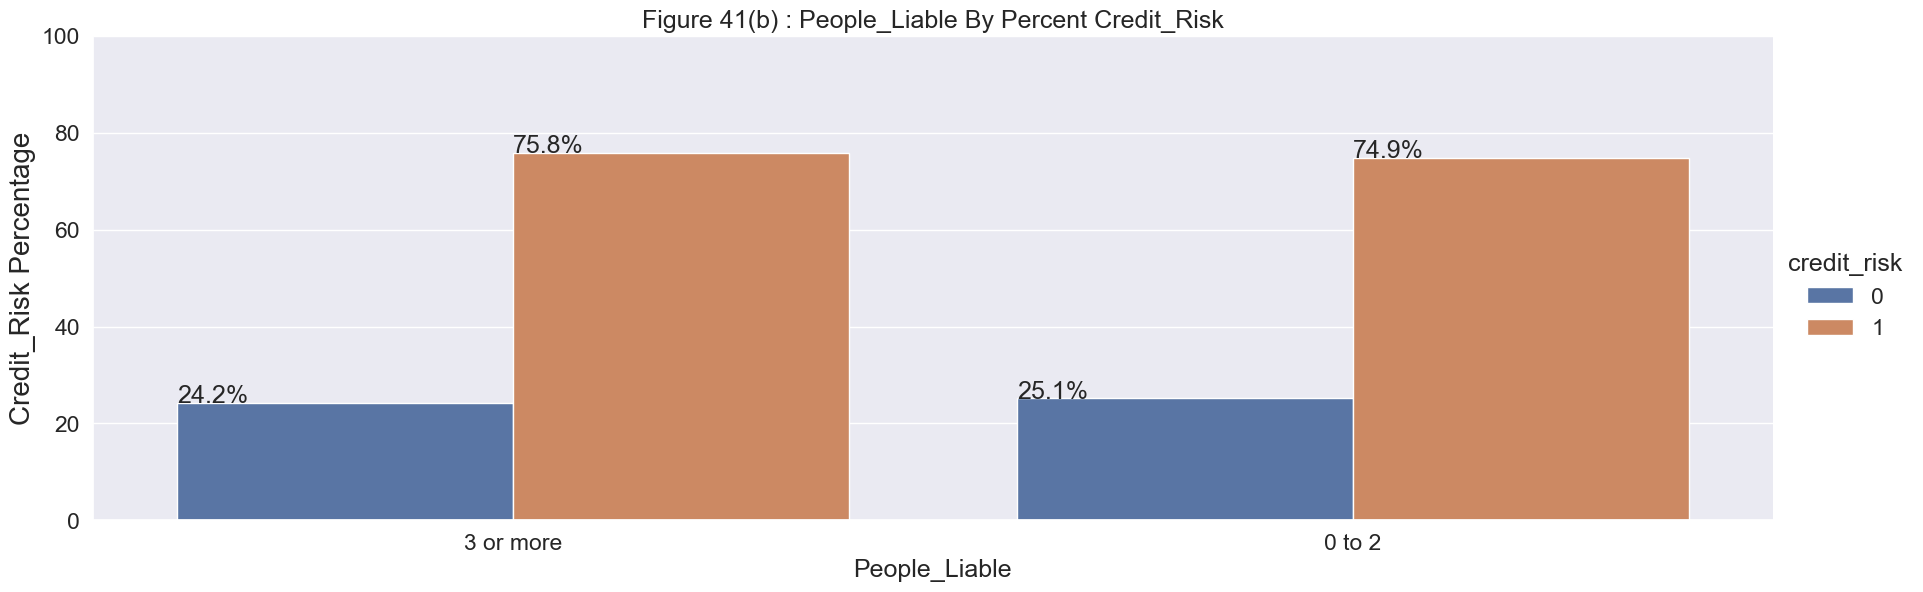

In [153]:
# Plotting distribution of applicants' savings against credit_risk
fig,ax = plt.subplots(figsize=(18,5))
ax=sns.countplot(x='people_liable', hue='credit_risk', data=df_train)
ax.set_xticklabels(pl_labels)
plt.title('Figure 41(a) : People liable by Credit Risk')
plt.savefig('C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/graphs/41_a.jpeg')
plt.show()

# Percentage plot: Status of checking account against credit_risk
plotting_percentages_graph(df_train, 'people_liable', 'credit_risk', 41, pl_labels)

#### OBSERVATIONS :

85 percent of the applicants have 0-2 other people dependent on them.
The percent of aplicants classified as bad risk is almost the same for both the categories og people_liable variable
Since, there doesn't seem to any visible relation between housing with credit_risk, we shall assume that 'people_liable' is not a good predictor for our model.

Hypothesis Test : Chi-Square Test

H0 : 'people_liable' has no significant effect on 'credit_risk'.

H1 : 'people_liable' has a significant effect on 'credit_risk'.

In [154]:
# Statistical test to find the significance of the feature for our model
chisquare_test(df_train, 'people_liable')

P-Value : 0.9101847791422517
'people_liable' IS NOT CORRELATED with credit_risk


#### CONCLUSION : 
    'people_liable' is not a good predictor for our model, and can be dropped from our modeling data.

In [155]:
df_train = df_train.drop(["present_residence", "housing","other_installment_plans", "installment_rate","people_liable", "number_credits", "telephone", "job" ], axis = "columns")
df_test = df_test.drop(["present_residence", "housing","other_installment_plans", "installment_rate","people_liable", "number_credits", "telephone", "job" ], axis = "columns")

In [156]:
# Performing log transform of skewed columns, copy train and test data  

data_train = df_train.copy()
data_test = df_test.copy()

<Axes: xlabel='amount', ylabel='Density'>

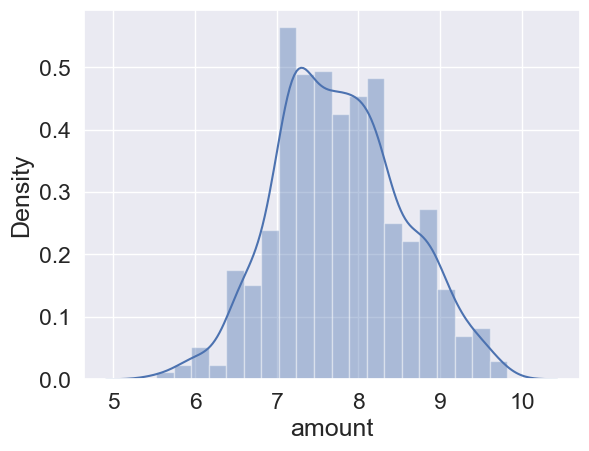

In [157]:
log_amount_train = np.log(data_train['amount'])
sns.distplot(log_amount_train,bins=20)

<Axes: xlabel='amount', ylabel='Density'>

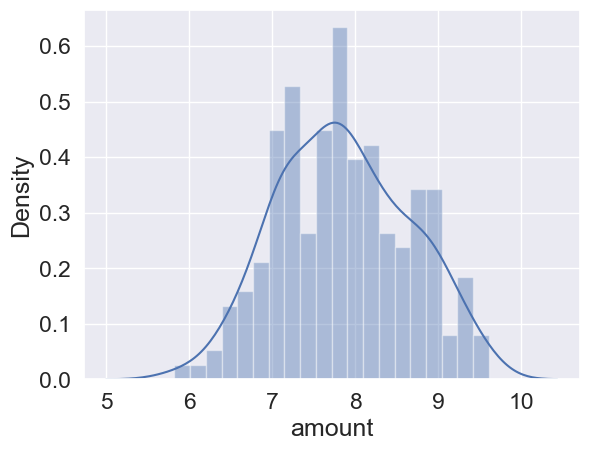

In [158]:
log_amount_test = np.log(data_test['amount'])
sns.distplot(log_amount_test,bins=20)

<Axes: xlabel='age', ylabel='Density'>

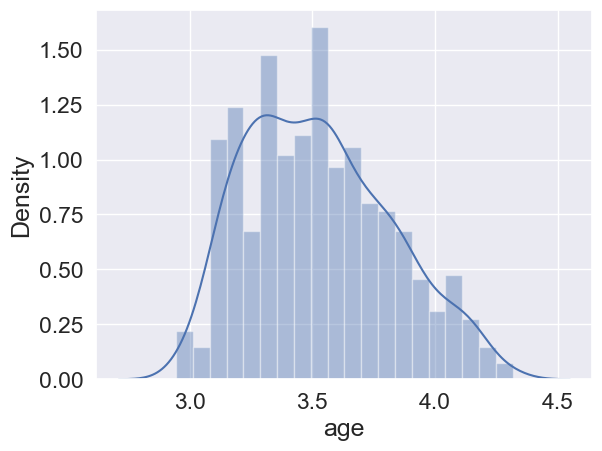

In [159]:
log_age_train = np.log(data_train['age'])
sns.distplot(log_age_train,bins=20)

<Axes: xlabel='age', ylabel='Density'>

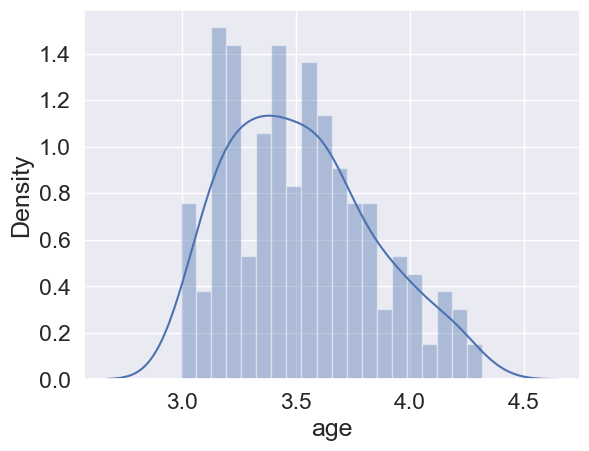

In [160]:
log_age_test = np.log(data_test['age'])
sns.distplot(log_age_test,bins=20)

<Axes: xlabel='duration', ylabel='Density'>

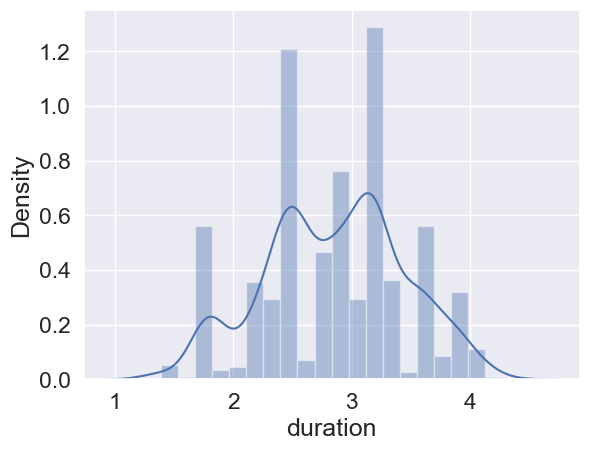

In [161]:
log_duration_train = np.log(data_train['duration'])
sns.distplot(log_duration_train,bins=20)

<Axes: xlabel='duration', ylabel='Density'>

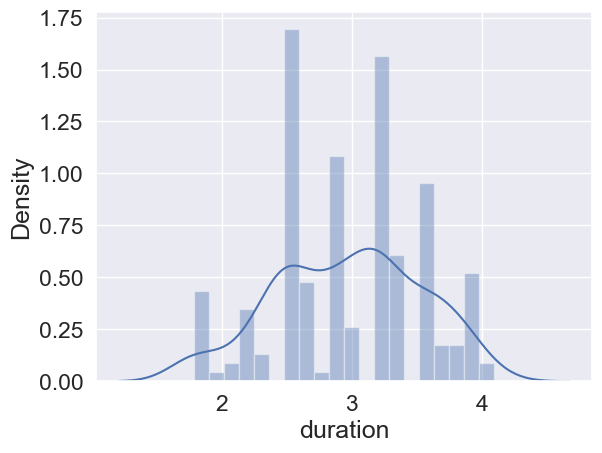

In [162]:
log_duration_test = np.log(data_test['duration'])
sns.distplot(log_duration_test,bins=20)

In [163]:
data_train['log_amount'] = round(np.log(data_train['amount']),2)
data_test['log_amount'] = round(np.log(data_test['amount']),2)

In [164]:
data_train.drop('amount',axis=1,inplace=True)
data_test.drop('amount',axis=1,inplace=True)

In [165]:
data_train['log_age'] = round(np.log(data_train['age']),2)
data_test['log_age'] = round(np.log(data_test['age']),2)

In [166]:
data_train.drop('age',axis=1,inplace=True)
data_test.drop('age',axis=1,inplace=True)

In [167]:
data_train['log_duration'] = round(np.log(data_train['duration']),2)
data_test['log_duration'] = round(np.log(data_test['duration']),2)

In [168]:
data_train.drop('duration',axis=1,inplace=True)
data_test.drop('duration',axis=1,inplace=True)

In [169]:
data_train.head()

status  purpose  credit_history  foreign_worker  employment_duration  \
239       1        2               4               2                    2   
206       1        0               4               2                    3   
253       2        9               2               2                    4   
790       1        0               4               1                    3   
70        1        0               4               1                    2   

     other_debtors  personal_status_sex  credit_risk  savings  property  \
239              1                    2            1        1         2   
206              1                    3            1        1         1   
253              1                    2            1        2         1   
790              1                    3            1        1         1   
70               1                    3            1        1         1   

     log_amount  log_age  log_duration  
239        6.96     3.04          2.89  
206        7.94     3.58          2.20  
253        6.73     3.14          2.48  
790        7.66     3.66          2.48  
70         7.71     3.87          2.30

In [170]:
data_test.head()

status  purpose  credit_history  foreign_worker  employment_duration  \
61        1        0               4               1                    3   
146       1        3               2               2                    4   
62        2        3               4               2                    5   
104       1        0               4               2                    3   
78        2        5               2               2                    2   

     other_debtors  personal_status_sex  savings  property  log_amount  \
61               1                    3        1         2        7.68   
146              1                    4        5         3        7.57   
62               1                    3        1         1        7.76   
104              1                    3        1         1        8.21   
78               1                    3        1         4        7.78   

     log_age  log_duration  
61      3.64          2.48  
146     3.14          2.89  
62      3.58          3.58  
104     3.61          1.79  
78      3.50          3.58

In [172]:
# Save the dataset as csv file
data_train.to_csv('data/processed/Credit_Processed_Train.csv', index=None)

In [173]:
data_test.to_csv('data/processed/German_credit_Processed_Test.csv', index=None)

##### Saving Processed Data [Train/Test] To Cassandra Database 

In [ ]:

logger.info('Inserting processed data into our existing database..')

INFO Inserting processed data into our existing database..
WARNING Heartbeat failed for connection (1544763018832) to 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:a6205d0c-bd62-4d81-bf7a-56c662795e13
WARNING Heartbeat failed for connection (1544763021072) to 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:178f7c36-fa99-46dc-8924-8dcd6741c20e
WARNING Heartbeat failed for connection (1544763025552) to 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:8ea91611-c9ec-4a7b-8574-ce4856e9239d
WARNING Heartbeat failed for connection (1544761324688) to 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:8ea91611-c9ec-4a7b-8574-ce4856e9239d
WARNING Host 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:a6205d0c-bd62-4d81-bf7a-56c662795e13 has been marked down
WARNING Host 9aa4bb47-11ae-4cc1-ae63-3745ef286bed-asia-south1.db.astra.datastax.com:29042:178f7c36-fa

In [180]:
# Delete table if exists
table_name = 'train_processed'
session.execute("USE {keyspace};".format(keyspace=keyspace))
session.execute("DROP TABLE IF EXISTS {table_name};".format(table_name=table_name))
     

In [181]:
# Create a table
table_name = 'train_processed'
session.execute("USE {keyspace};".format(keyspace=keyspace))

session.execute(
  "CREATE TABLE {table_name}(status int PRIMARY KEY, purpose int, credit_history int, foreign_worker int, employment_duration int,"
  "other_debtors int, personal_status_sex int, credit_risk int, savings int, property int, log_amount float,"
  "log_age float, log_duration float);".format(table_name=table_name))


In [182]:
# Insert data into table
file = "C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/data/processed/German_credit_Processed.csv"
with open(file, mode='r') as f:
  next(f)

  reader = csv.reader(f)
  for i in reader:

      data = ','.join([value for value in i])
      session.execute("USE {keyspace};".format(keyspace=keyspace))

      session.execute(
         "INSERT INTO {table_name} (status, purpose, credit_history, foreign_worker, employment_duration,"
  "other_debtors, personal_status_sex, credit_risk, savings, property, log_amount,"
  "log_age, log_duration) VALUES ({data});".format(table_name=table_name, data=data))


In [183]:
# Delete table if exists
table_name = 'test_processed'
session.execute("USE {keyspace};".format(keyspace=keyspace))
session.execute("DROP TABLE IF EXISTS {table_name};".format(table_name=table_name))
     

In [186]:
# Create a table
table_name = 'test_processed'
session.execute("USE {keyspace};".format(keyspace=keyspace))

session.execute(
  "CREATE TABLE {table_name}(status int PRIMARY KEY, purpose int, credit_history int, foreign_worker int, employment_duration int,"
  "other_debtors int, personal_status_sex int, savings int, property int, log_amount float,"
  "log_age float, log_duration float);".format(table_name=table_name))

In [188]:
# Insert data into table
file = "C:/Users/admin/Desktop/Bank_Credit_Risk_MLops/data/processed/German_credit_Processed_test.csv"
with open(file, mode='r') as f:
  next(f)

  reader = csv.reader(f)
  for i in reader:

      data = ','.join([value for value in i])
      session.execute("USE {keyspace};".format(keyspace=keyspace))

      session.execute(
         "INSERT INTO {table_name} (status, purpose, credit_history, foreign_worker, employment_duration,"
  "other_debtors, personal_status_sex, savings, property, log_amount,"
  "log_age, log_duration) VALUES ({data});".format(table_name=table_name, data=data))